In [1]:
import os
import sys
import csv
import random
import math
import operator
import numpy as np

os.chdir('/Users/karolinagrzeszkiewicz/robustness-tests2/locomotion')
import locomotion
#import locomotion.extendedDTW as extendedDTW
import locomotion.write as write
import locomotion.animal as animal
#from locomotion.animal import get_frame_rate
#from locomotion.animal import add_raw_vals
#from locomotion.animal import add_stats
#from locomotion.animal import throwError
from scipy.signal import savgol_filter
from collections import defaultdict
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import import_ipynb

Importing the dtw module. When using in academic works please cite:
  T. Giorgino. Computing and Visualizing Dynamic Time Warping Alignments in R: The dtw Package.
  J. Stat. Soft., doi:10.18637/jss.v031.i07.



In [2]:
FR_high_sequence = []
for i in range(24, 120, 2):
    FR_high_sequence.append(i)
    
FR_low_sequence = []
for i in range(6, 24, 1):
    FR_low_sequence.append(i)

In [3]:
#os.chdir('/Users/karolinagrzeszkiewicz/robustness-tests2/locomotion/tests/robustness_tests')
#import curve_plotting_test2

In [4]:
def getCurv(curve, FR):
    #get data
    curve_str = '%02d' % curve
    info_file_low = "/Users/karolinagrzeszkiewicz/robustness-tests2/locomotion/tests/robustness_tests/results2/FR_test_lower/CRV_"+curve_str+".json"
    info_file_high = "/Users/karolinagrzeszkiewicz/robustness-tests2/locomotion/tests/robustness_tests/results2/FR_test_higher/CRV_"+curve_str+".json"
    
    if FR in FR_low_sequence:
        test_name = "FR_test_lower"
        idx = FR_low_sequence.index(FR)+1
        animals_low = animal.get_animal_objs(info_file_low)
        animal_obj = animals_low[idx]
    elif FR in FR_high_sequence:
        test_name = "FR_test_higher"
        idx = FR_high_sequence.index(FR)+1
        animals_high = animal.get_animal_objs(info_file_high)
        animal_obj = animals_high[idx]
        
    def get_curve_data(animal_obj, col_names=None):

        if col_names is None:
            col_names = ['X', 'Y']
        n_dims = len(col_names)
        if n_dims < 2 or n_dims > 3:
            raise Exception("length of col_names is {}, but it should be 2 or 3.".format(n_dims))
        coords = []
        for col in col_names:
            try:
                coords.append(locomotion.trajectory.smooth(animal_obj.get_raw_vals(col), animal_obj.get_frame_rate()))
            except KeyError:
                raise Exception("column name {} does not exist in animal dataset".format(col))
        coords = np.array(coords) # MM
        first_deriv = locomotion.trajectory.get_derivatives(coords, axis=1) # MM per frame
        first_deriv = first_deriv * animal_obj.get_frame_rate() # MM per second
        second_deriv = locomotion.trajectory.get_derivatives(first_deriv, axis=1) # MM per second per frame
        second_deriv = second_deriv * animal_obj.get_frame_rate() # MM per second per second
        velocity = locomotion.trajectory.get_velocity(first_deriv)
        curvature = locomotion.trajectory.get_curvature(first_deriv, second_deriv, velocity)

        #curvature = smooth(curvature, animal_obj.get_frame_rate())
        #curvature = np.abs(curvature)

        start_time, end_time = animal_obj.get_baseline_times()
        animal_obj.add_raw_vals('Velocity', velocity)
        animal_obj.add_stats('Velocity', 'baseline', start_time, end_time)
        animal_obj.add_raw_vals('Curvature', curvature)
        animal_obj.add_stats('Curvature', 'baseline', start_time, end_time)
        return first_deriv, second_deriv, velocity, curvature
        
    d1, d2, V, C = get_curve_data(animal_obj)
    
    return C
    

In [5]:
def getCurvPlot(curve, FR, zoom = None):
    curv = getCurv(curve, FR)
    
    if zoom is None:
        zoom_range = range(FR*60)
    else:
        zoom_range = zoom
    
    curv = curv[zoom_range[0]:zoom_range[-1]]
            
    fig=plt.figure(figsize = (30,30))
    ax=fig.add_axes([0,0,1,1])
    plt.xlim([0, len(curv)])
    plt.ylim([min(curv)-0.5, max(curv) + 0.5])
    ax.scatter(range(len(curv)), curv)
    
    
    

LOG: Extracting coordinates for Animal CRV_20_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_20_TEST_00...
LOG: Extracting coordinates for Animal CRV_20_TEST_01...
LOG: Extracting coordinates for Animal CRV_20_TEST_02...
LOG: Extracting coordinates for Animal CRV_20_TEST_03...
LOG: Extracting coordinates for Animal CRV_20_TEST_04...
LOG: Extracting coordinates for Animal CRV_20_TEST_05...
LOG: Extracting coordinates for Animal CRV_20_TEST_06...
LOG: Extracting coordinates for Animal CRV_20_TEST_07...
LOG: Extracting coordinates for Animal CRV_20_TEST_08...
LOG: Extracting coordinates for Animal CRV_20_TEST_09...
LOG: Extracting coordinates for Animal CRV_20_TEST_10...
LOG: Extracting coordinates for Animal CRV_20_TEST_11...
LOG: Extracting coordinates for Animal CRV_20_TEST_12...
LOG: Extracting coordinates for Animal CRV_20_TEST_13...
LOG: Extracting coordinates for Animal CRV_20_TEST_14...
LOG: Extracting coordinates for Animal CRV_20_TEST_15...
LOG: Extracting coordinates f

/opt/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:3335: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:217: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:186: RuntimeWarning: invalid value encountered in true_divide
  arrmean, rcount, out=arrmean, casting='unsafe', subok=False)
/opt/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:209: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


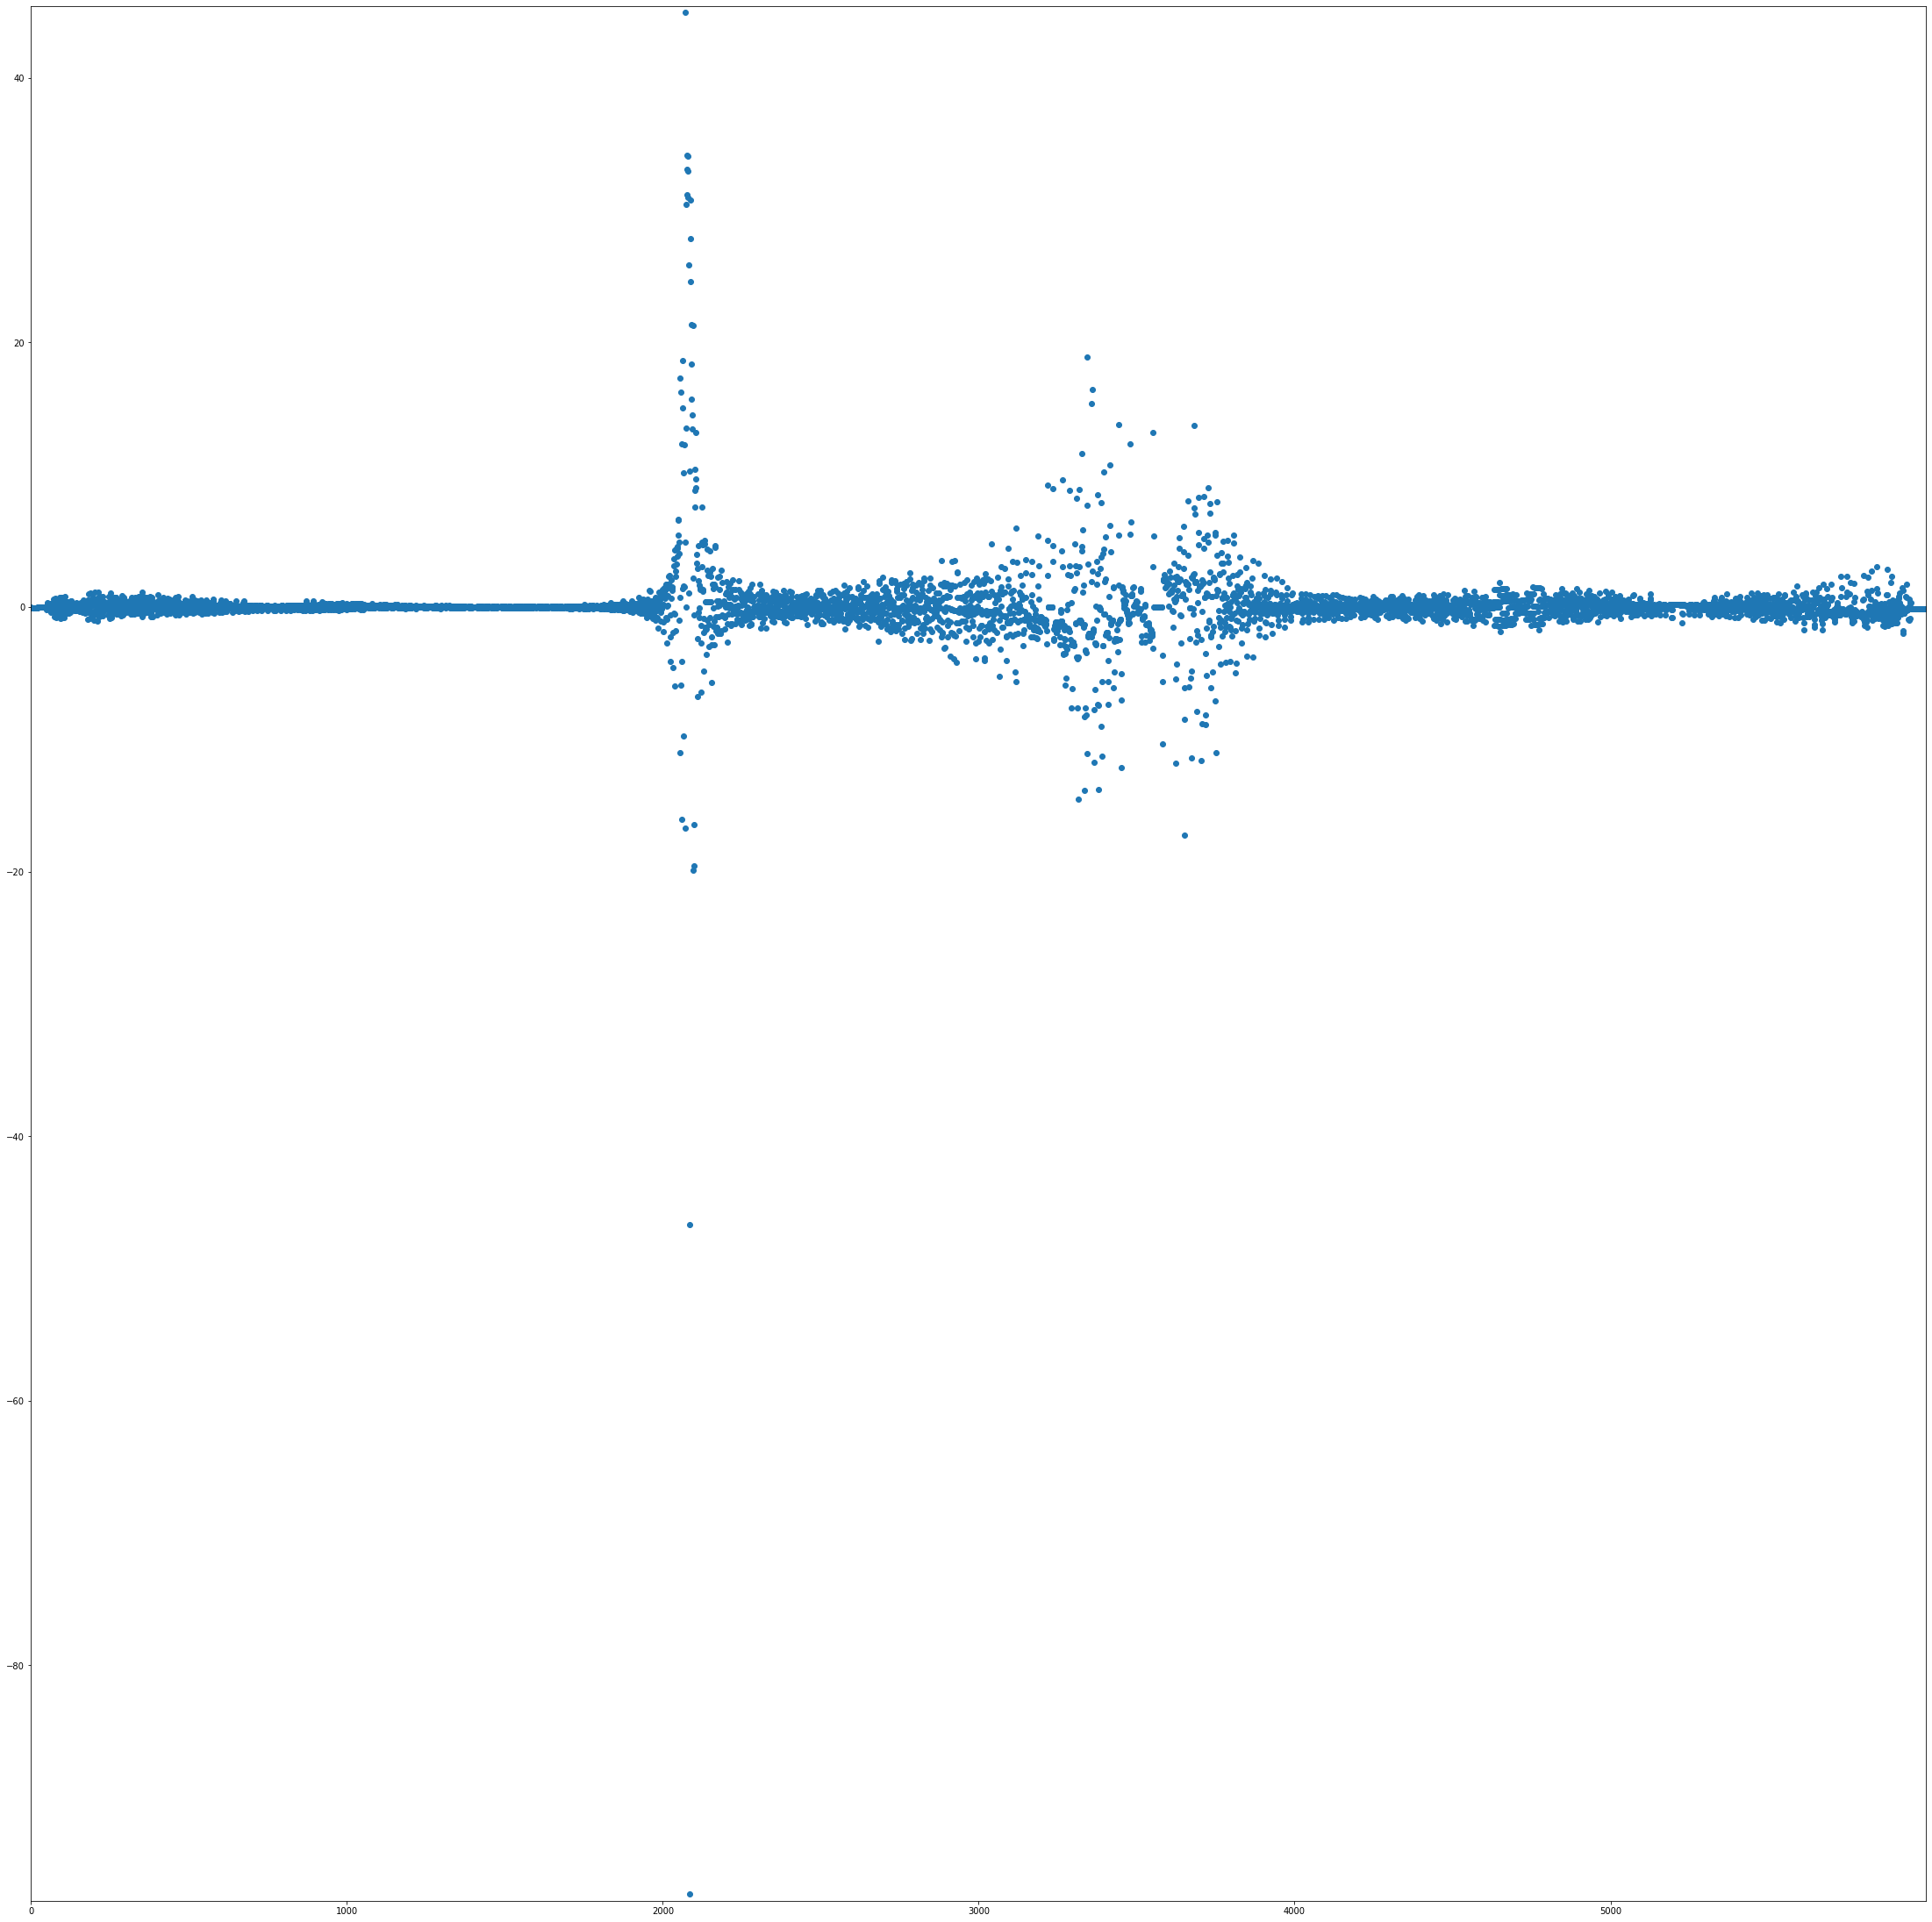

In [6]:
getCurvPlot(20, 100, range(0, 6000))

LOG: Extracting coordinates for Animal CRV_30_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_30_TEST_00...
LOG: Extracting coordinates for Animal CRV_30_TEST_01...
LOG: Extracting coordinates for Animal CRV_30_TEST_02...
LOG: Extracting coordinates for Animal CRV_30_TEST_03...
LOG: Extracting coordinates for Animal CRV_30_TEST_04...
LOG: Extracting coordinates for Animal CRV_30_TEST_05...
LOG: Extracting coordinates for Animal CRV_30_TEST_06...
LOG: Extracting coordinates for Animal CRV_30_TEST_07...
LOG: Extracting coordinates for Animal CRV_30_TEST_08...
LOG: Extracting coordinates for Animal CRV_30_TEST_09...
LOG: Extracting coordinates for Animal CRV_30_TEST_10...
LOG: Extracting coordinates for Animal CRV_30_TEST_11...
LOG: Extracting coordinates for Animal CRV_30_TEST_12...
LOG: Extracting coordinates for Animal CRV_30_TEST_13...
LOG: Extracting coordinates for Animal CRV_30_TEST_14...
LOG: Extracting coordinates for Animal CRV_30_TEST_15...
LOG: Extracting coordinates f

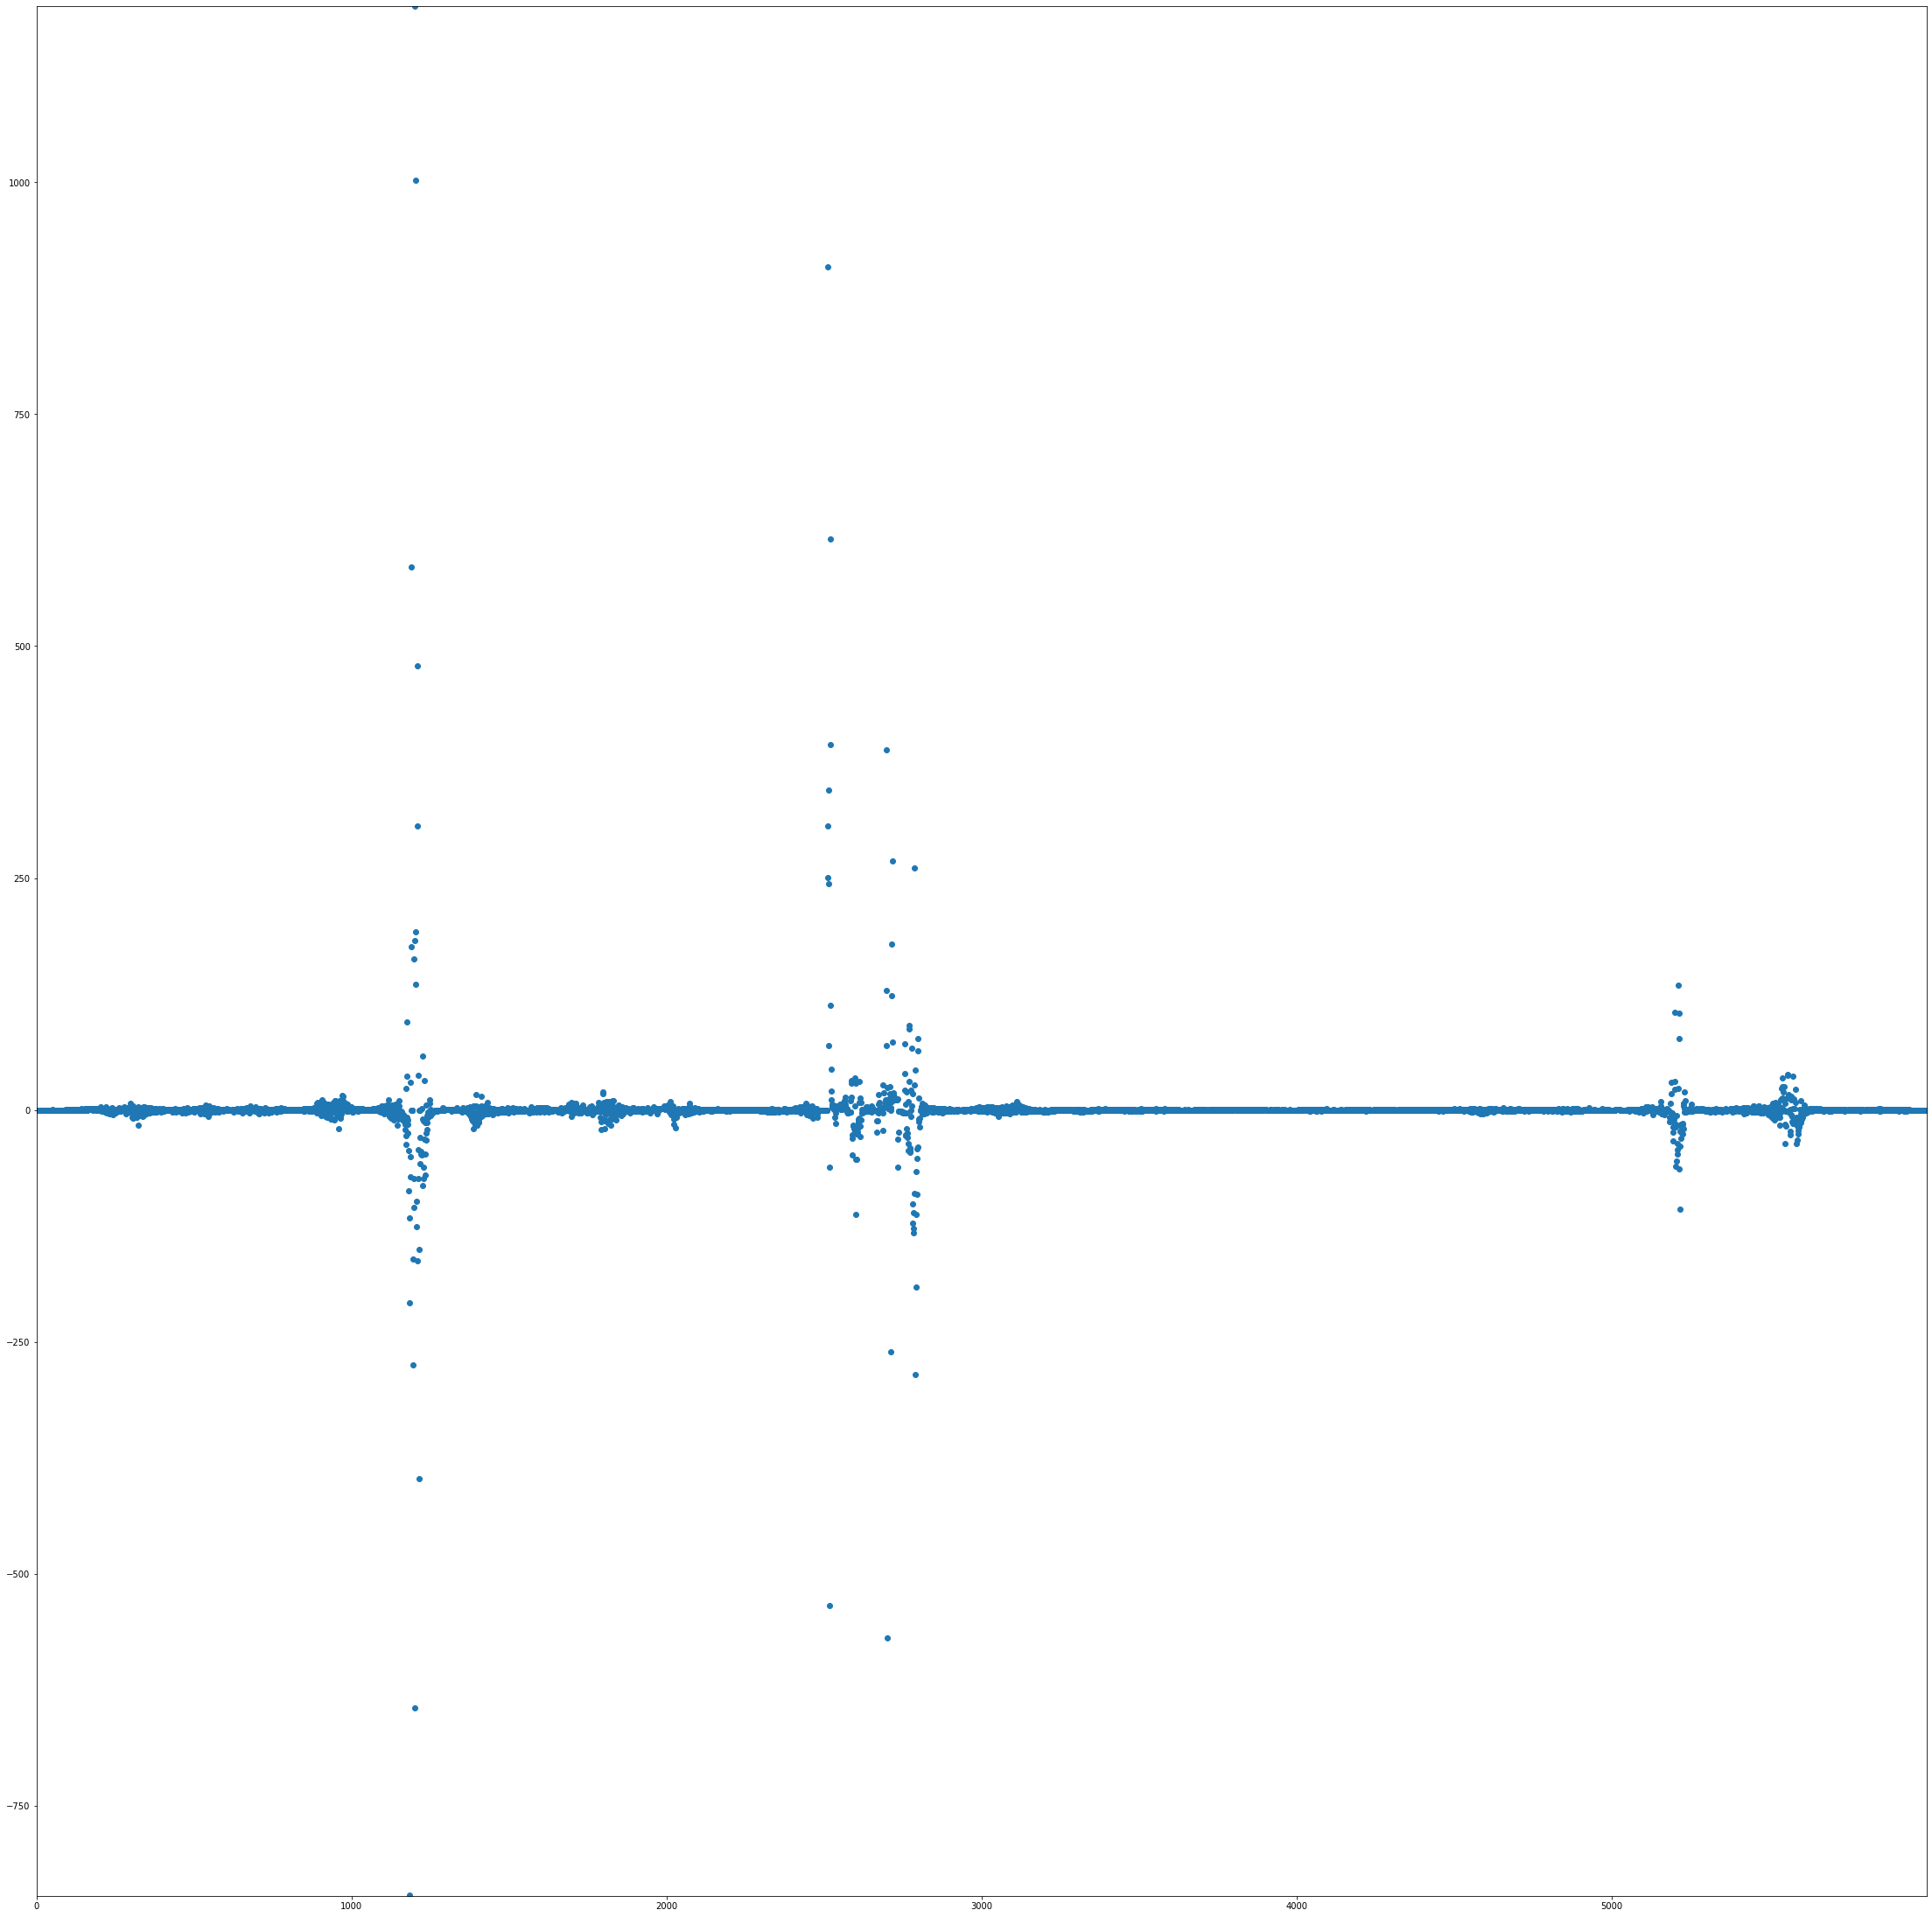

In [7]:
getCurvPlot(30, 100, range(0, 6000))

LOG: Extracting coordinates for Animal CRV_25_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_25_TEST_00...
LOG: Extracting coordinates for Animal CRV_25_TEST_01...
LOG: Extracting coordinates for Animal CRV_25_TEST_02...
LOG: Extracting coordinates for Animal CRV_25_TEST_03...
LOG: Extracting coordinates for Animal CRV_25_TEST_04...
LOG: Extracting coordinates for Animal CRV_25_TEST_05...
LOG: Extracting coordinates for Animal CRV_25_TEST_06...
LOG: Extracting coordinates for Animal CRV_25_TEST_07...
LOG: Extracting coordinates for Animal CRV_25_TEST_08...
LOG: Extracting coordinates for Animal CRV_25_TEST_09...
LOG: Extracting coordinates for Animal CRV_25_TEST_10...
LOG: Extracting coordinates for Animal CRV_25_TEST_11...
LOG: Extracting coordinates for Animal CRV_25_TEST_12...
LOG: Extracting coordinates for Animal CRV_25_TEST_13...
LOG: Extracting coordinates for Animal CRV_25_TEST_14...
LOG: Extracting coordinates for Animal CRV_25_TEST_15...
LOG: Extracting coordinates f

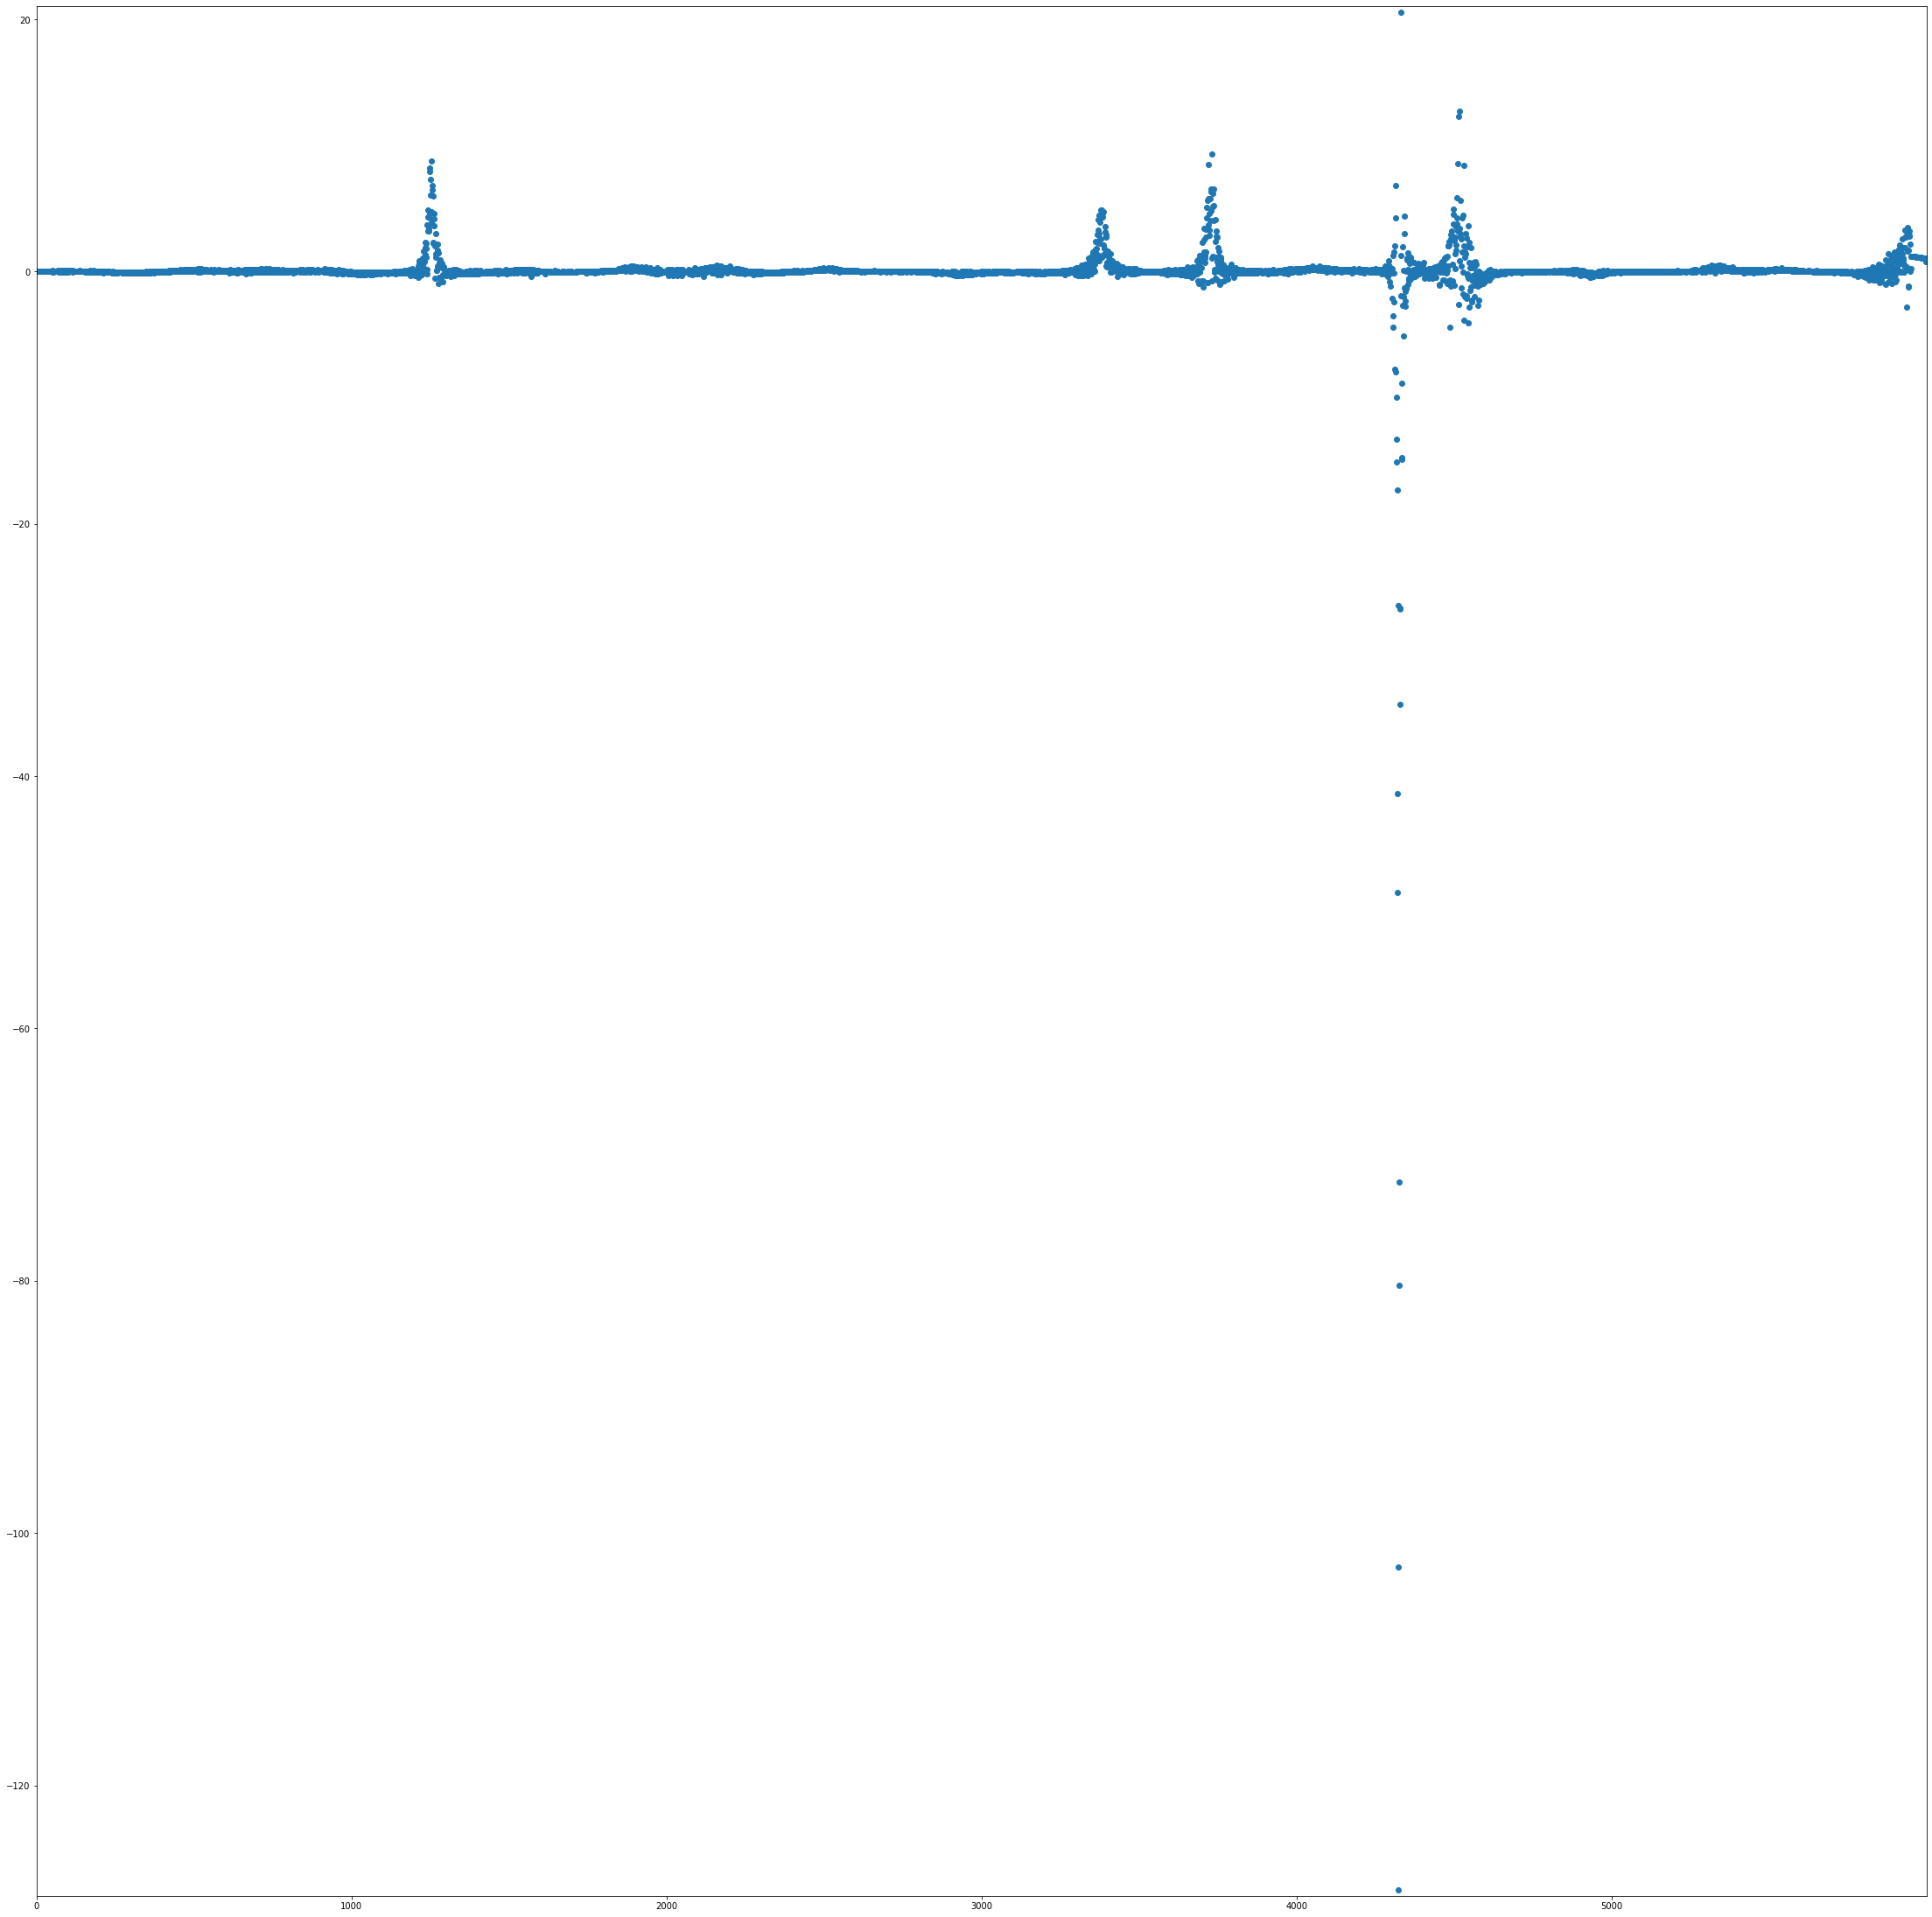

In [8]:
getCurvPlot(25, 100, range(0, 6000))

In [9]:
#test if inverting data gives us the same plot but reflected in x-axis and in y = mid value of x-axis

def getCurvForInvData(curve, FR):
    #get data
    curve_str = '%02d' % curve
    info_file_low = "/Users/karolinagrzeszkiewicz/robustness-tests2/locomotion/tests/robustness_tests/results2/FR_test_lower/CRV_"+curve_str+".json"
    info_file_high = "/Users/karolinagrzeszkiewicz/robustness-tests2/locomotion/tests/robustness_tests/results2/FR_test_higher/CRV_"+curve_str+".json"
    
    if FR in FR_low_sequence:
        test_name = "FR_test_lower"
        idx = FR_low_sequence.index(FR)+1
        animals_low = animal.get_animal_objs(info_file_low)
        animal_obj = animals_low[idx]
    elif FR in FR_high_sequence:
        test_name = "FR_test_higher"
        idx = FR_high_sequence.index(FR)+1
        animals_high = animal.get_animal_objs(info_file_high)
        animal_obj = animals_high[idx]
        
    def get_curve_data_inv(animal_obj, col_names=None):

        if col_names is None:
            col_names = ['X', 'Y']
        n_dims = len(col_names)
        if n_dims < 2 or n_dims > 3:
            raise Exception("length of col_names is {}, but it should be 2 or 3.".format(n_dims))
        coords = []
        for col in col_names:
            try:
                coords.append(locomotion.trajectory.smooth(animal_obj.get_raw_vals(col), animal_obj.get_frame_rate()))
            except KeyError:
                raise Exception("column name {} does not exist in animal dataset".format(col))
        print(coords)
        coords[0] = coords[0][::-1]
        coords[1] = coords[1][::-1]
        coords = np.array(coords) # MM
        first_deriv = locomotion.trajectory.get_derivatives(coords, axis=1) # MM per frame
        first_deriv = first_deriv * animal_obj.get_frame_rate() # MM per second
        second_deriv = locomotion.trajectory.get_derivatives(first_deriv, axis=1) # MM per second per frame
        second_deriv = second_deriv * animal_obj.get_frame_rate() # MM per second per second
        velocity = locomotion.trajectory.get_velocity(first_deriv)
        curvature = locomotion.trajectory.get_curvature(first_deriv, second_deriv, velocity)

        start_time, end_time = animal_obj.get_baseline_times()
        animal_obj.add_raw_vals('Velocity', velocity)
        animal_obj.add_stats('Velocity', 'baseline', start_time, end_time)
        animal_obj.add_raw_vals('Curvature', curvature)
        animal_obj.add_stats('Curvature', 'baseline', start_time, end_time)
        return first_deriv, second_deriv, velocity, curvature

    d1, d2, V, C = get_curve_data_inv(animal_obj)

    return C

In [10]:
def getCurvPlotInv(curve, FR, zoom = None):
    curv = getCurvForInvData(curve, FR)
    
    if zoom == None:
        zoom_range = range(FR*60)
    else:
        zoom_range = zoom
    
    curv = curv[zoom_range[0]:zoom_range[-1]]
            
    fig=plt.figure(figsize = (30,30))
    ax=fig.add_axes([0,0,1,1])
    plt.xlim([0, len(curv)])
    plt.ylim([min(curv)-0.5, max(curv) + 0.5])
    ax.scatter(range(len(curv)), curv)

LOG: Extracting coordinates for Animal CRV_25_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_25_TEST_00...
LOG: Extracting coordinates for Animal CRV_25_TEST_01...
LOG: Extracting coordinates for Animal CRV_25_TEST_02...
LOG: Extracting coordinates for Animal CRV_25_TEST_03...
LOG: Extracting coordinates for Animal CRV_25_TEST_04...
LOG: Extracting coordinates for Animal CRV_25_TEST_05...
LOG: Extracting coordinates for Animal CRV_25_TEST_06...
LOG: Extracting coordinates for Animal CRV_25_TEST_07...
LOG: Extracting coordinates for Animal CRV_25_TEST_08...
LOG: Extracting coordinates for Animal CRV_25_TEST_09...
LOG: Extracting coordinates for Animal CRV_25_TEST_10...
LOG: Extracting coordinates for Animal CRV_25_TEST_11...
LOG: Extracting coordinates for Animal CRV_25_TEST_12...
LOG: Extracting coordinates for Animal CRV_25_TEST_13...
LOG: Extracting coordinates for Animal CRV_25_TEST_14...
LOG: Extracting coordinates for Animal CRV_25_TEST_15...
LOG: Extracting coordinates f

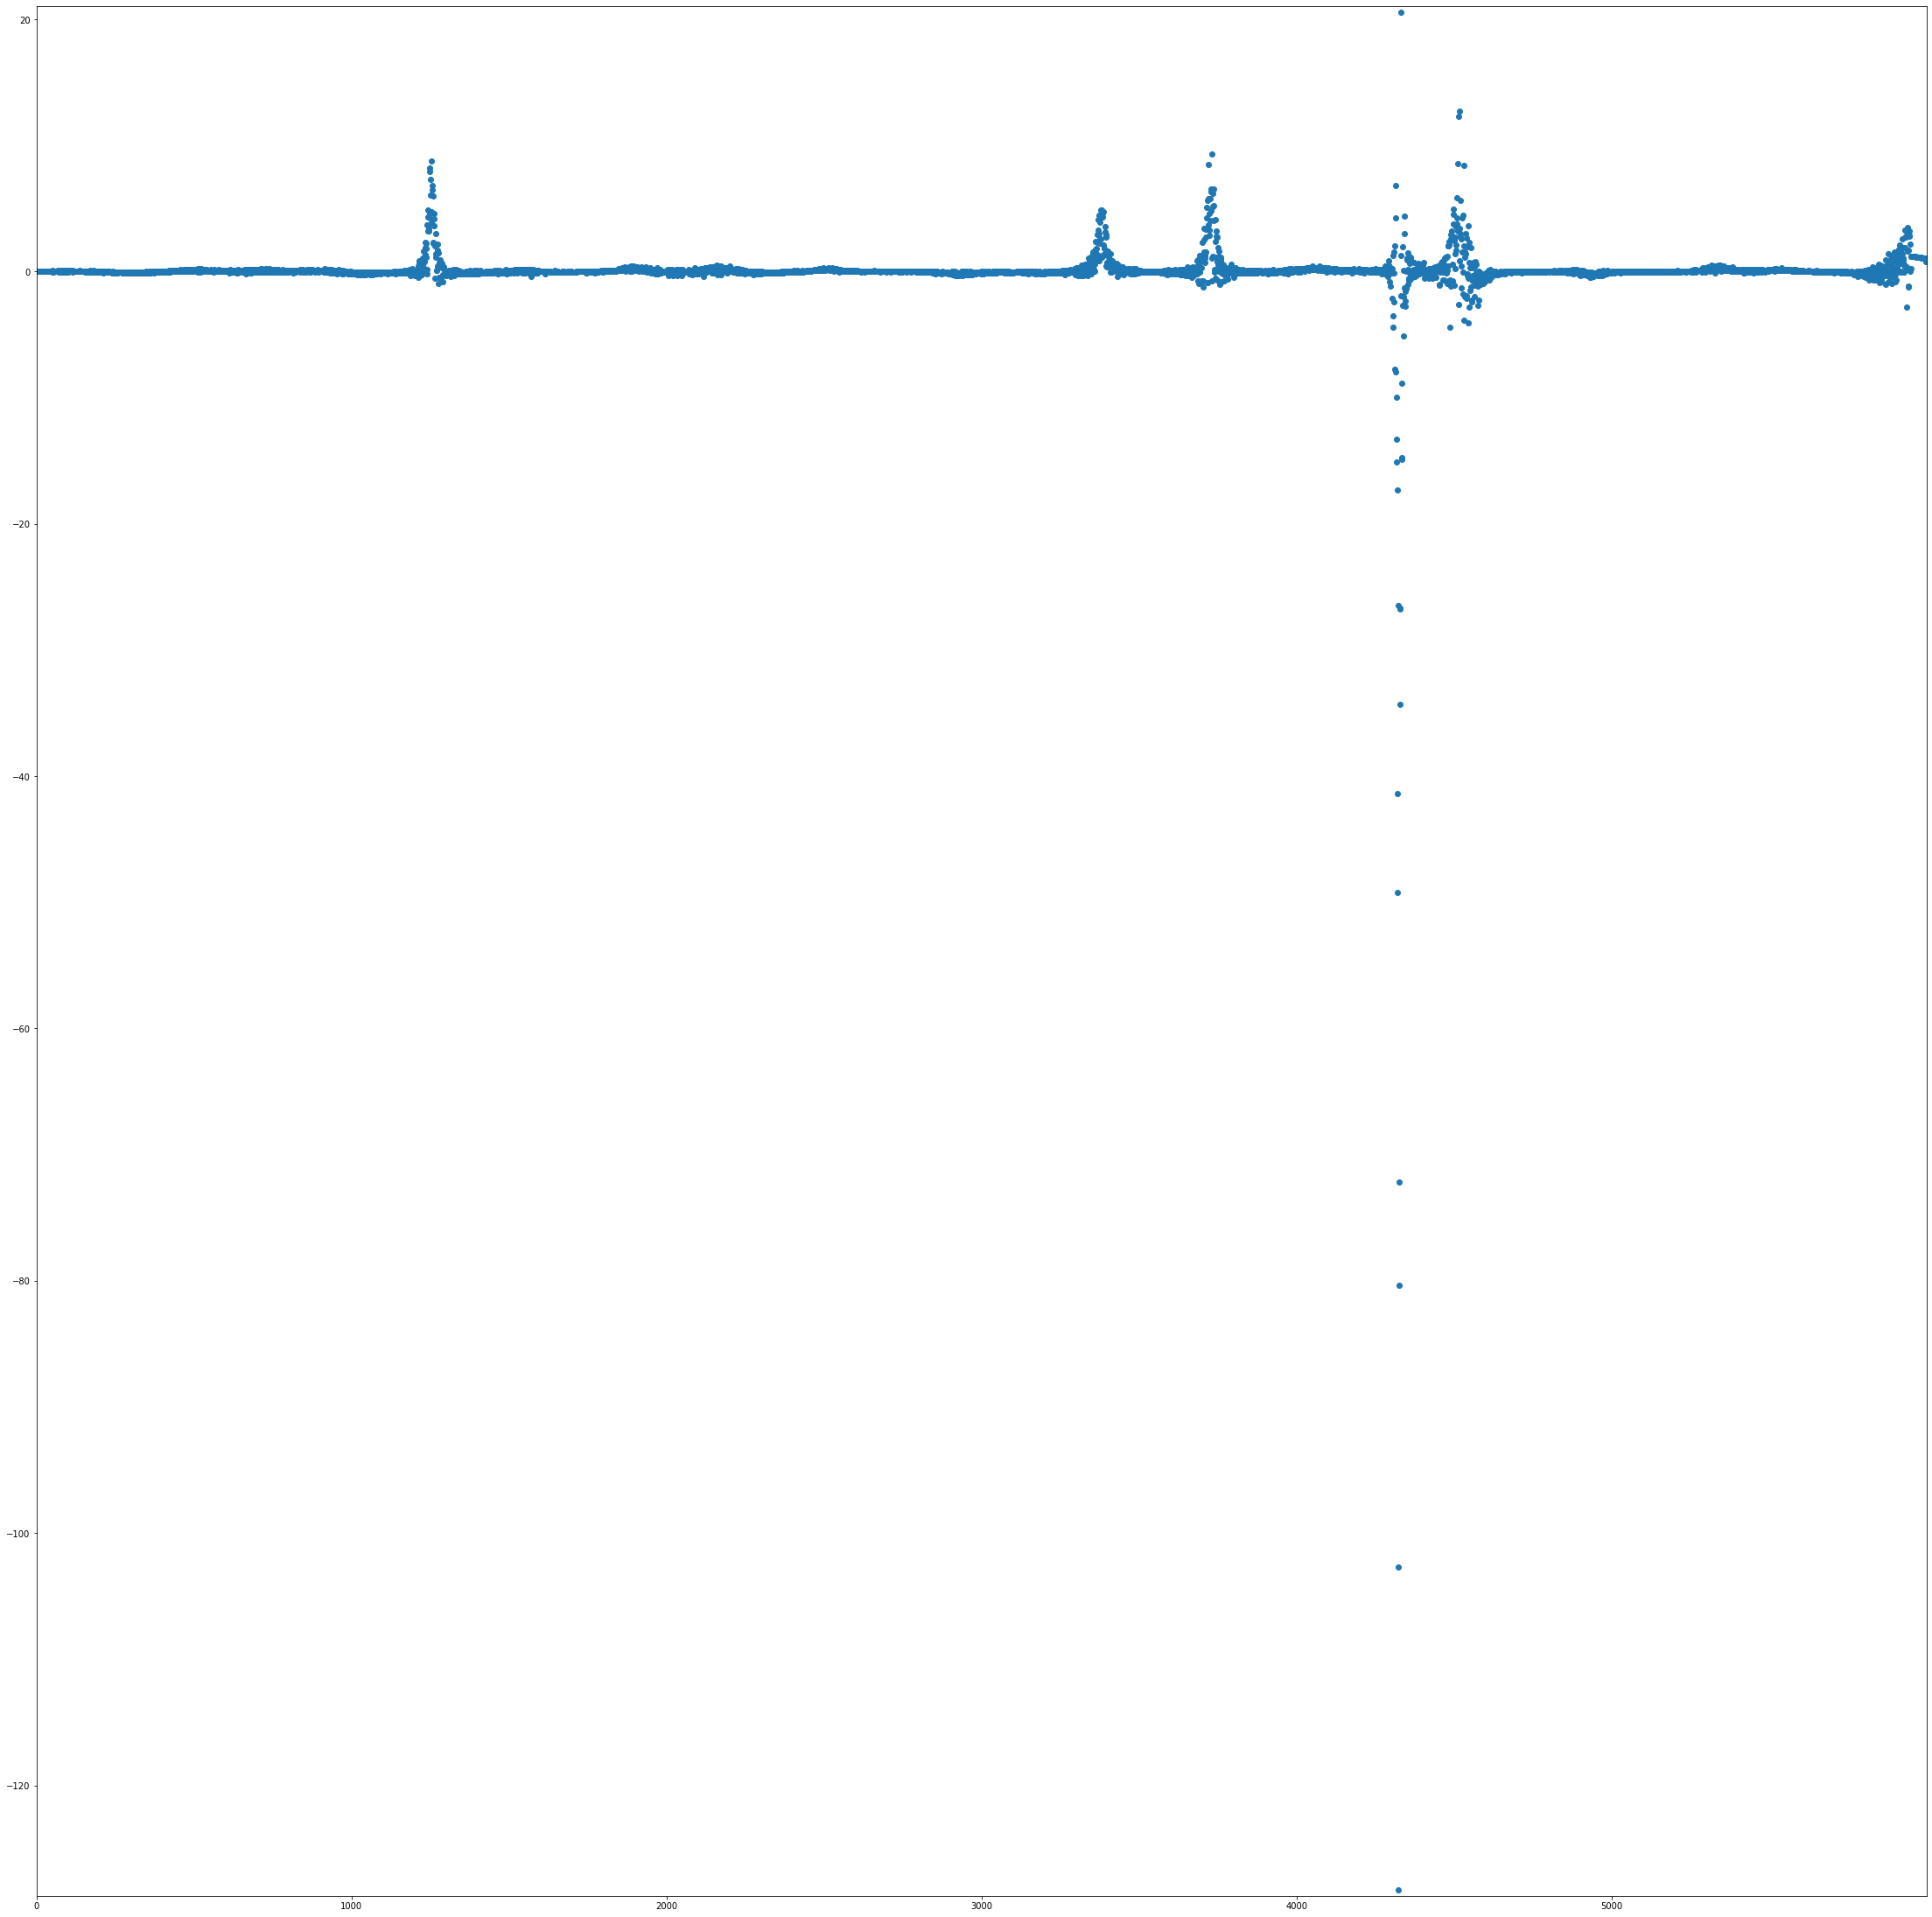

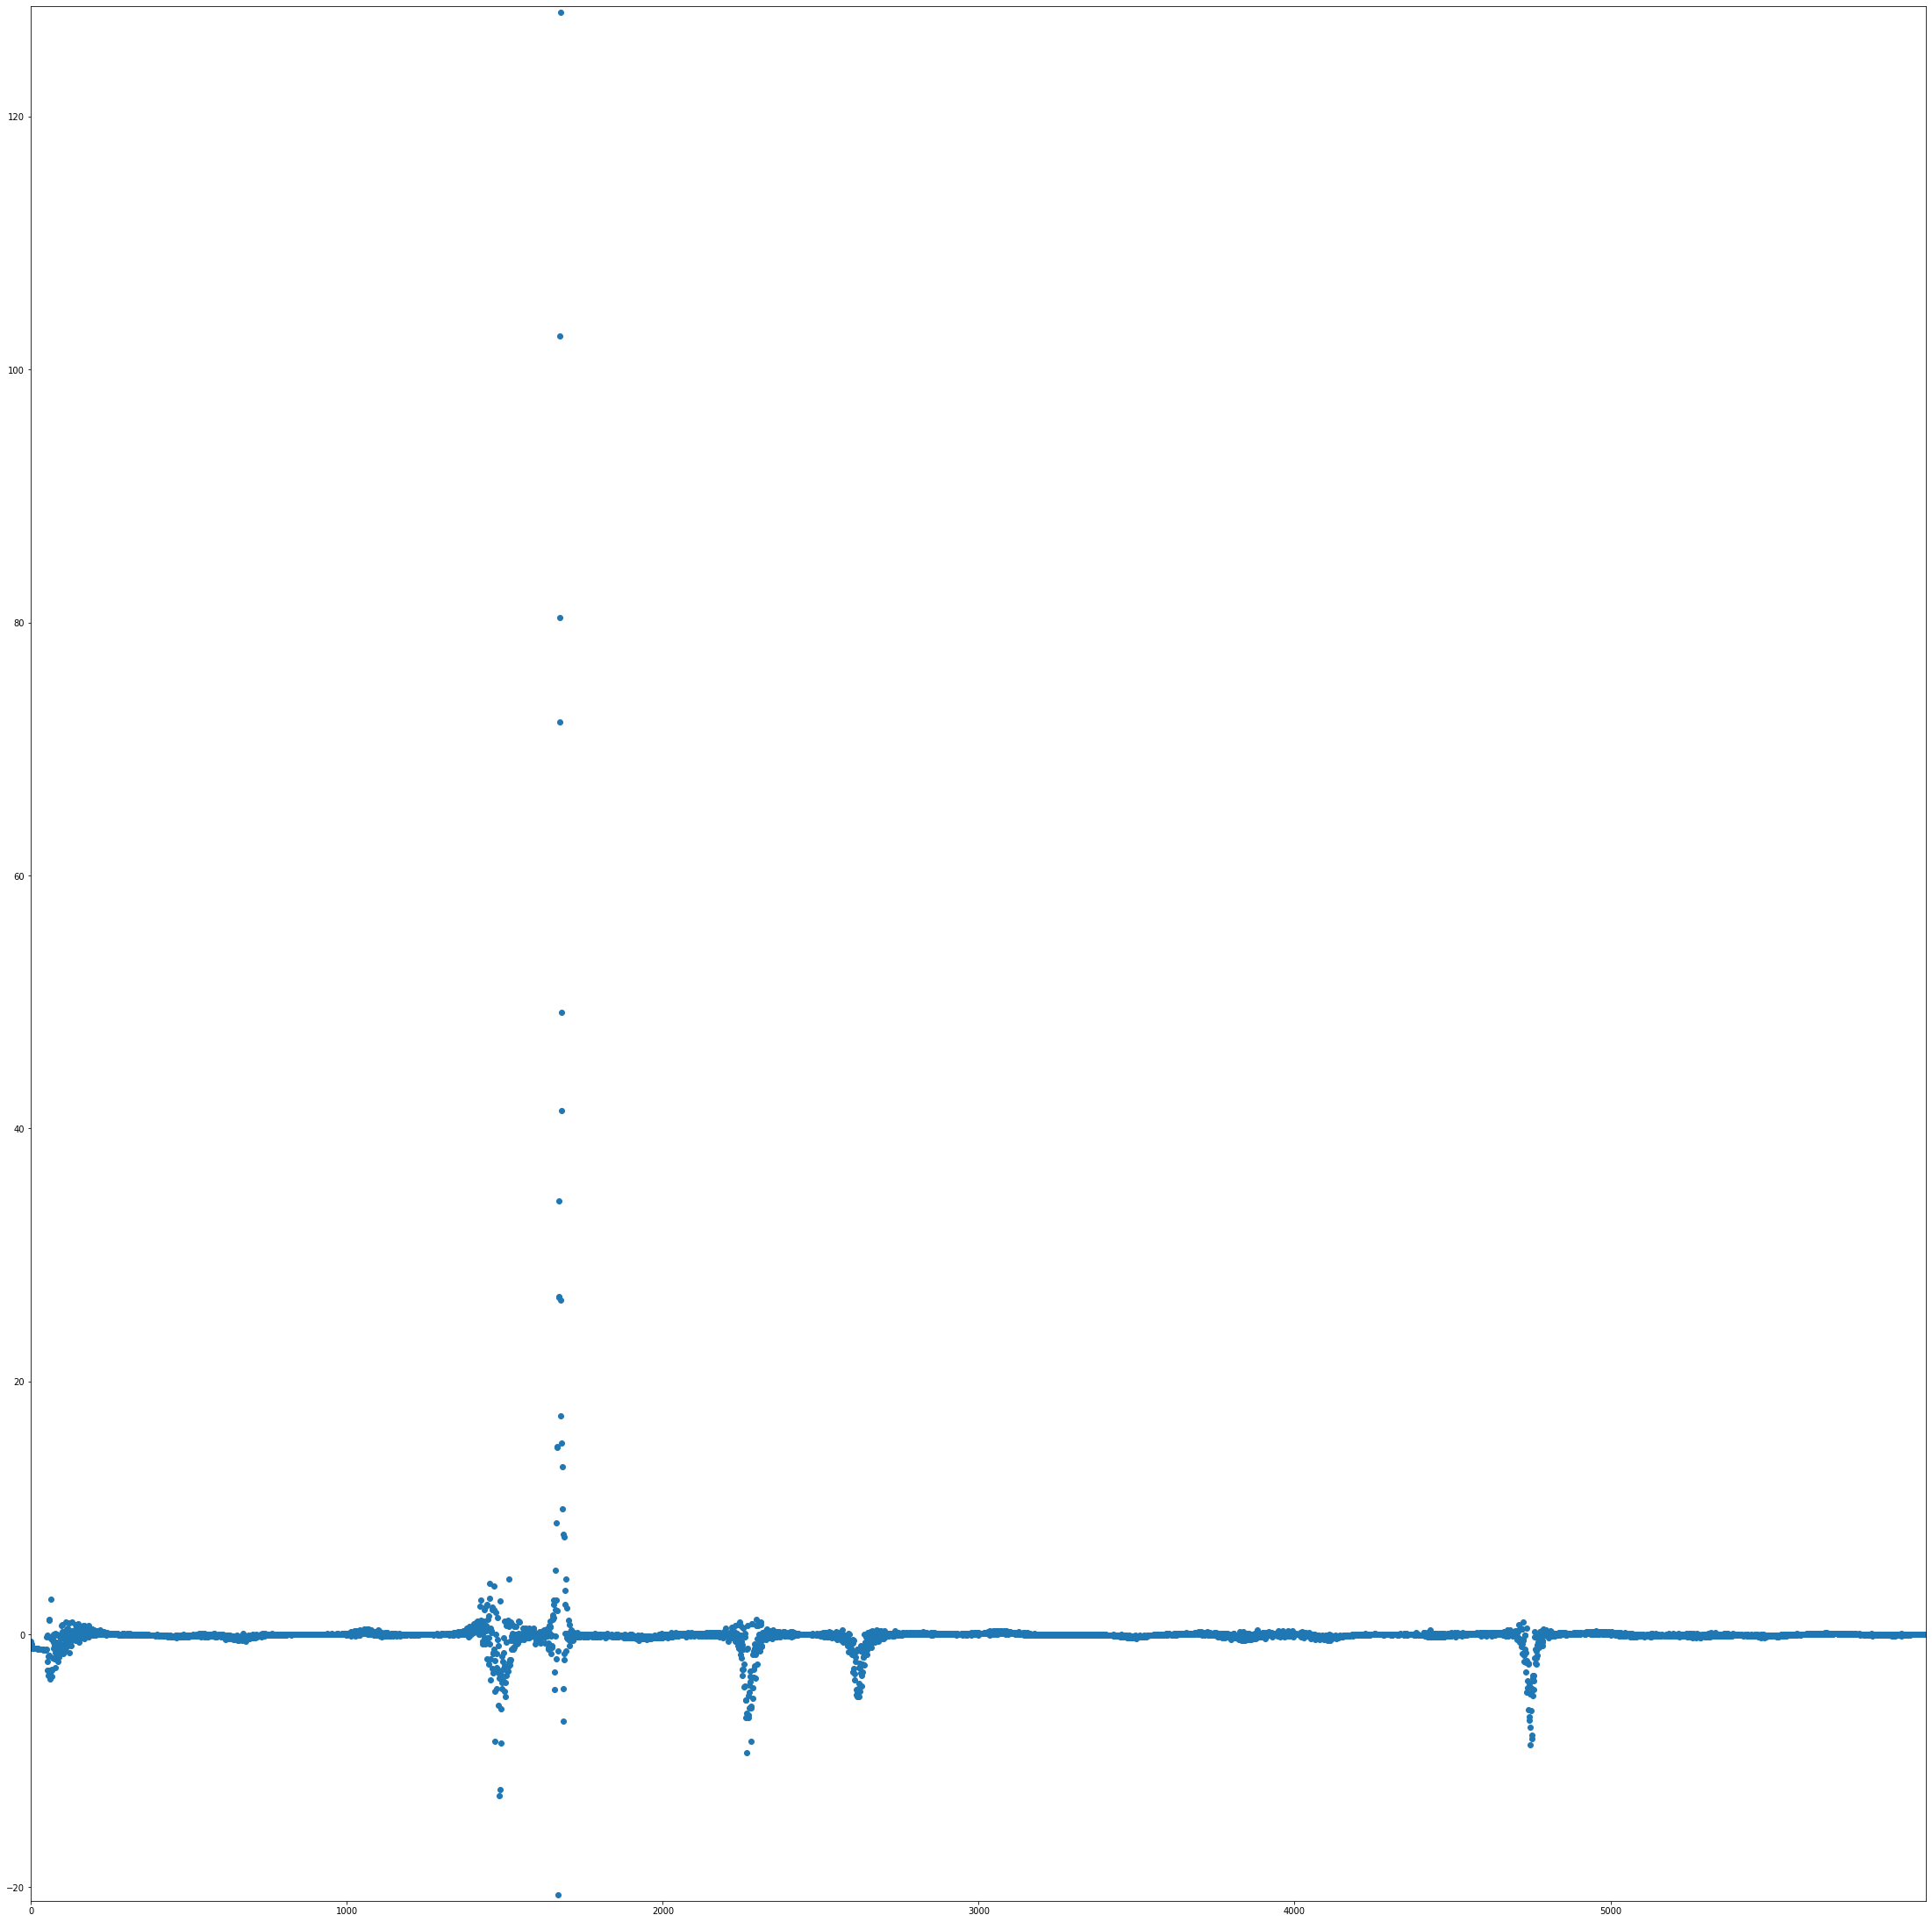

In [11]:
getCurvPlot(25, 100, zoom = range(6000))
getCurvPlotInv(25, 100, zoom = range(6000))

In [12]:
c = getCurvForInvData(25, 100)
c

LOG: Extracting coordinates for Animal CRV_25_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_25_TEST_00...
LOG: Extracting coordinates for Animal CRV_25_TEST_01...
LOG: Extracting coordinates for Animal CRV_25_TEST_02...
LOG: Extracting coordinates for Animal CRV_25_TEST_03...
LOG: Extracting coordinates for Animal CRV_25_TEST_04...
LOG: Extracting coordinates for Animal CRV_25_TEST_05...
LOG: Extracting coordinates for Animal CRV_25_TEST_06...
LOG: Extracting coordinates for Animal CRV_25_TEST_07...
LOG: Extracting coordinates for Animal CRV_25_TEST_08...
LOG: Extracting coordinates for Animal CRV_25_TEST_09...
LOG: Extracting coordinates for Animal CRV_25_TEST_10...
LOG: Extracting coordinates for Animal CRV_25_TEST_11...
LOG: Extracting coordinates for Animal CRV_25_TEST_12...
LOG: Extracting coordinates for Animal CRV_25_TEST_13...
LOG: Extracting coordinates for Animal CRV_25_TEST_14...
LOG: Extracting coordinates for Animal CRV_25_TEST_15...
LOG: Extracting coordinates f

[-0.5184092887057681,
 -0.780943606776678,
 -1.0498192372187964,
 -1.05508771088299,
 -1.060163947677043,
 -1.0650589888665045,
 -1.0697843010086259,
 -1.0743517064083197,
 -1.0787733130881976,
 -1.0830614446341271,
 -1.0872285703879343,
 -1.0912872363162682,
 -1.0952499967478284,
 -1.0991293472890202,
 -1.1029376591589246,
 -1.1066871150413338,
 -1.110389646565751,
 -1.1140568735619047,
 -1.117700045096641,
 -1.1213299822806502,
 -1.1249570228552528,
 -1.1285909675674737,
 -1.132241028232224,
 -1.135915777385707,
 -1.1396230995090735,
 -1.1433701437596118,
 -1.1471632780914276,
 -1.151008044663644,
 -1.1549091165992222,
 -1.1588702559721613,
 -1.16289427298533,
 -1.1669829864585326,
 -1.1711371855847725,
 -1.1753565930508223,
 -1.1796398296987303,
 -1.1839843808754709,
 -1.1883865646453444,
 -1.1928415021821934,
 -1.1973430906847327,
 -1.201883979129565,
 -1.206455547335185,
 -1.2110478888202676,
 -1.2156497979856054,
 -1.2202487622204834,
 -1.2248309595257438,
 -1.229381262414212,
 -

LOG: Extracting coordinates for Animal CRV_35_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_35_TEST_00...
LOG: Extracting coordinates for Animal CRV_35_TEST_01...
LOG: Extracting coordinates for Animal CRV_35_TEST_02...
LOG: Extracting coordinates for Animal CRV_35_TEST_03...
LOG: Extracting coordinates for Animal CRV_35_TEST_04...
LOG: Extracting coordinates for Animal CRV_35_TEST_05...
LOG: Extracting coordinates for Animal CRV_35_TEST_06...
LOG: Extracting coordinates for Animal CRV_35_TEST_07...
LOG: Extracting coordinates for Animal CRV_35_TEST_08...
LOG: Extracting coordinates for Animal CRV_35_TEST_09...
LOG: Extracting coordinates for Animal CRV_35_TEST_10...
LOG: Extracting coordinates for Animal CRV_35_TEST_11...
LOG: Extracting coordinates for Animal CRV_35_TEST_12...
LOG: Extracting coordinates for Animal CRV_35_TEST_13...
LOG: Extracting coordinates for Animal CRV_35_TEST_14...
LOG: Extracting coordinates for Animal CRV_35_TEST_15...
LOG: Extracting coordinates f

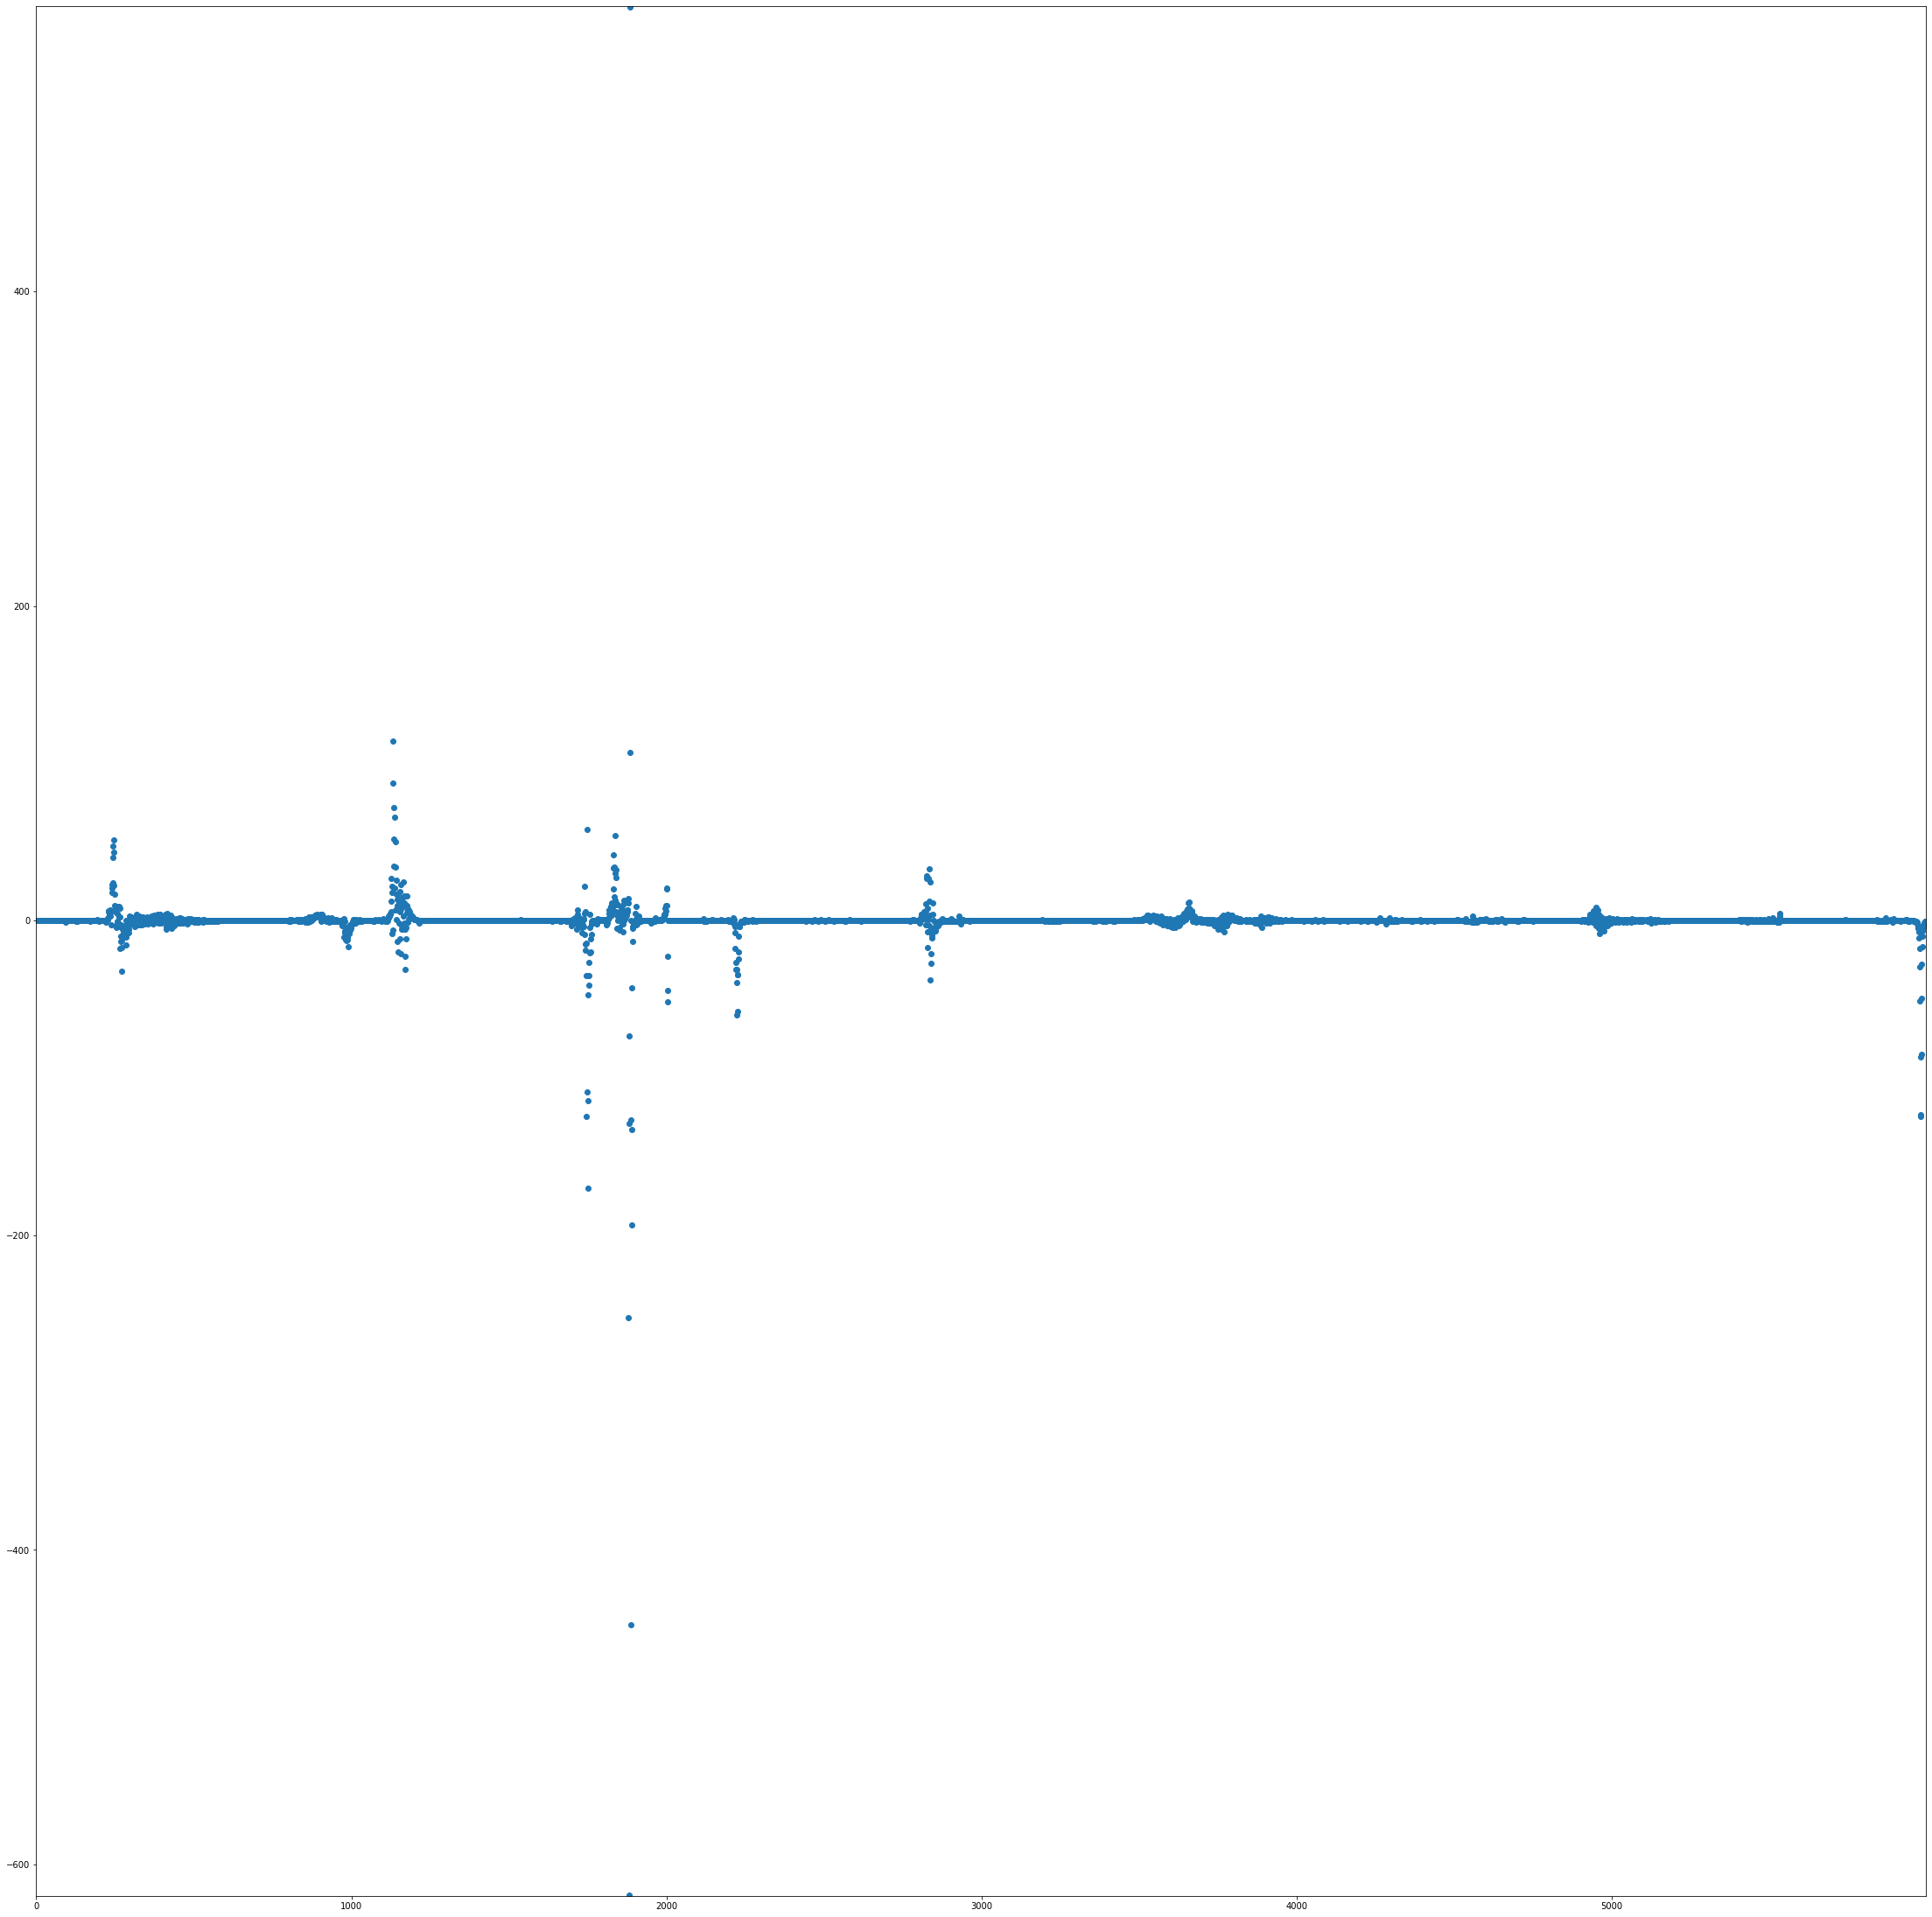

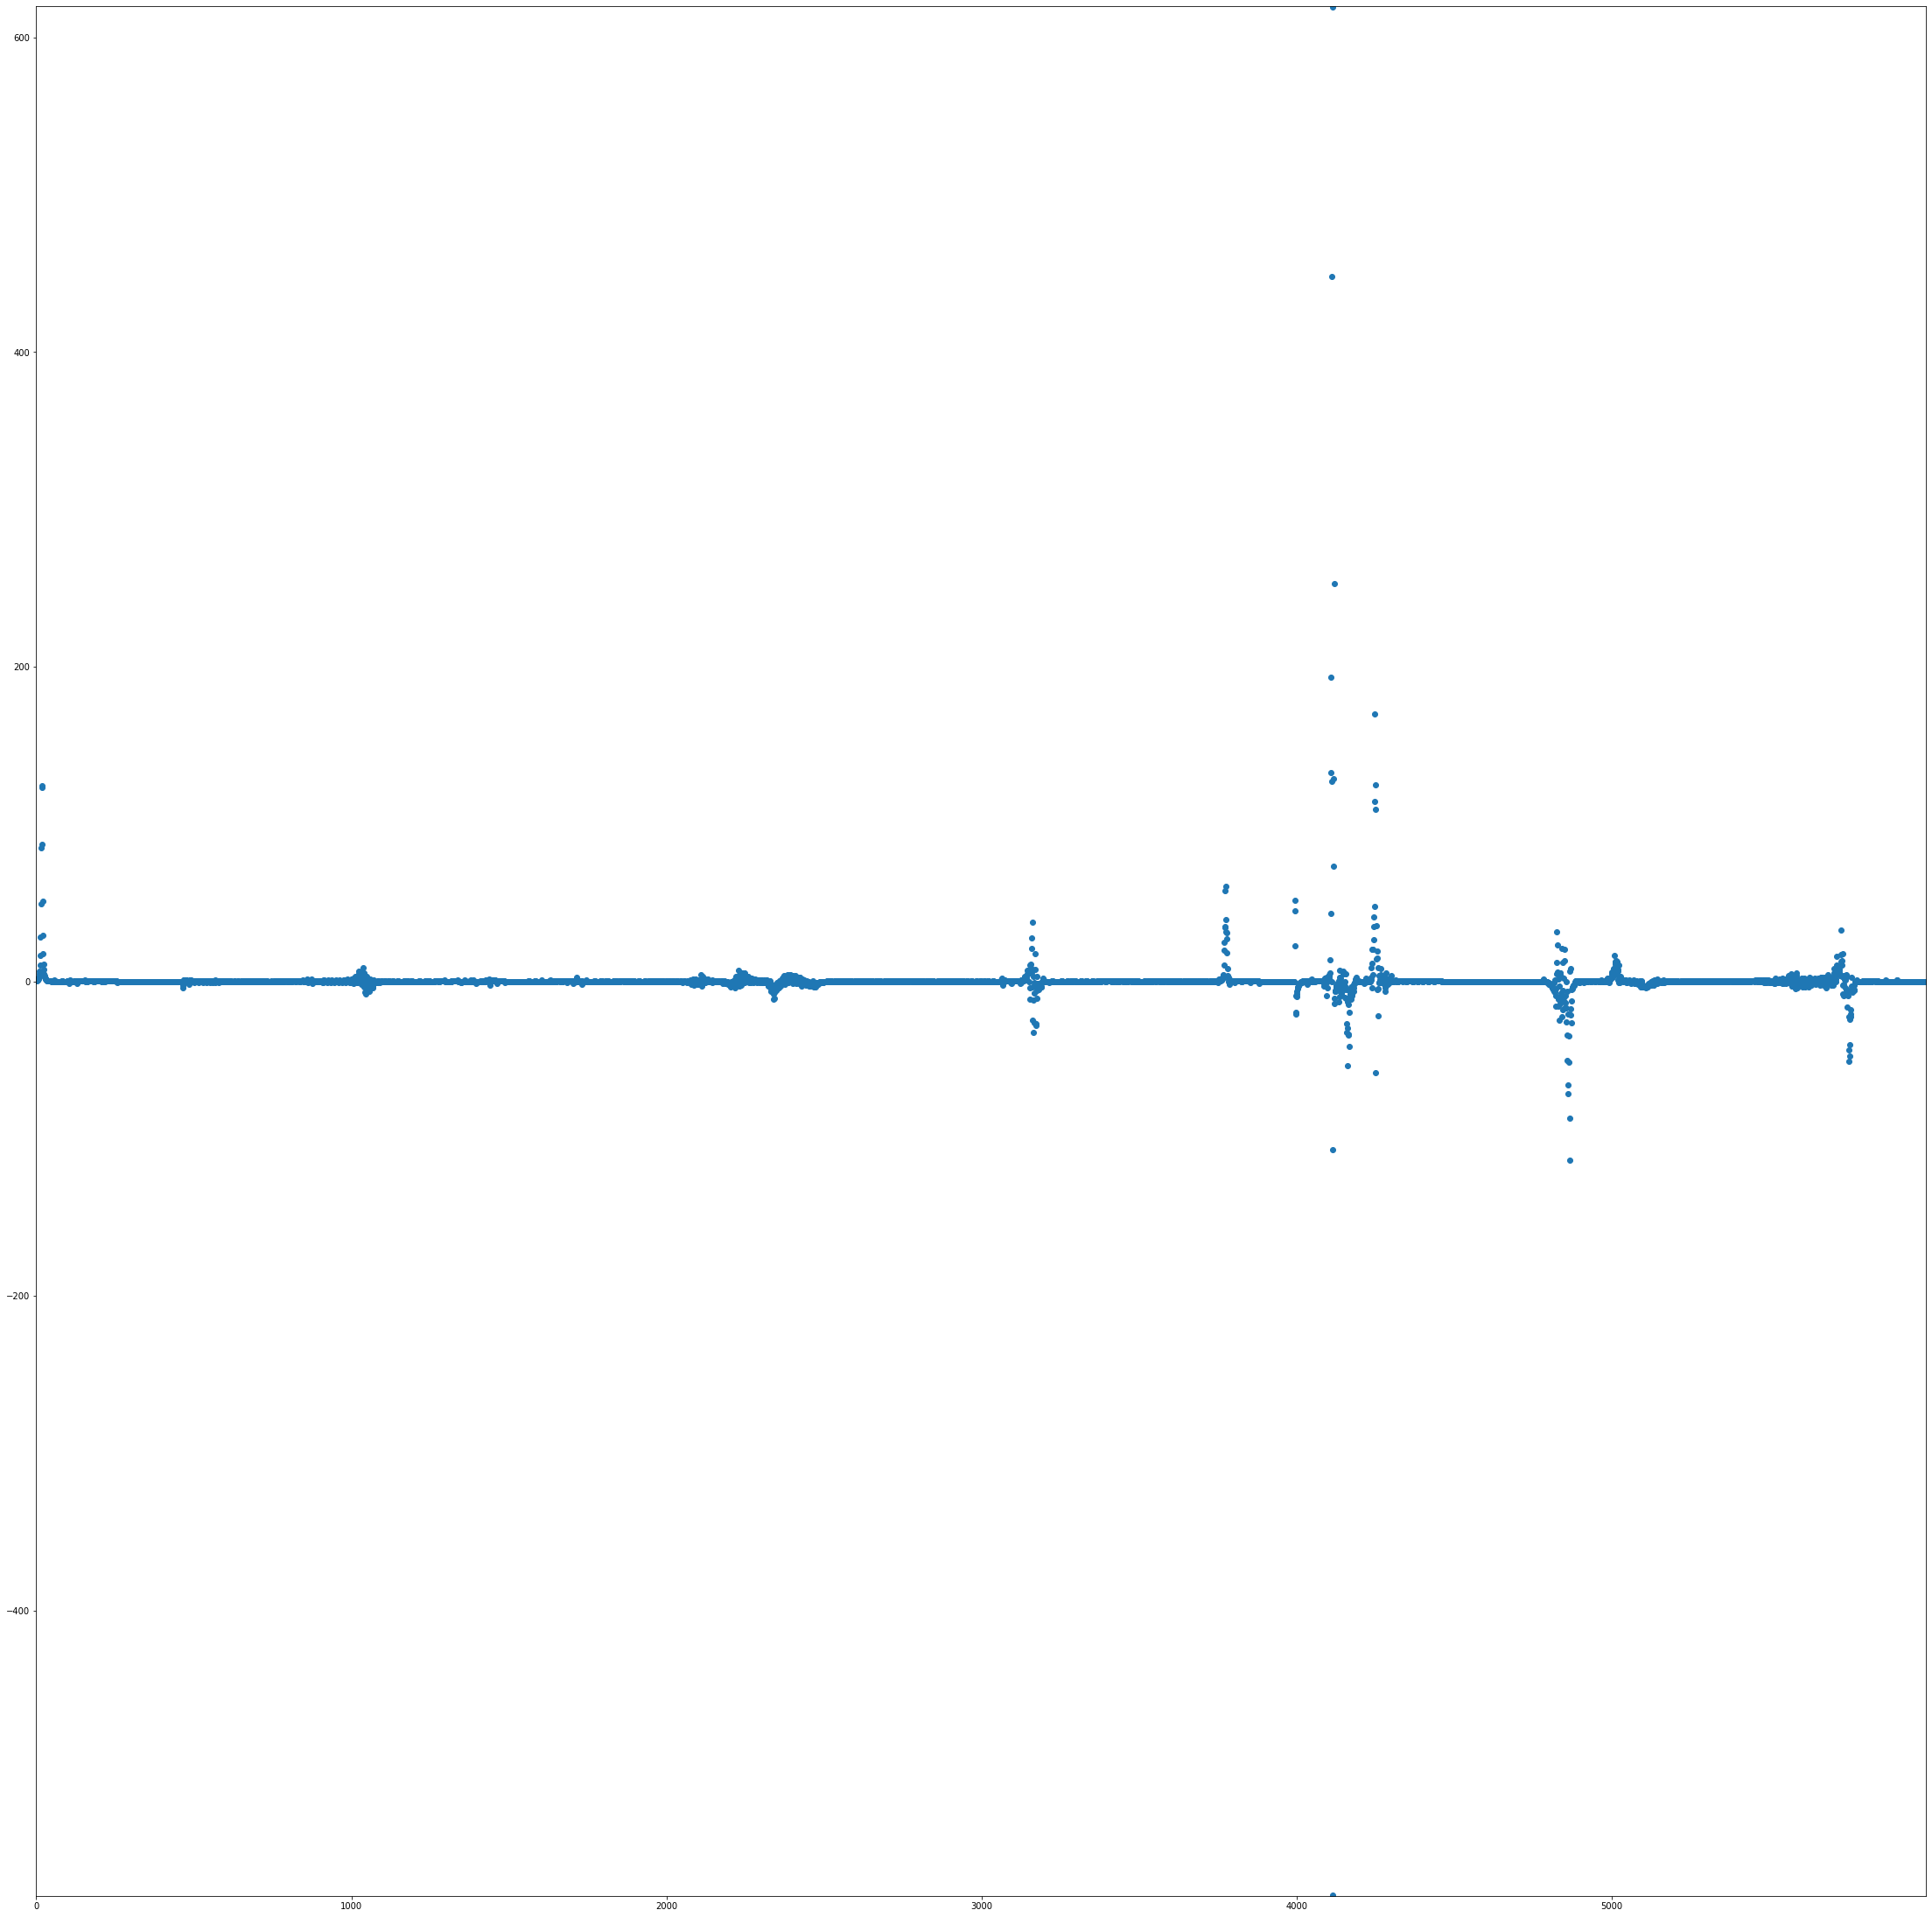

In [13]:
getCurvPlot(35, 100, zoom = range(6000))
getCurvPlotInv(35, 100, zoom = range(6000))

LOG: Extracting coordinates for Animal CRV_44_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_44_TEST_00...
LOG: Extracting coordinates for Animal CRV_44_TEST_01...
LOG: Extracting coordinates for Animal CRV_44_TEST_02...
LOG: Extracting coordinates for Animal CRV_44_TEST_03...
LOG: Extracting coordinates for Animal CRV_44_TEST_04...
LOG: Extracting coordinates for Animal CRV_44_TEST_05...
LOG: Extracting coordinates for Animal CRV_44_TEST_06...
LOG: Extracting coordinates for Animal CRV_44_TEST_07...
LOG: Extracting coordinates for Animal CRV_44_TEST_08...
LOG: Extracting coordinates for Animal CRV_44_TEST_09...
LOG: Extracting coordinates for Animal CRV_44_TEST_10...
LOG: Extracting coordinates for Animal CRV_44_TEST_11...
LOG: Extracting coordinates for Animal CRV_44_TEST_12...
LOG: Extracting coordinates for Animal CRV_44_TEST_13...
LOG: Extracting coordinates for Animal CRV_44_TEST_14...
LOG: Extracting coordinates for Animal CRV_44_TEST_15...
LOG: Extracting coordinates f

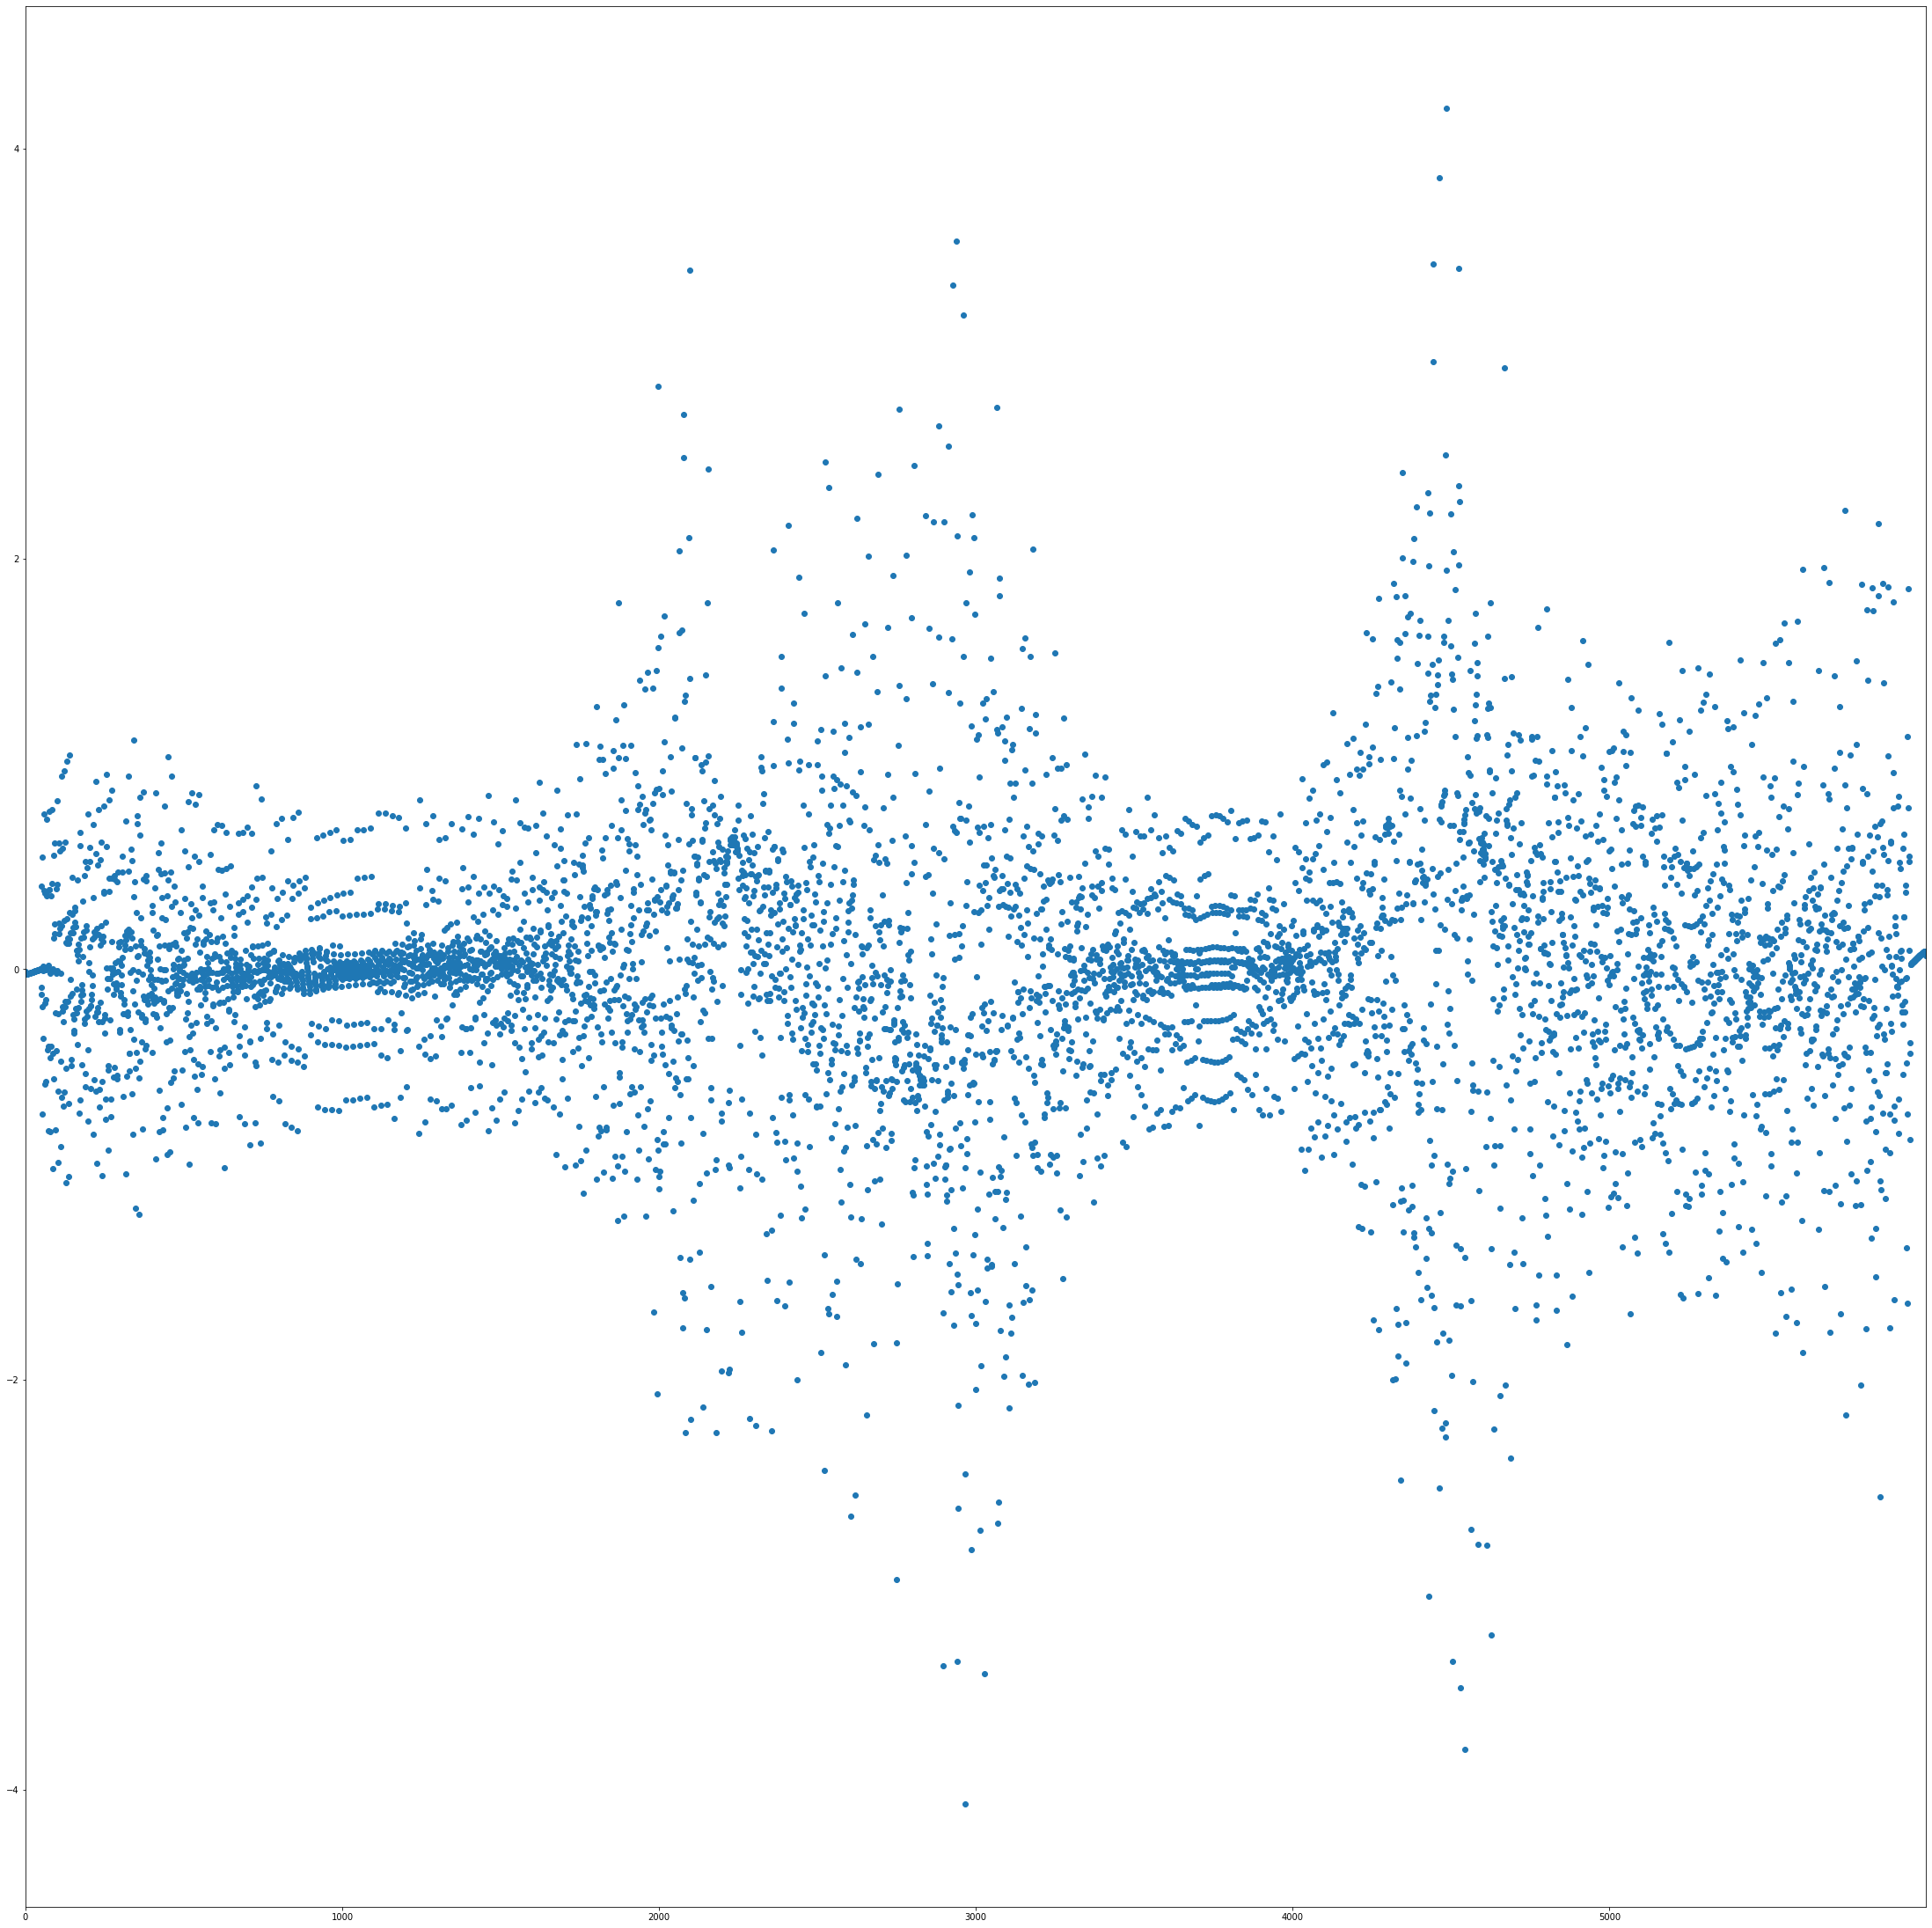

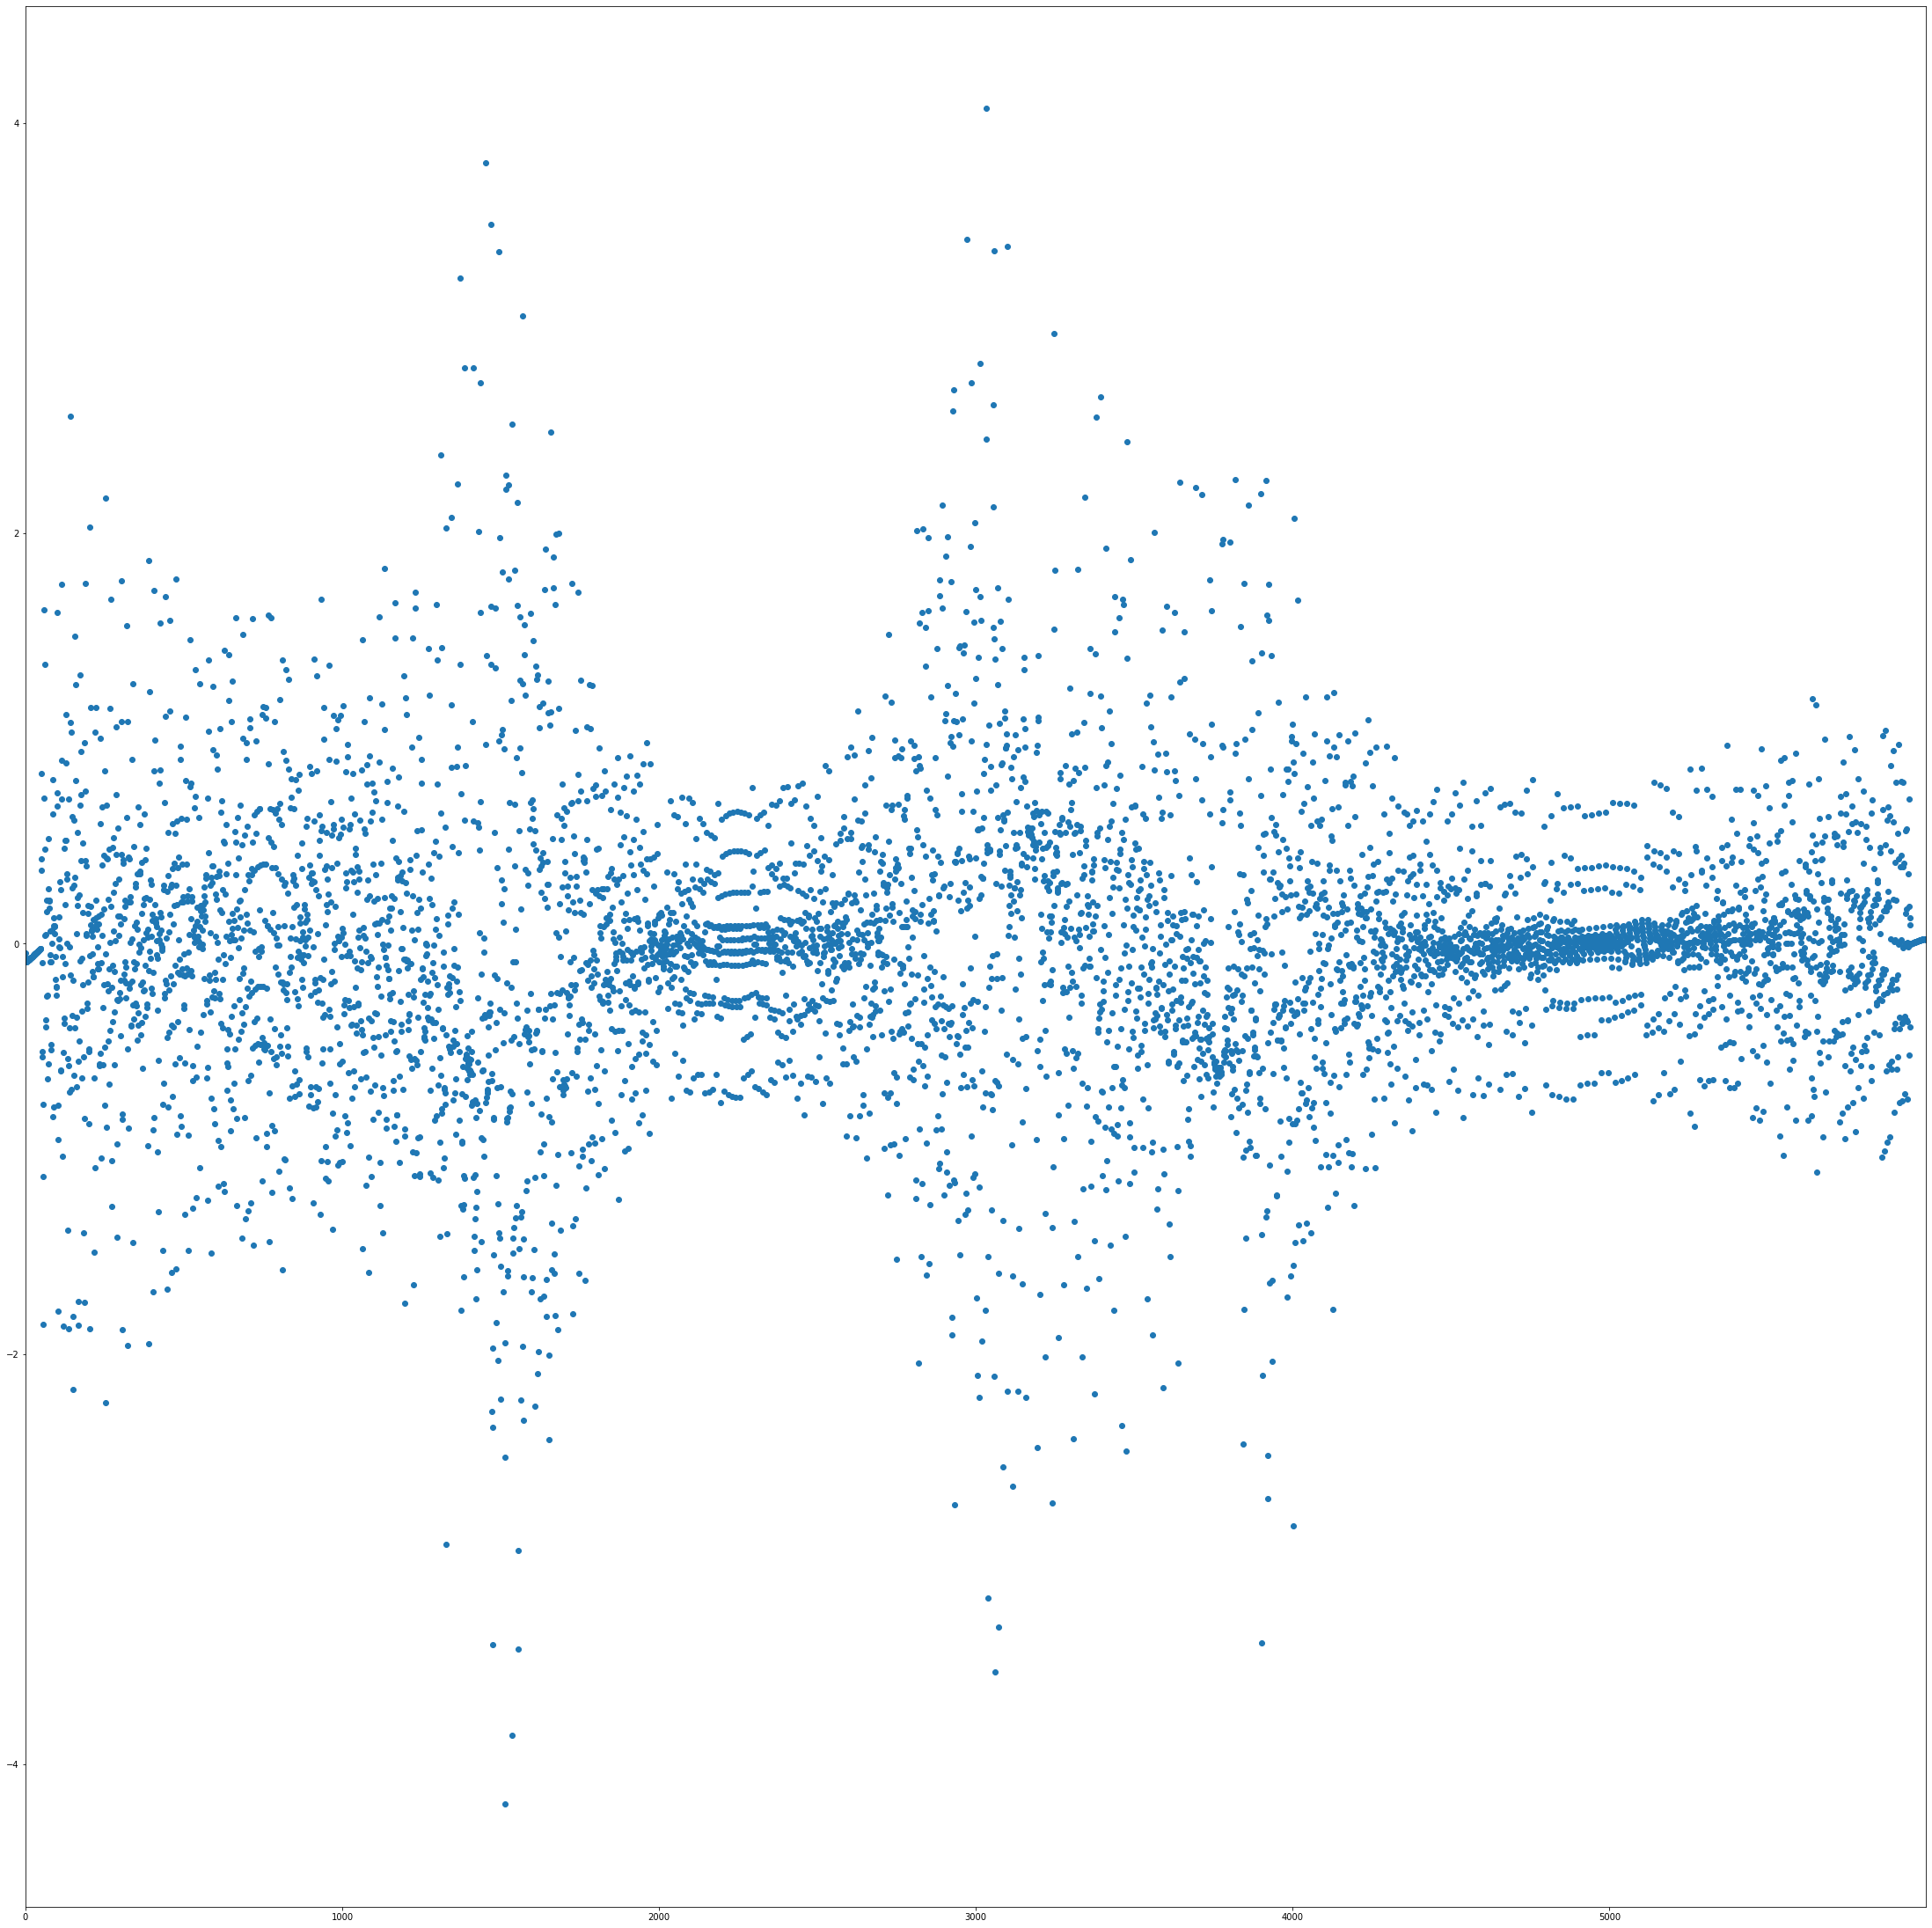

In [14]:
getCurvPlot(44, 100, zoom = range(6000))
getCurvPlotInv(44, 100, zoom = range(6000))
#works

In [25]:
#test smoothing the curvature noise

def getCurvPlotSmooth(curve, FR, c = 1, ORDER = 3, zoom = None):
    curv = getCurv(curve, FR)
    
    if zoom is None:
        zoom_range = range(FR*60)
    else:
        zoom_range = zoom
    
    SMOOTH_RANGE_MIN = 5
    def smooth(sequence, frame_rate):
        smooth_range = max(SMOOTH_RANGE_MIN, int(np.ceil(frame_rate * c)))
        smooth_range_odd = smooth_range + 1 if smooth_range % 2 == 0 else smooth_range
        smoothed = savgol_filter(sequence, smooth_range_odd, ORDER)
        return smoothed
    
    smoothed_curv = smooth(curv, FR)
    curv = curv[zoom_range[0]:zoom_range[-1]]
    smoothed_curv = smoothed_curv[zoom_range[0]:zoom_range[-1]]

    fig=plt.figure(figsize = (30,30))
    ax=fig.add_axes([0,0,1,1])
    plt.xlim([0, len(curv)])
    plt.ylim([min(curv)-0.5, max(curv) + 0.5])
    ax.scatter(range(len(curv)), curv, c = 'r', s = 15, label = 'original signed curvature')
    ax.scatter(range(len(smoothed_curv)), smoothed_curv, c = 'b', s = 15, label = 'smoothed signed curvature')
    plt.legend()
    plt.show()

LOG: Extracting coordinates for Animal CRV_44_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_44_TEST_00...
LOG: Extracting coordinates for Animal CRV_44_TEST_01...
LOG: Extracting coordinates for Animal CRV_44_TEST_02...
LOG: Extracting coordinates for Animal CRV_44_TEST_03...
LOG: Extracting coordinates for Animal CRV_44_TEST_04...
LOG: Extracting coordinates for Animal CRV_44_TEST_05...
LOG: Extracting coordinates for Animal CRV_44_TEST_06...
LOG: Extracting coordinates for Animal CRV_44_TEST_07...
LOG: Extracting coordinates for Animal CRV_44_TEST_08...
LOG: Extracting coordinates for Animal CRV_44_TEST_09...
LOG: Extracting coordinates for Animal CRV_44_TEST_10...
LOG: Extracting coordinates for Animal CRV_44_TEST_11...
LOG: Extracting coordinates for Animal CRV_44_TEST_12...
LOG: Extracting coordinates for Animal CRV_44_TEST_13...
LOG: Extracting coordinates for Animal CRV_44_TEST_14...
LOG: Extracting coordinates for Animal CRV_44_TEST_15...
LOG: Extracting coordinates f

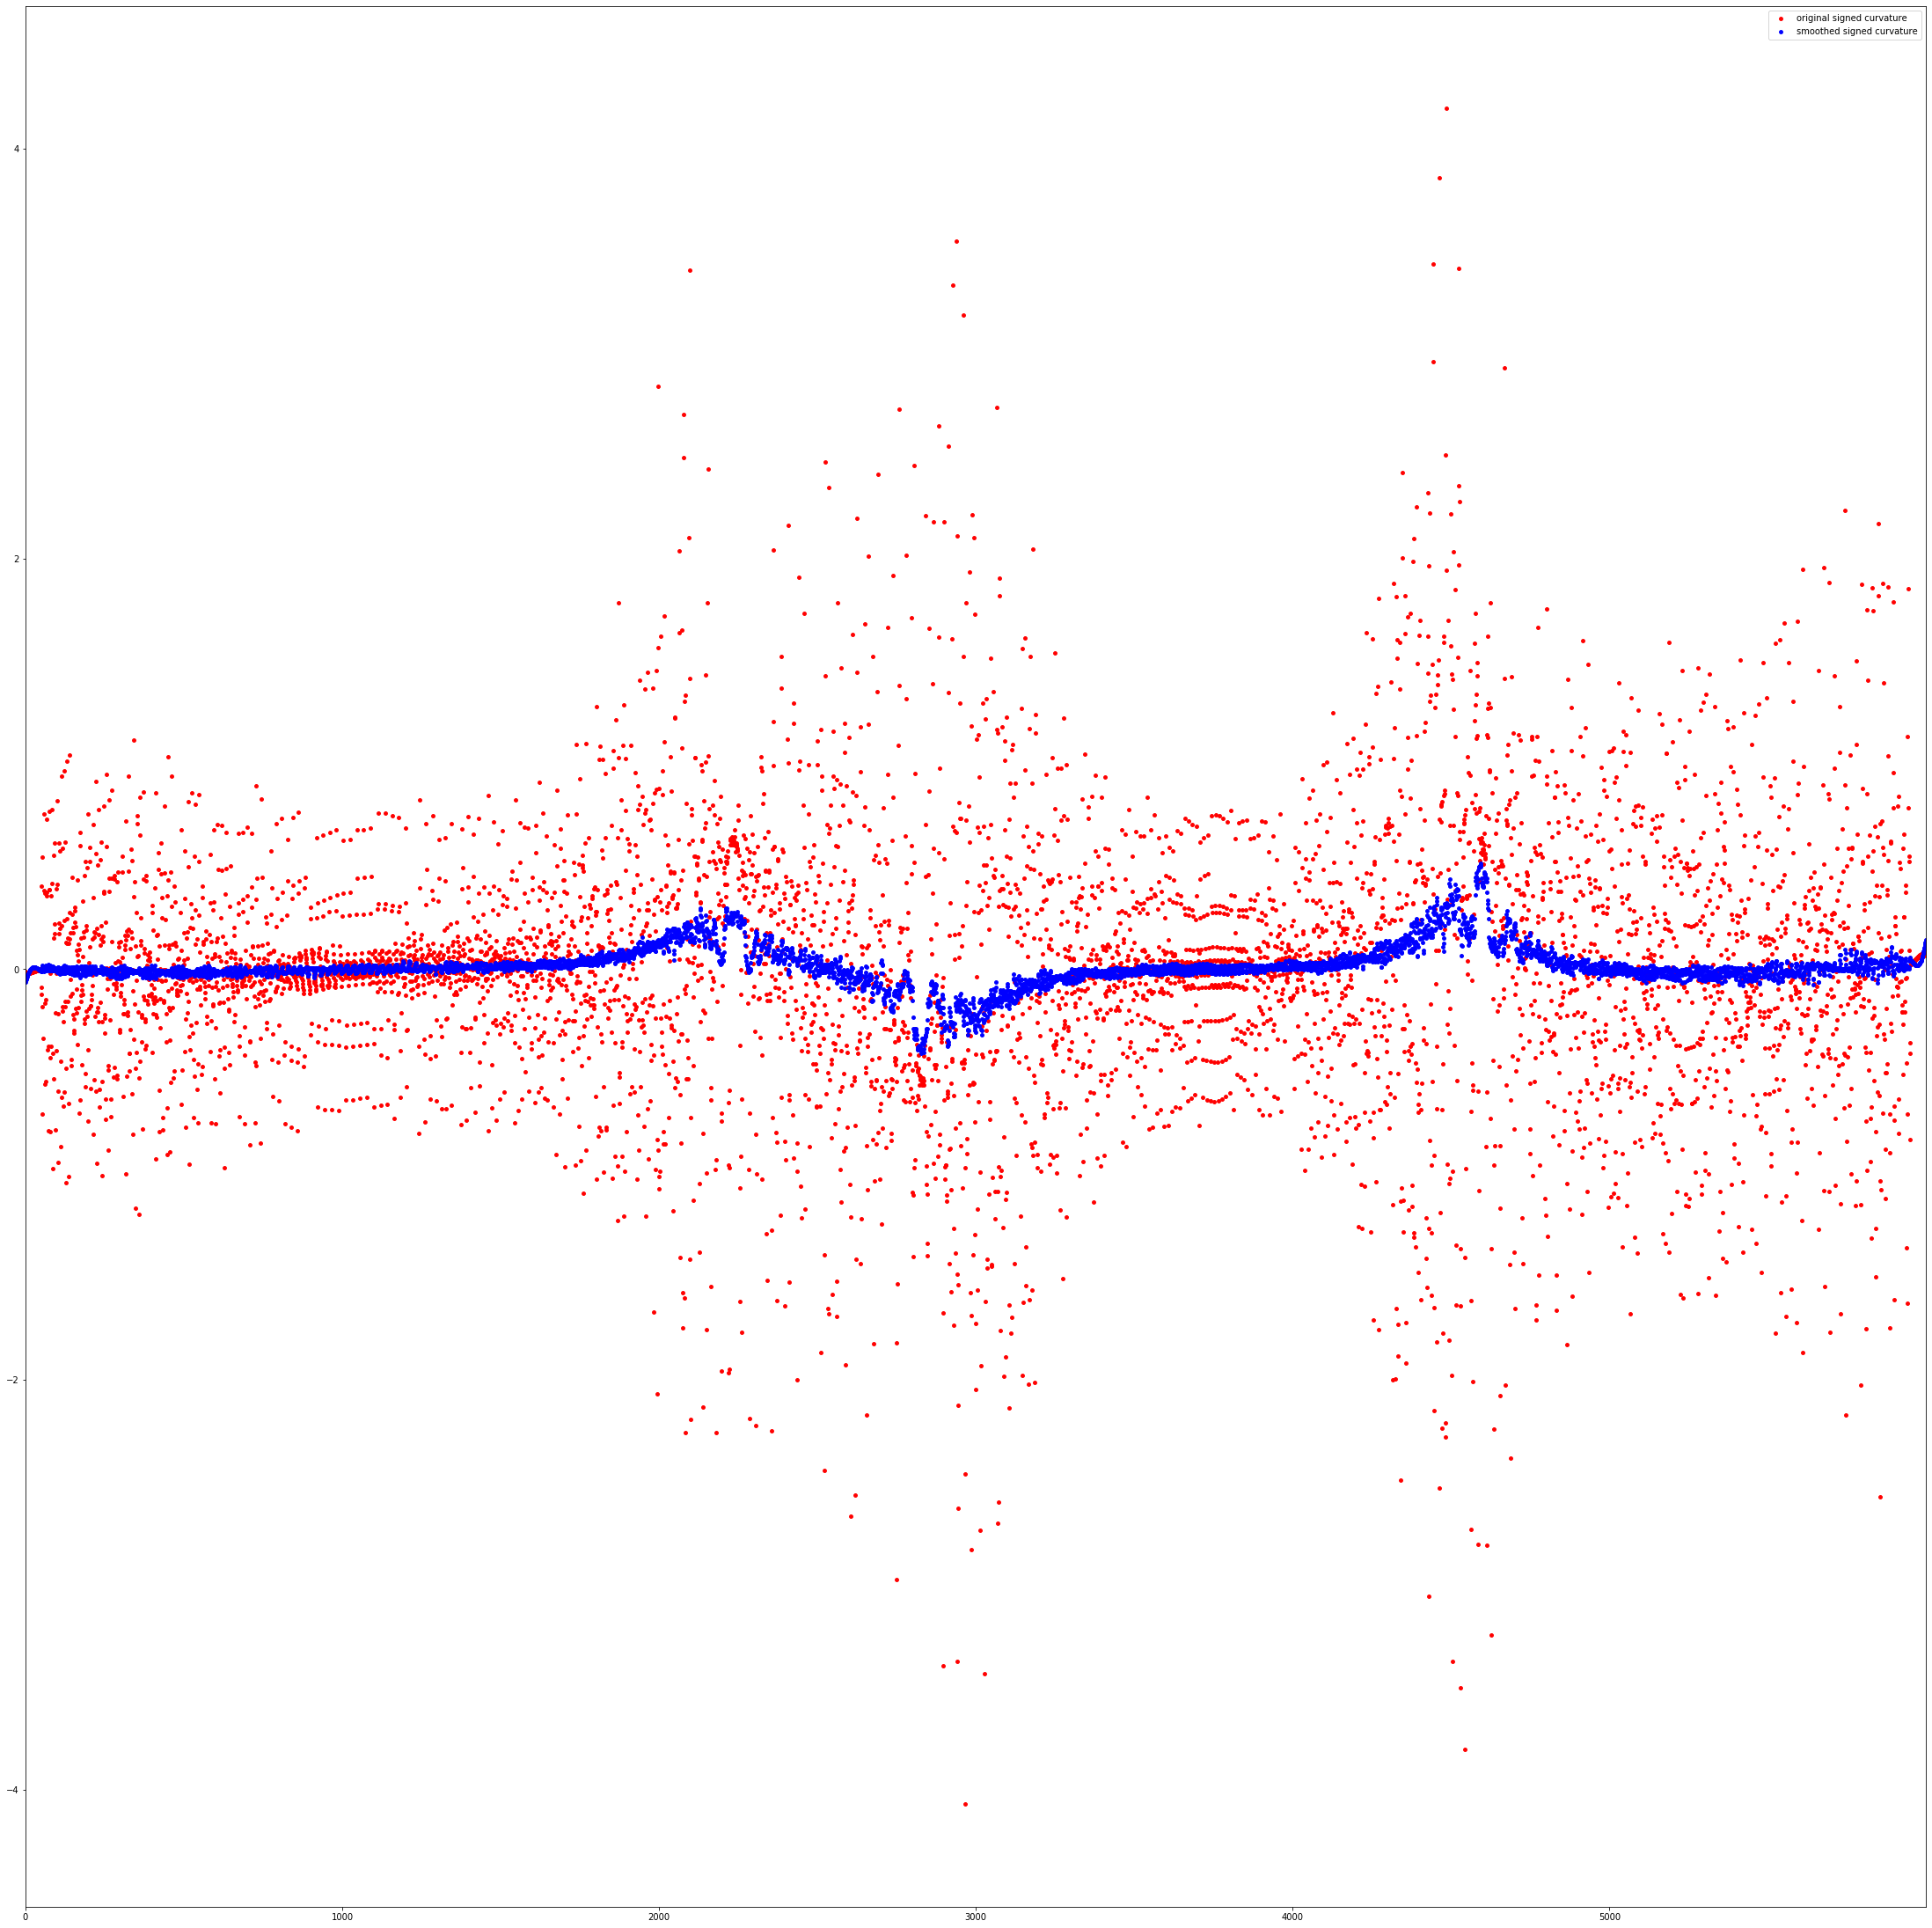

In [26]:
getCurvPlotSmooth(44, 100, zoom = range(6000))

LOG: Extracting coordinates for Animal CRV_20_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_20_TEST_00...
LOG: Extracting coordinates for Animal CRV_20_TEST_01...
LOG: Extracting coordinates for Animal CRV_20_TEST_02...
LOG: Extracting coordinates for Animal CRV_20_TEST_03...
LOG: Extracting coordinates for Animal CRV_20_TEST_04...
LOG: Extracting coordinates for Animal CRV_20_TEST_05...
LOG: Extracting coordinates for Animal CRV_20_TEST_06...
LOG: Extracting coordinates for Animal CRV_20_TEST_07...
LOG: Extracting coordinates for Animal CRV_20_TEST_08...
LOG: Extracting coordinates for Animal CRV_20_TEST_09...
LOG: Extracting coordinates for Animal CRV_20_TEST_10...
LOG: Extracting coordinates for Animal CRV_20_TEST_11...
LOG: Extracting coordinates for Animal CRV_20_TEST_12...
LOG: Extracting coordinates for Animal CRV_20_TEST_13...
LOG: Extracting coordinates for Animal CRV_20_TEST_14...
LOG: Extracting coordinates for Animal CRV_20_TEST_15...
LOG: Extracting coordinates f

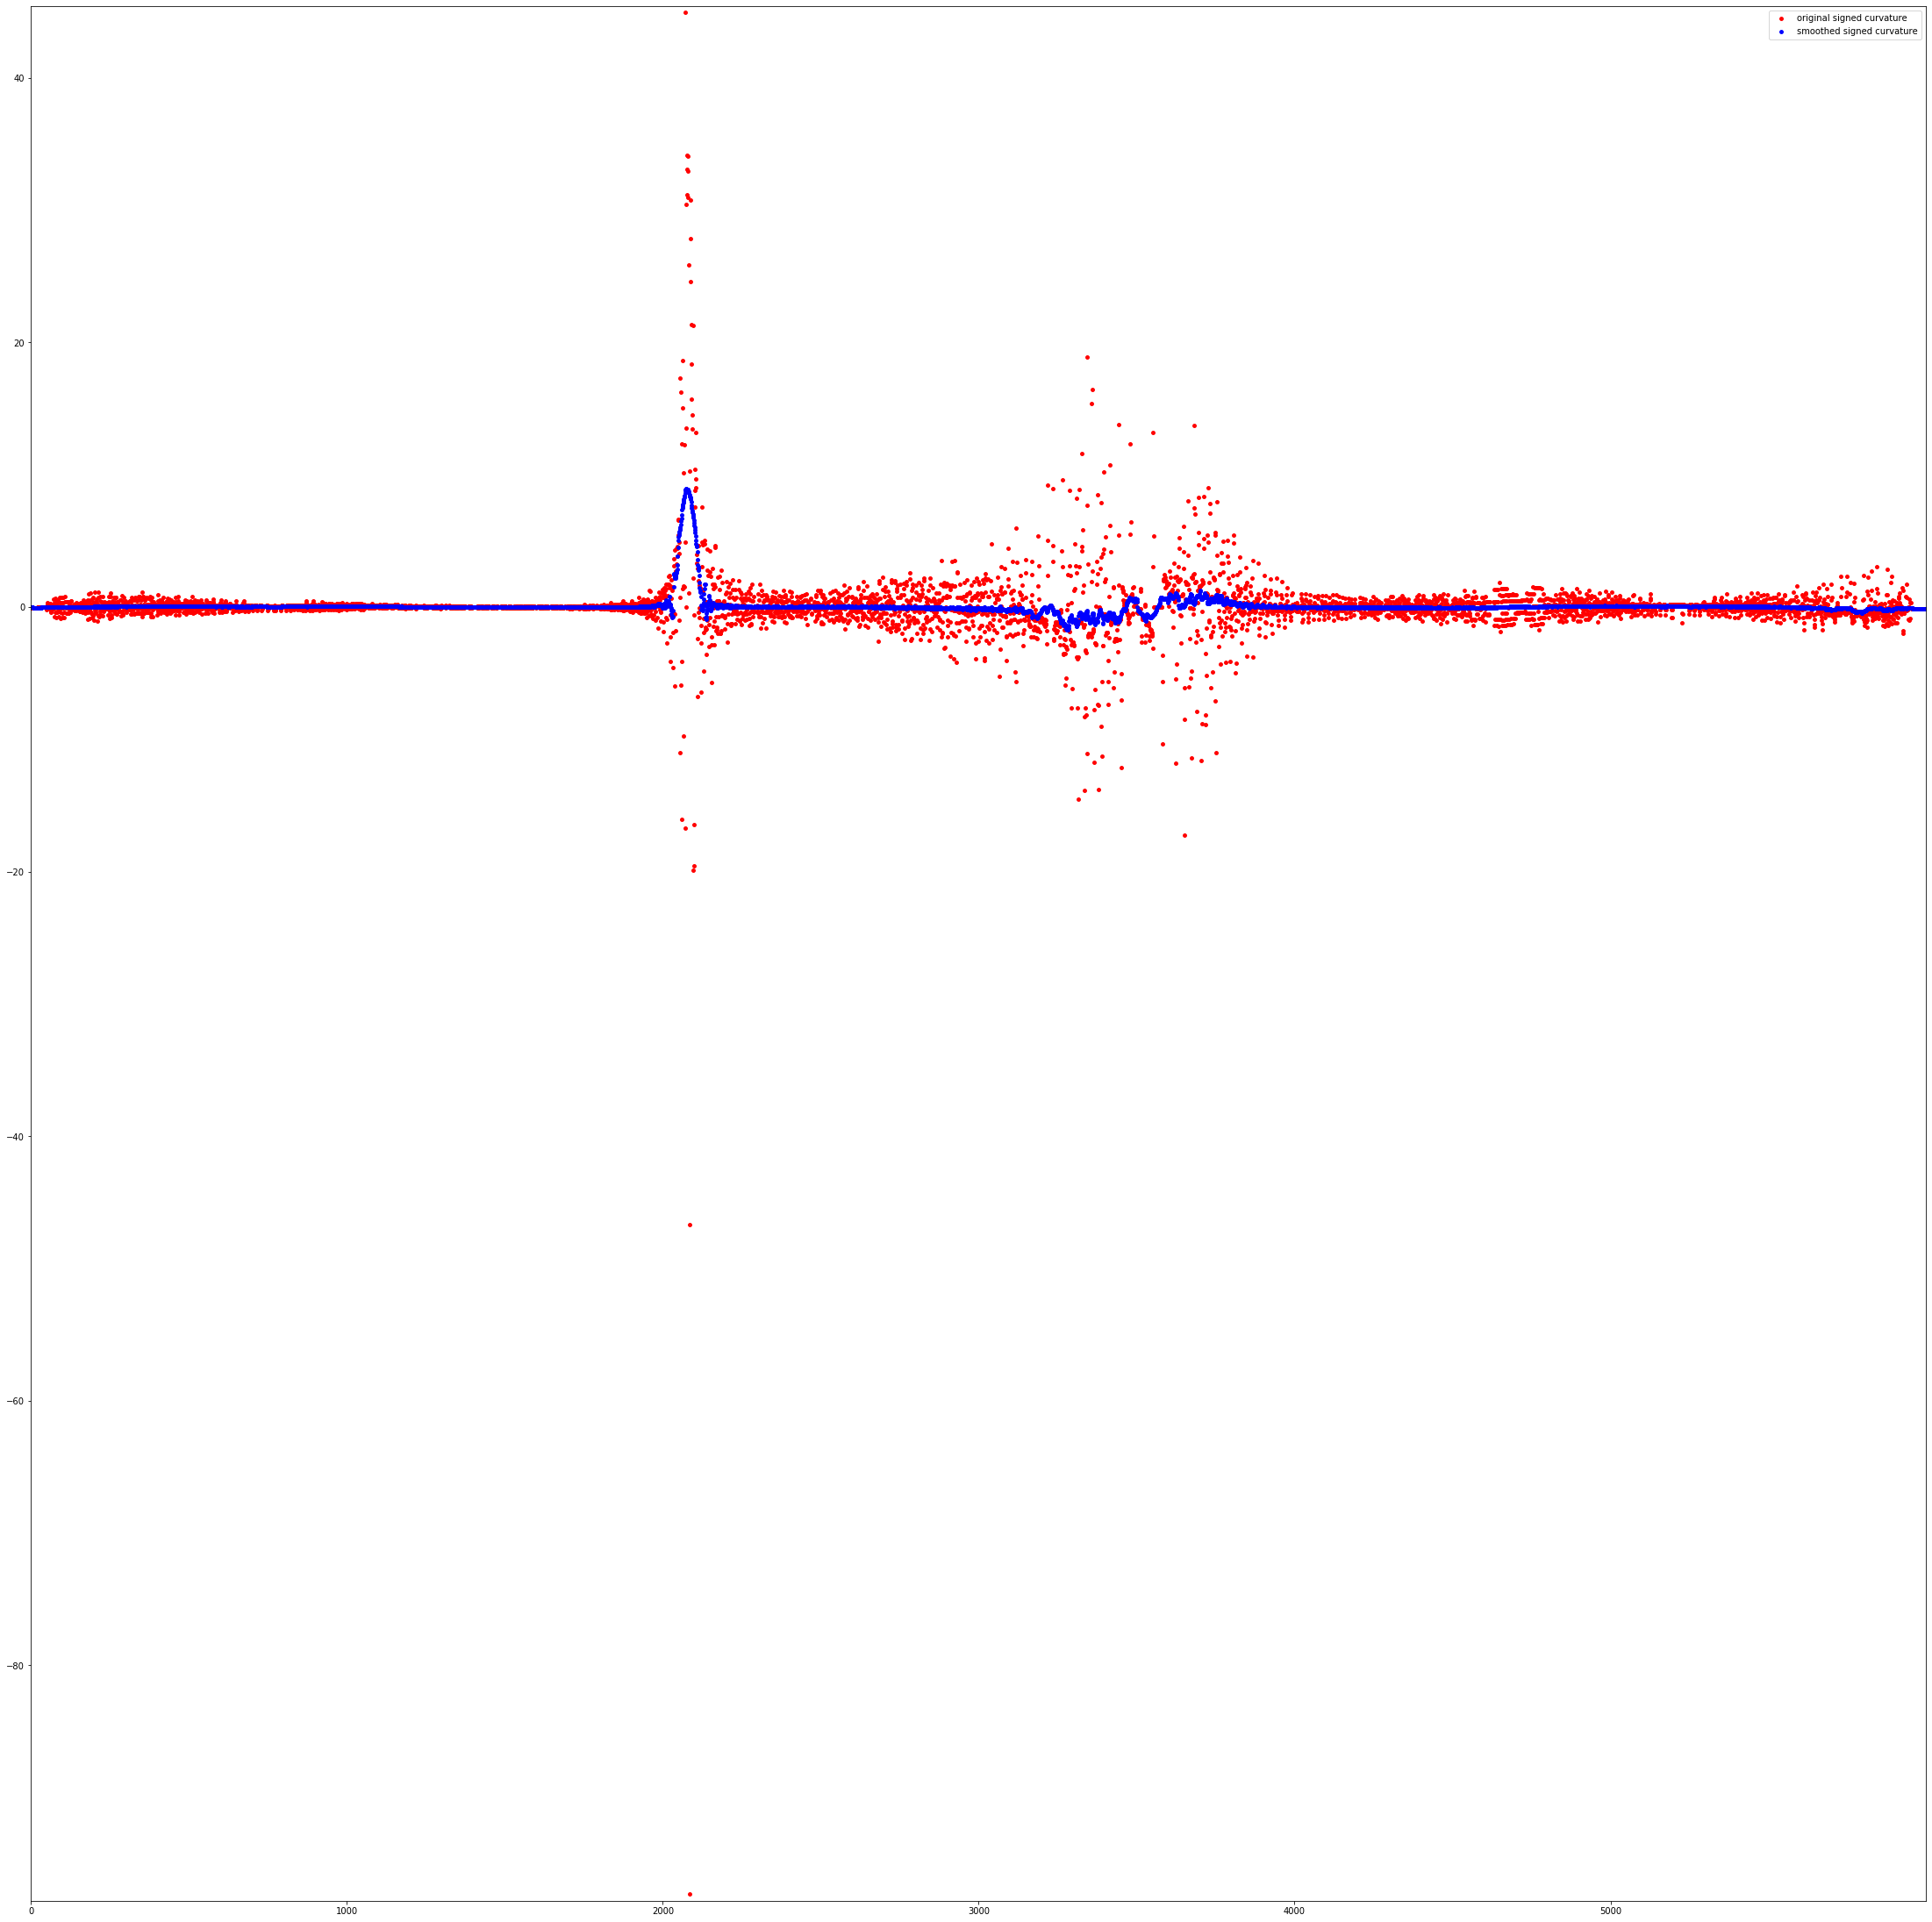

In [28]:
getCurvPlotSmooth(20, 100, zoom = range(6000))

LOG: Extracting coordinates for Animal CRV_20_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_20_TEST_00...
LOG: Extracting coordinates for Animal CRV_20_TEST_01...
LOG: Extracting coordinates for Animal CRV_20_TEST_02...
LOG: Extracting coordinates for Animal CRV_20_TEST_03...
LOG: Extracting coordinates for Animal CRV_20_TEST_04...
LOG: Extracting coordinates for Animal CRV_20_TEST_05...
LOG: Extracting coordinates for Animal CRV_20_TEST_06...
LOG: Extracting coordinates for Animal CRV_20_TEST_07...
LOG: Extracting coordinates for Animal CRV_20_TEST_08...
LOG: Extracting coordinates for Animal CRV_20_TEST_09...
LOG: Extracting coordinates for Animal CRV_20_TEST_10...
LOG: Extracting coordinates for Animal CRV_20_TEST_11...
LOG: Extracting coordinates for Animal CRV_20_TEST_12...
LOG: Extracting coordinates for Animal CRV_20_TEST_13...
LOG: Extracting coordinates for Animal CRV_20_TEST_14...
LOG: Extracting coordinates for Animal CRV_20_TEST_15...
LOG: Extracting coordinates f

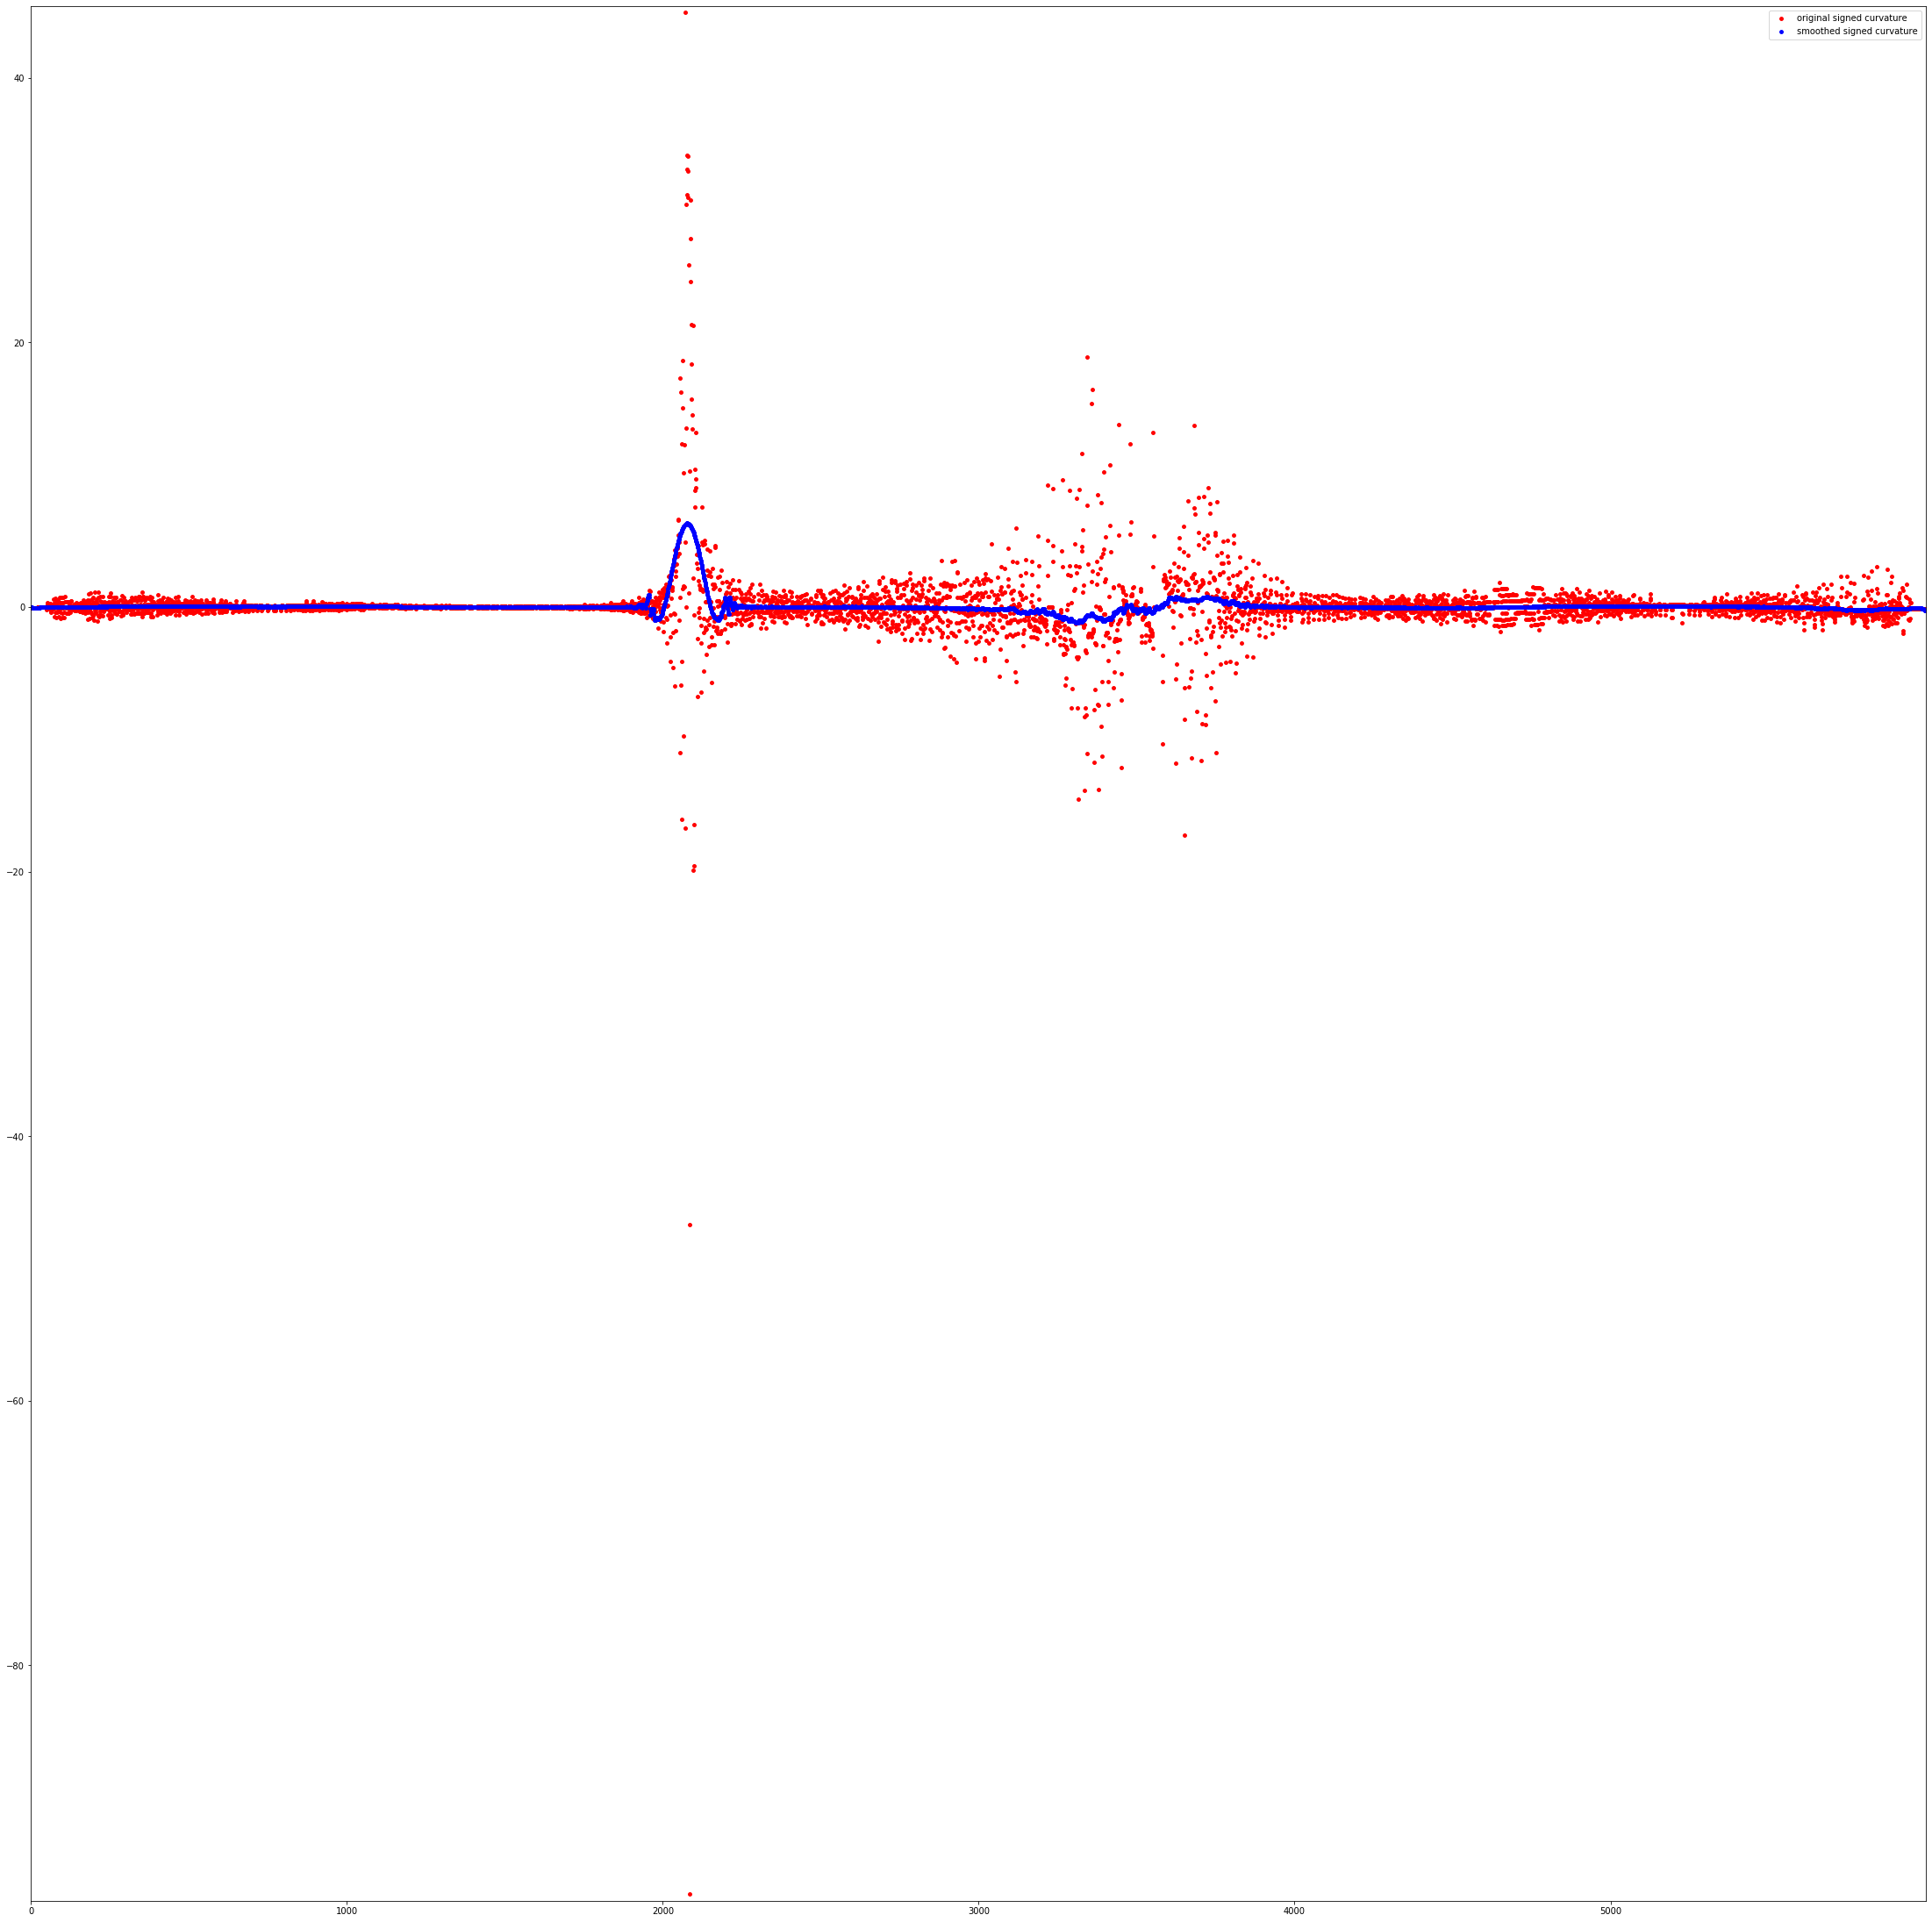

In [29]:
getCurvPlotSmooth(20, 100, 2.5, 5, range(6000))

LOG: Extracting coordinates for Animal CRV_30_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_30_TEST_00...
LOG: Extracting coordinates for Animal CRV_30_TEST_01...
LOG: Extracting coordinates for Animal CRV_30_TEST_02...
LOG: Extracting coordinates for Animal CRV_30_TEST_03...
LOG: Extracting coordinates for Animal CRV_30_TEST_04...
LOG: Extracting coordinates for Animal CRV_30_TEST_05...
LOG: Extracting coordinates for Animal CRV_30_TEST_06...
LOG: Extracting coordinates for Animal CRV_30_TEST_07...
LOG: Extracting coordinates for Animal CRV_30_TEST_08...
LOG: Extracting coordinates for Animal CRV_30_TEST_09...
LOG: Extracting coordinates for Animal CRV_30_TEST_10...
LOG: Extracting coordinates for Animal CRV_30_TEST_11...
LOG: Extracting coordinates for Animal CRV_30_TEST_12...
LOG: Extracting coordinates for Animal CRV_30_TEST_13...
LOG: Extracting coordinates for Animal CRV_30_TEST_14...
LOG: Extracting coordinates for Animal CRV_30_TEST_15...
LOG: Extracting coordinates f

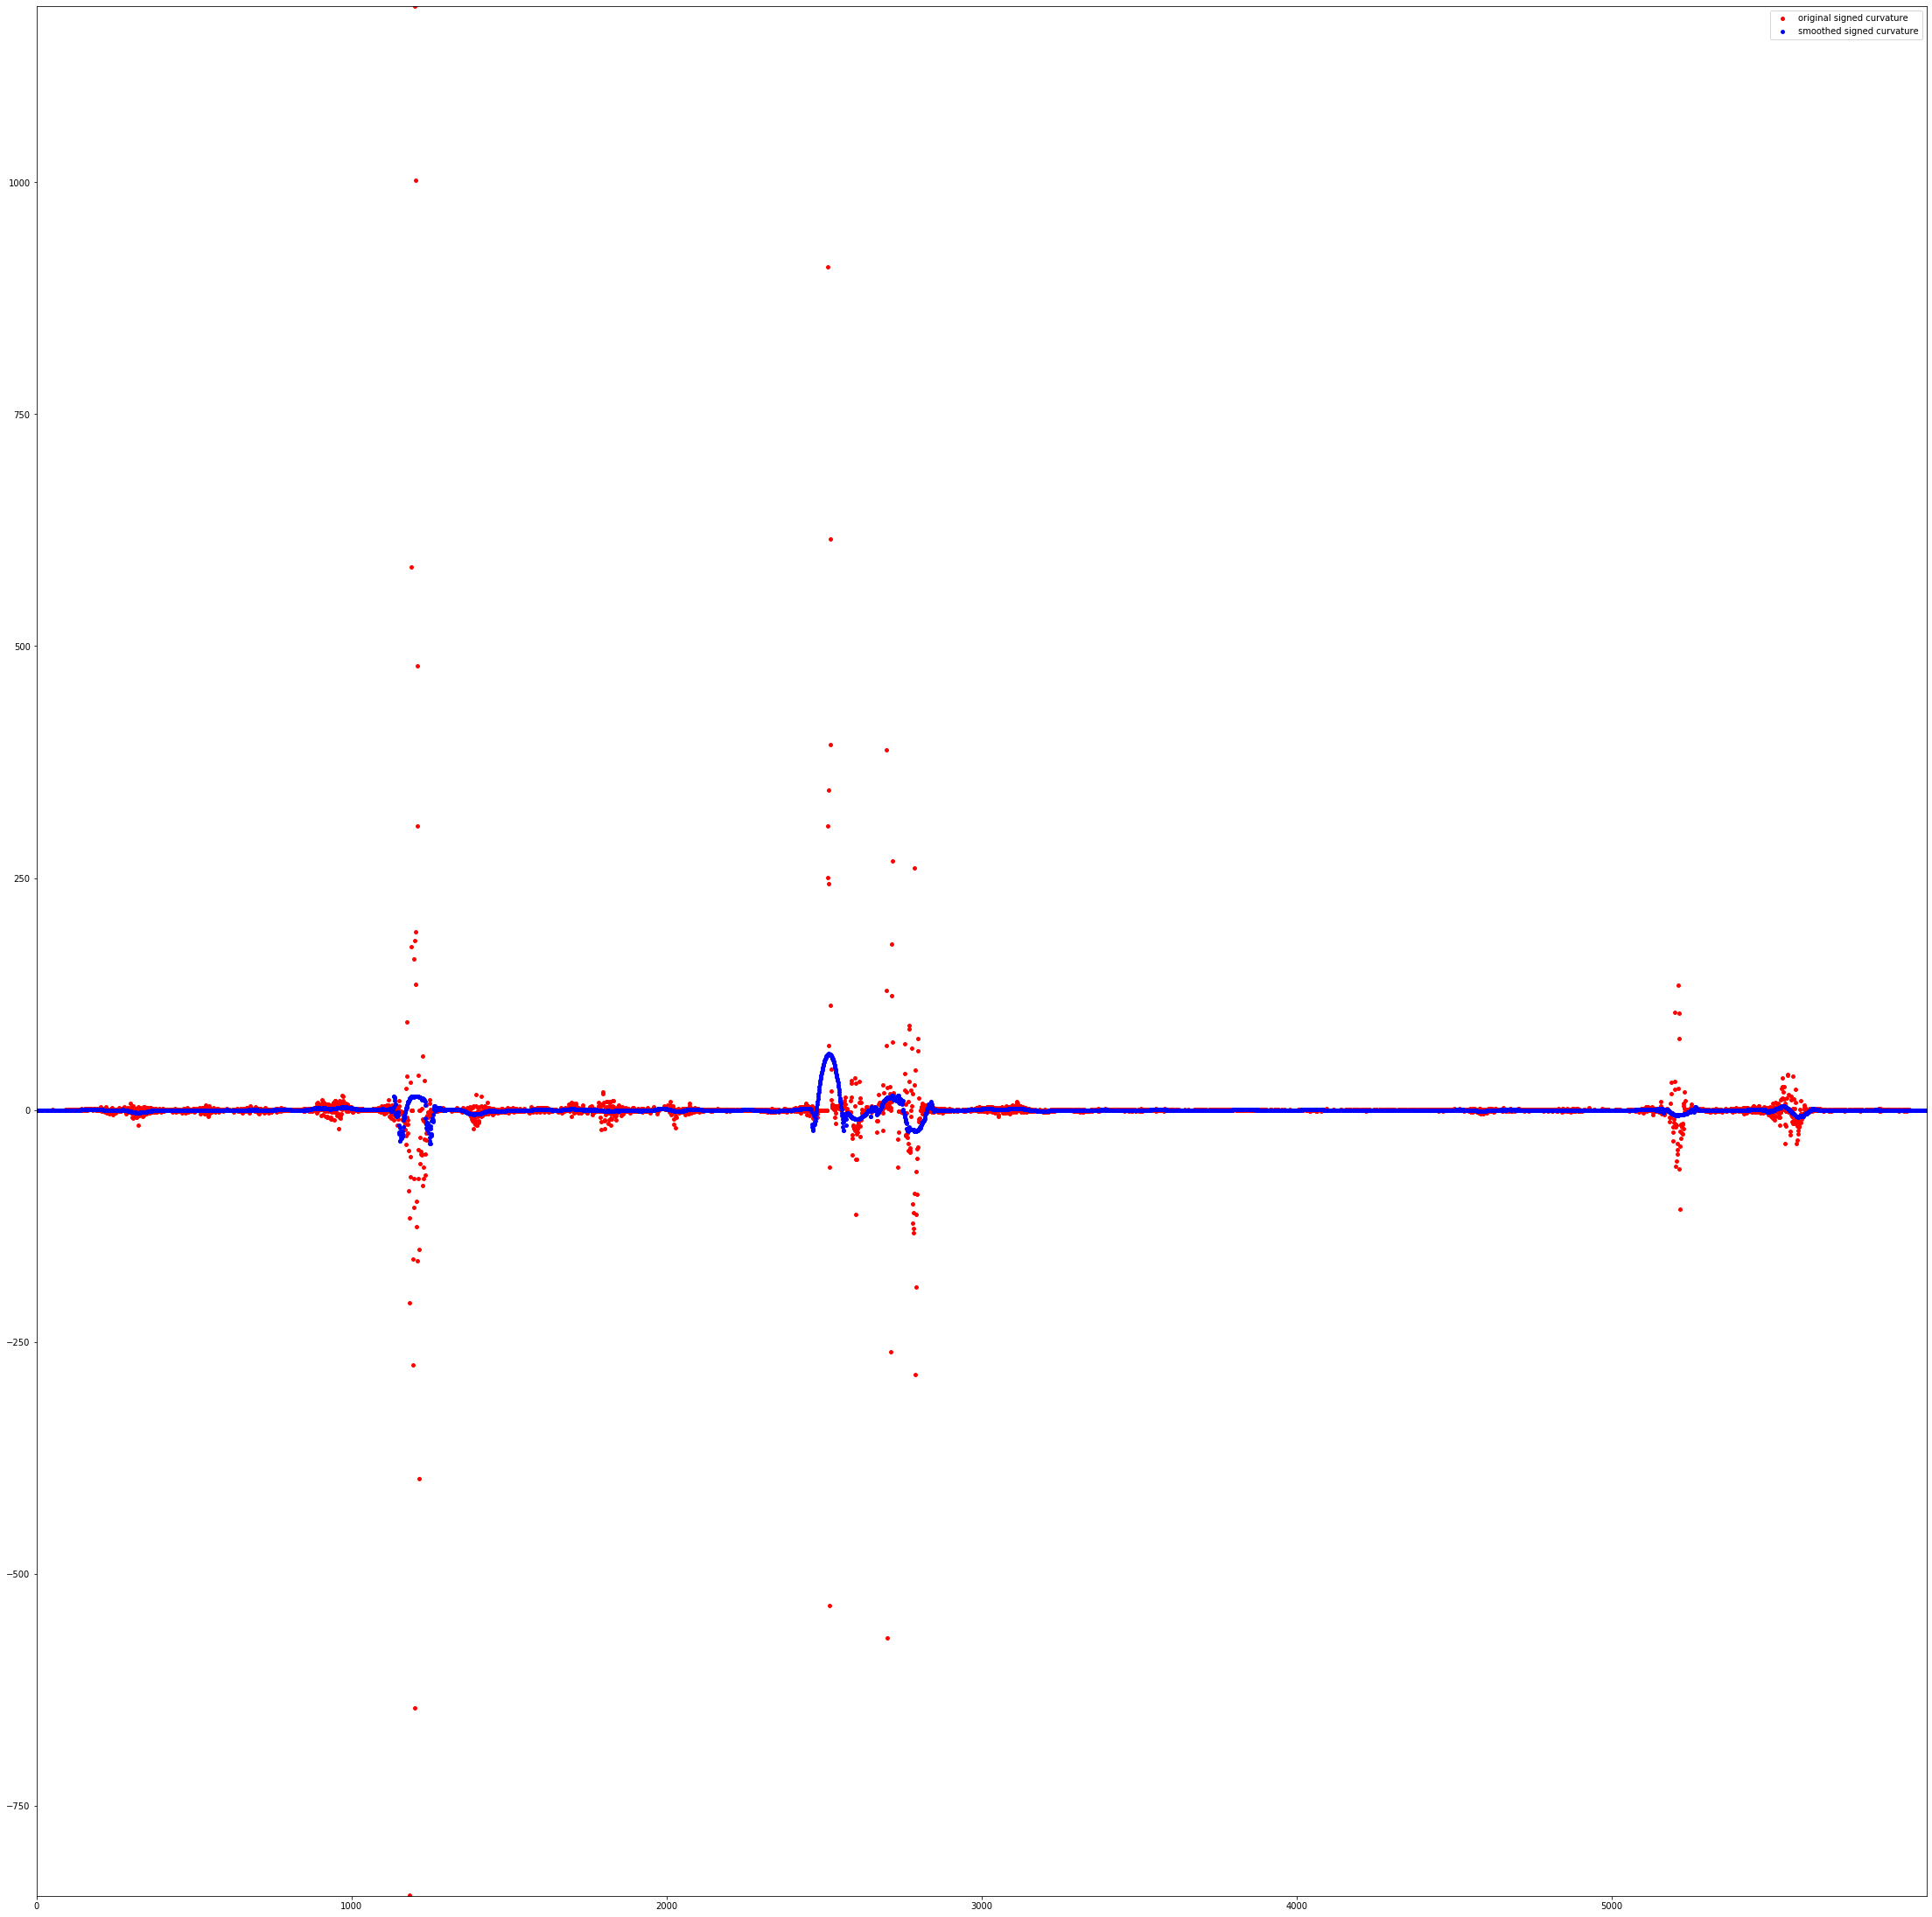

LOG: Extracting coordinates for Animal CRV_30_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_30_TEST_00...
LOG: Extracting coordinates for Animal CRV_30_TEST_01...
LOG: Extracting coordinates for Animal CRV_30_TEST_02...
LOG: Extracting coordinates for Animal CRV_30_TEST_03...
LOG: Extracting coordinates for Animal CRV_30_TEST_04...
LOG: Extracting coordinates for Animal CRV_30_TEST_05...
LOG: Extracting coordinates for Animal CRV_30_TEST_06...
LOG: Extracting coordinates for Animal CRV_30_TEST_07...
LOG: Extracting coordinates for Animal CRV_30_TEST_08...
LOG: Extracting coordinates for Animal CRV_30_TEST_09...
LOG: Extracting coordinates for Animal CRV_30_TEST_10...
LOG: Extracting coordinates for Animal CRV_30_TEST_11...
LOG: Extracting coordinates for Animal CRV_30_TEST_12...
LOG: Extracting coordinates for Animal CRV_30_TEST_13...
LOG: Extracting coordinates for Animal CRV_30_TEST_14...
LOG: Extracting coordinates for Animal CRV_30_TEST_15...
LOG: Extracting coordinates f

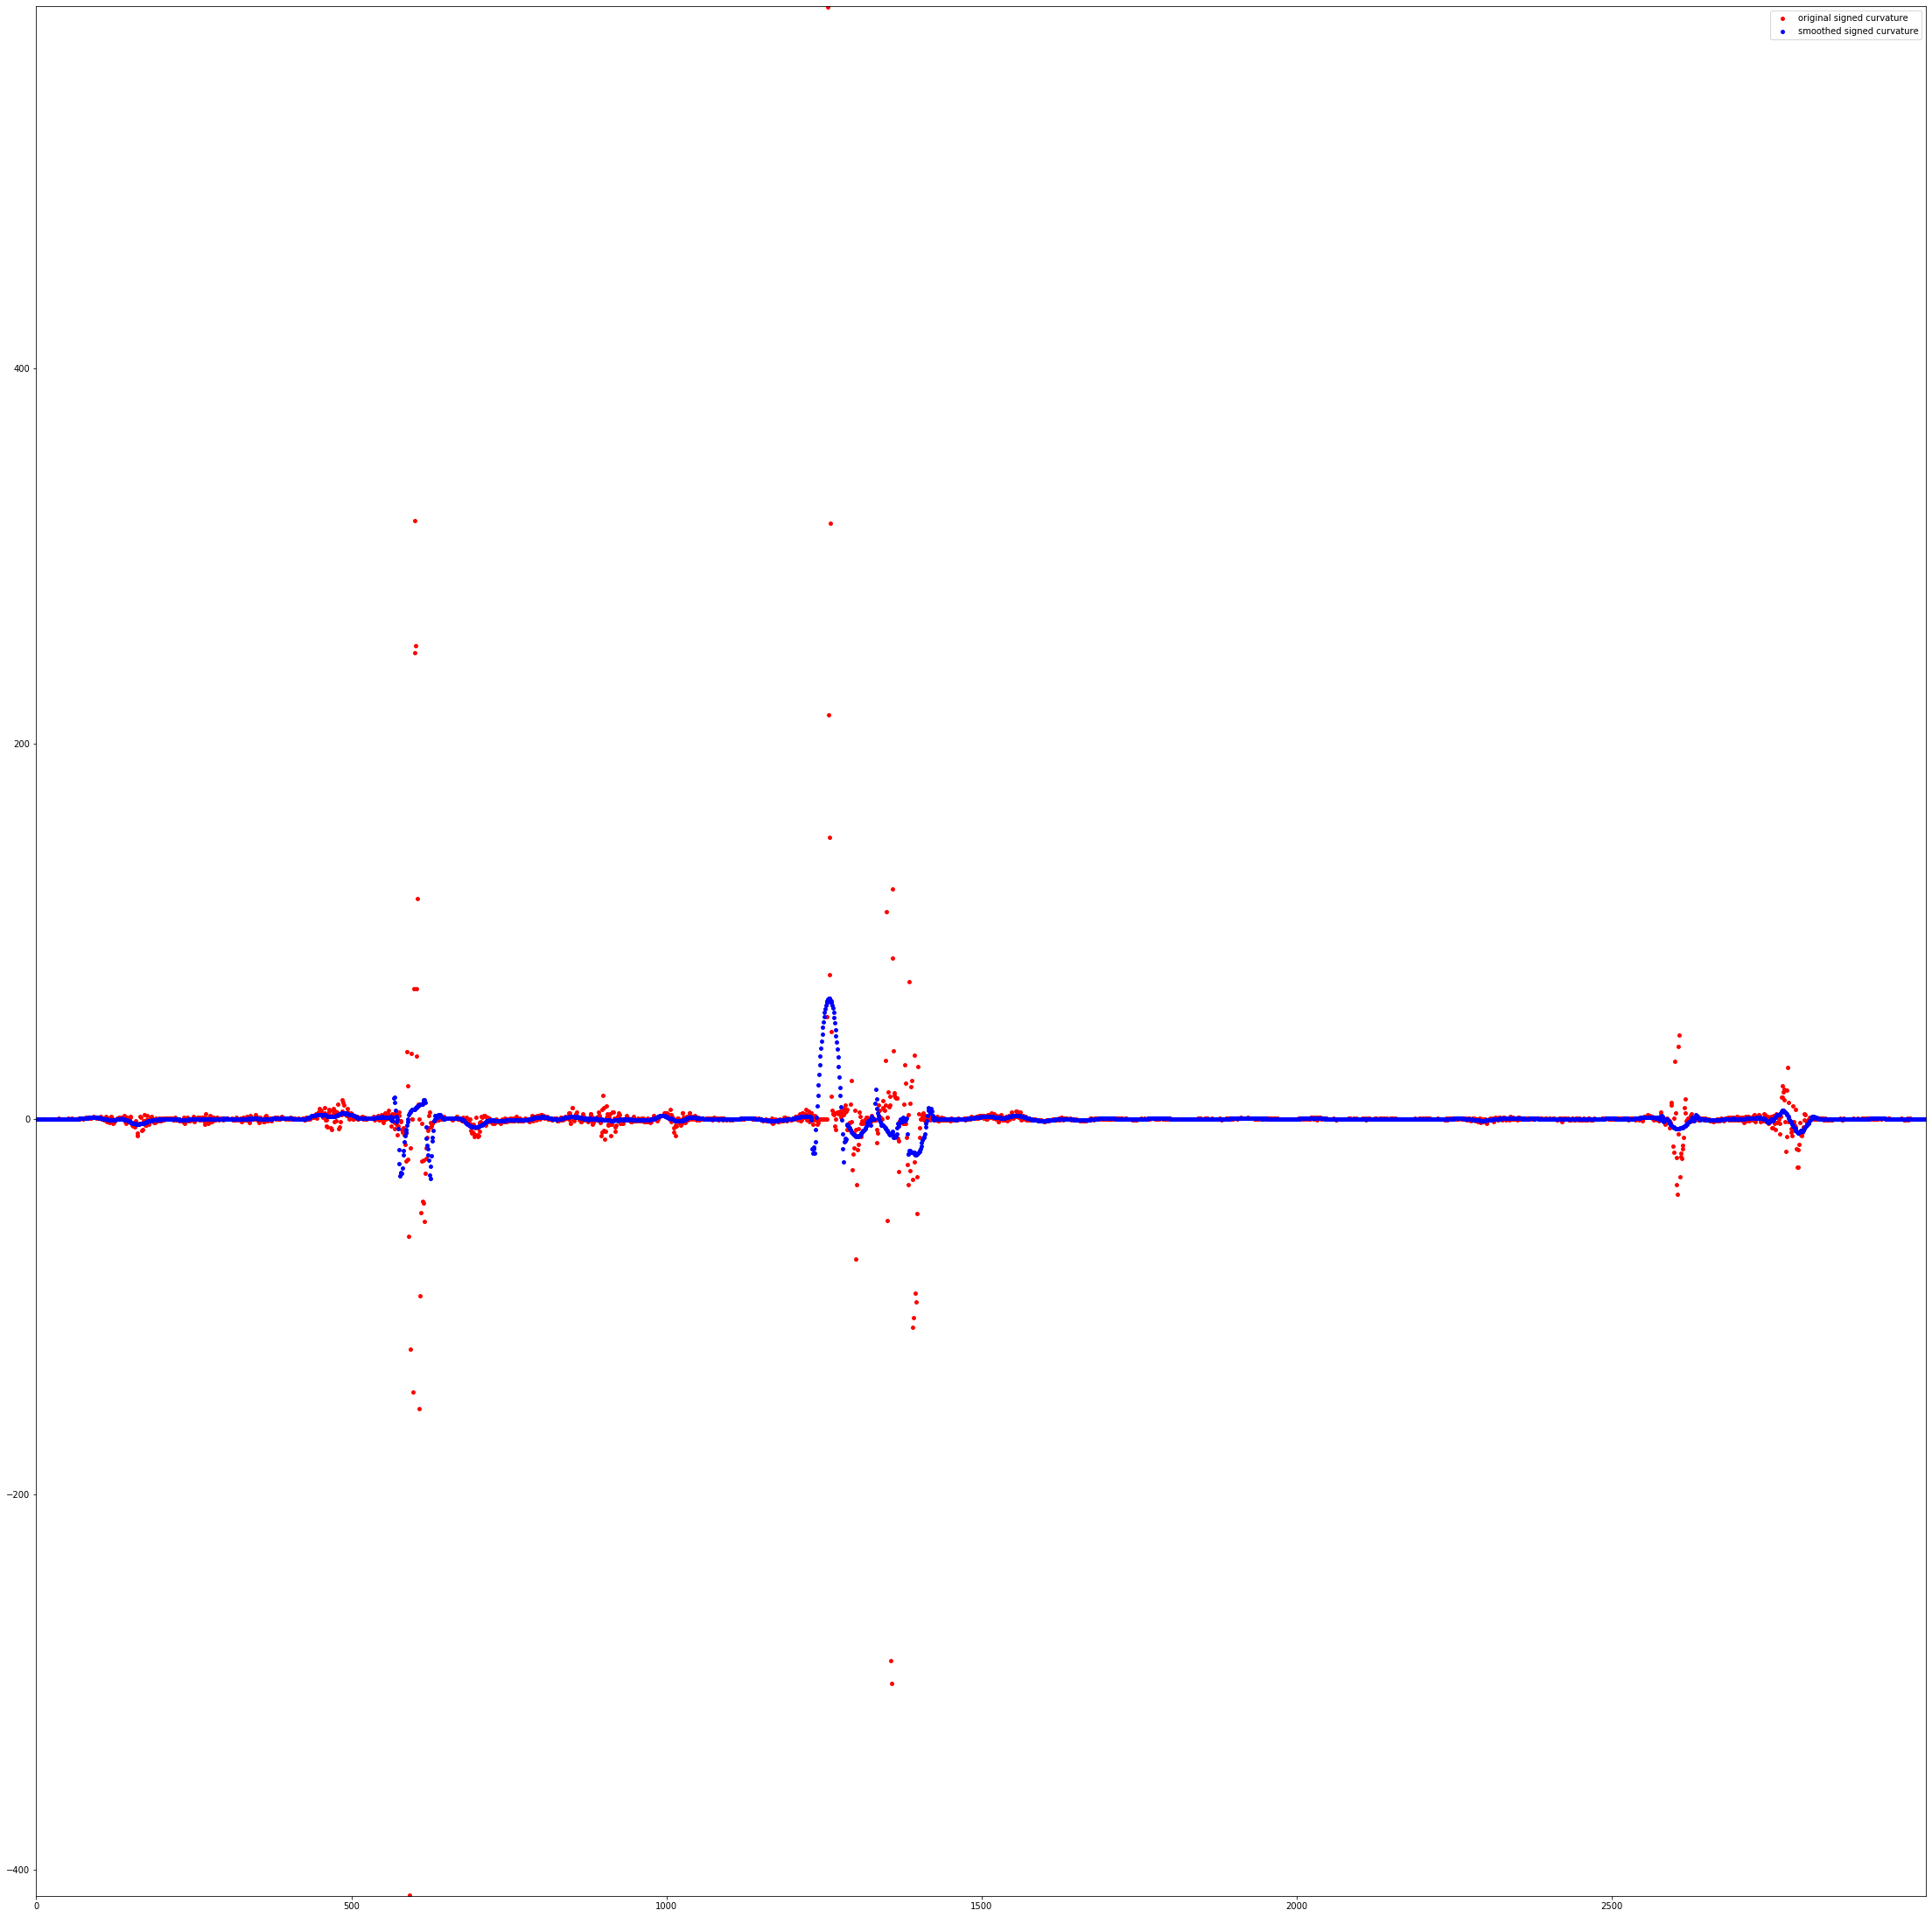

LOG: Extracting coordinates for Animal CRV_30_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_30_TEST_00...
LOG: Extracting coordinates for Animal CRV_30_TEST_01...
LOG: Extracting coordinates for Animal CRV_30_TEST_02...
LOG: Extracting coordinates for Animal CRV_30_TEST_03...
LOG: Extracting coordinates for Animal CRV_30_TEST_04...
LOG: Extracting coordinates for Animal CRV_30_TEST_05...
LOG: Extracting coordinates for Animal CRV_30_TEST_06...
LOG: Extracting coordinates for Animal CRV_30_TEST_07...
LOG: Extracting coordinates for Animal CRV_30_TEST_08...
LOG: Extracting coordinates for Animal CRV_30_TEST_09...
LOG: Extracting coordinates for Animal CRV_30_TEST_10...
LOG: Extracting coordinates for Animal CRV_30_TEST_11...
LOG: Extracting coordinates for Animal CRV_30_TEST_12...
LOG: Extracting coordinates for Animal CRV_30_TEST_13...
LOG: Extracting coordinates for Animal CRV_30_TEST_14...
LOG: Extracting coordinates for Animal CRV_30_TEST_15...
LOG: Extracting coordinates f

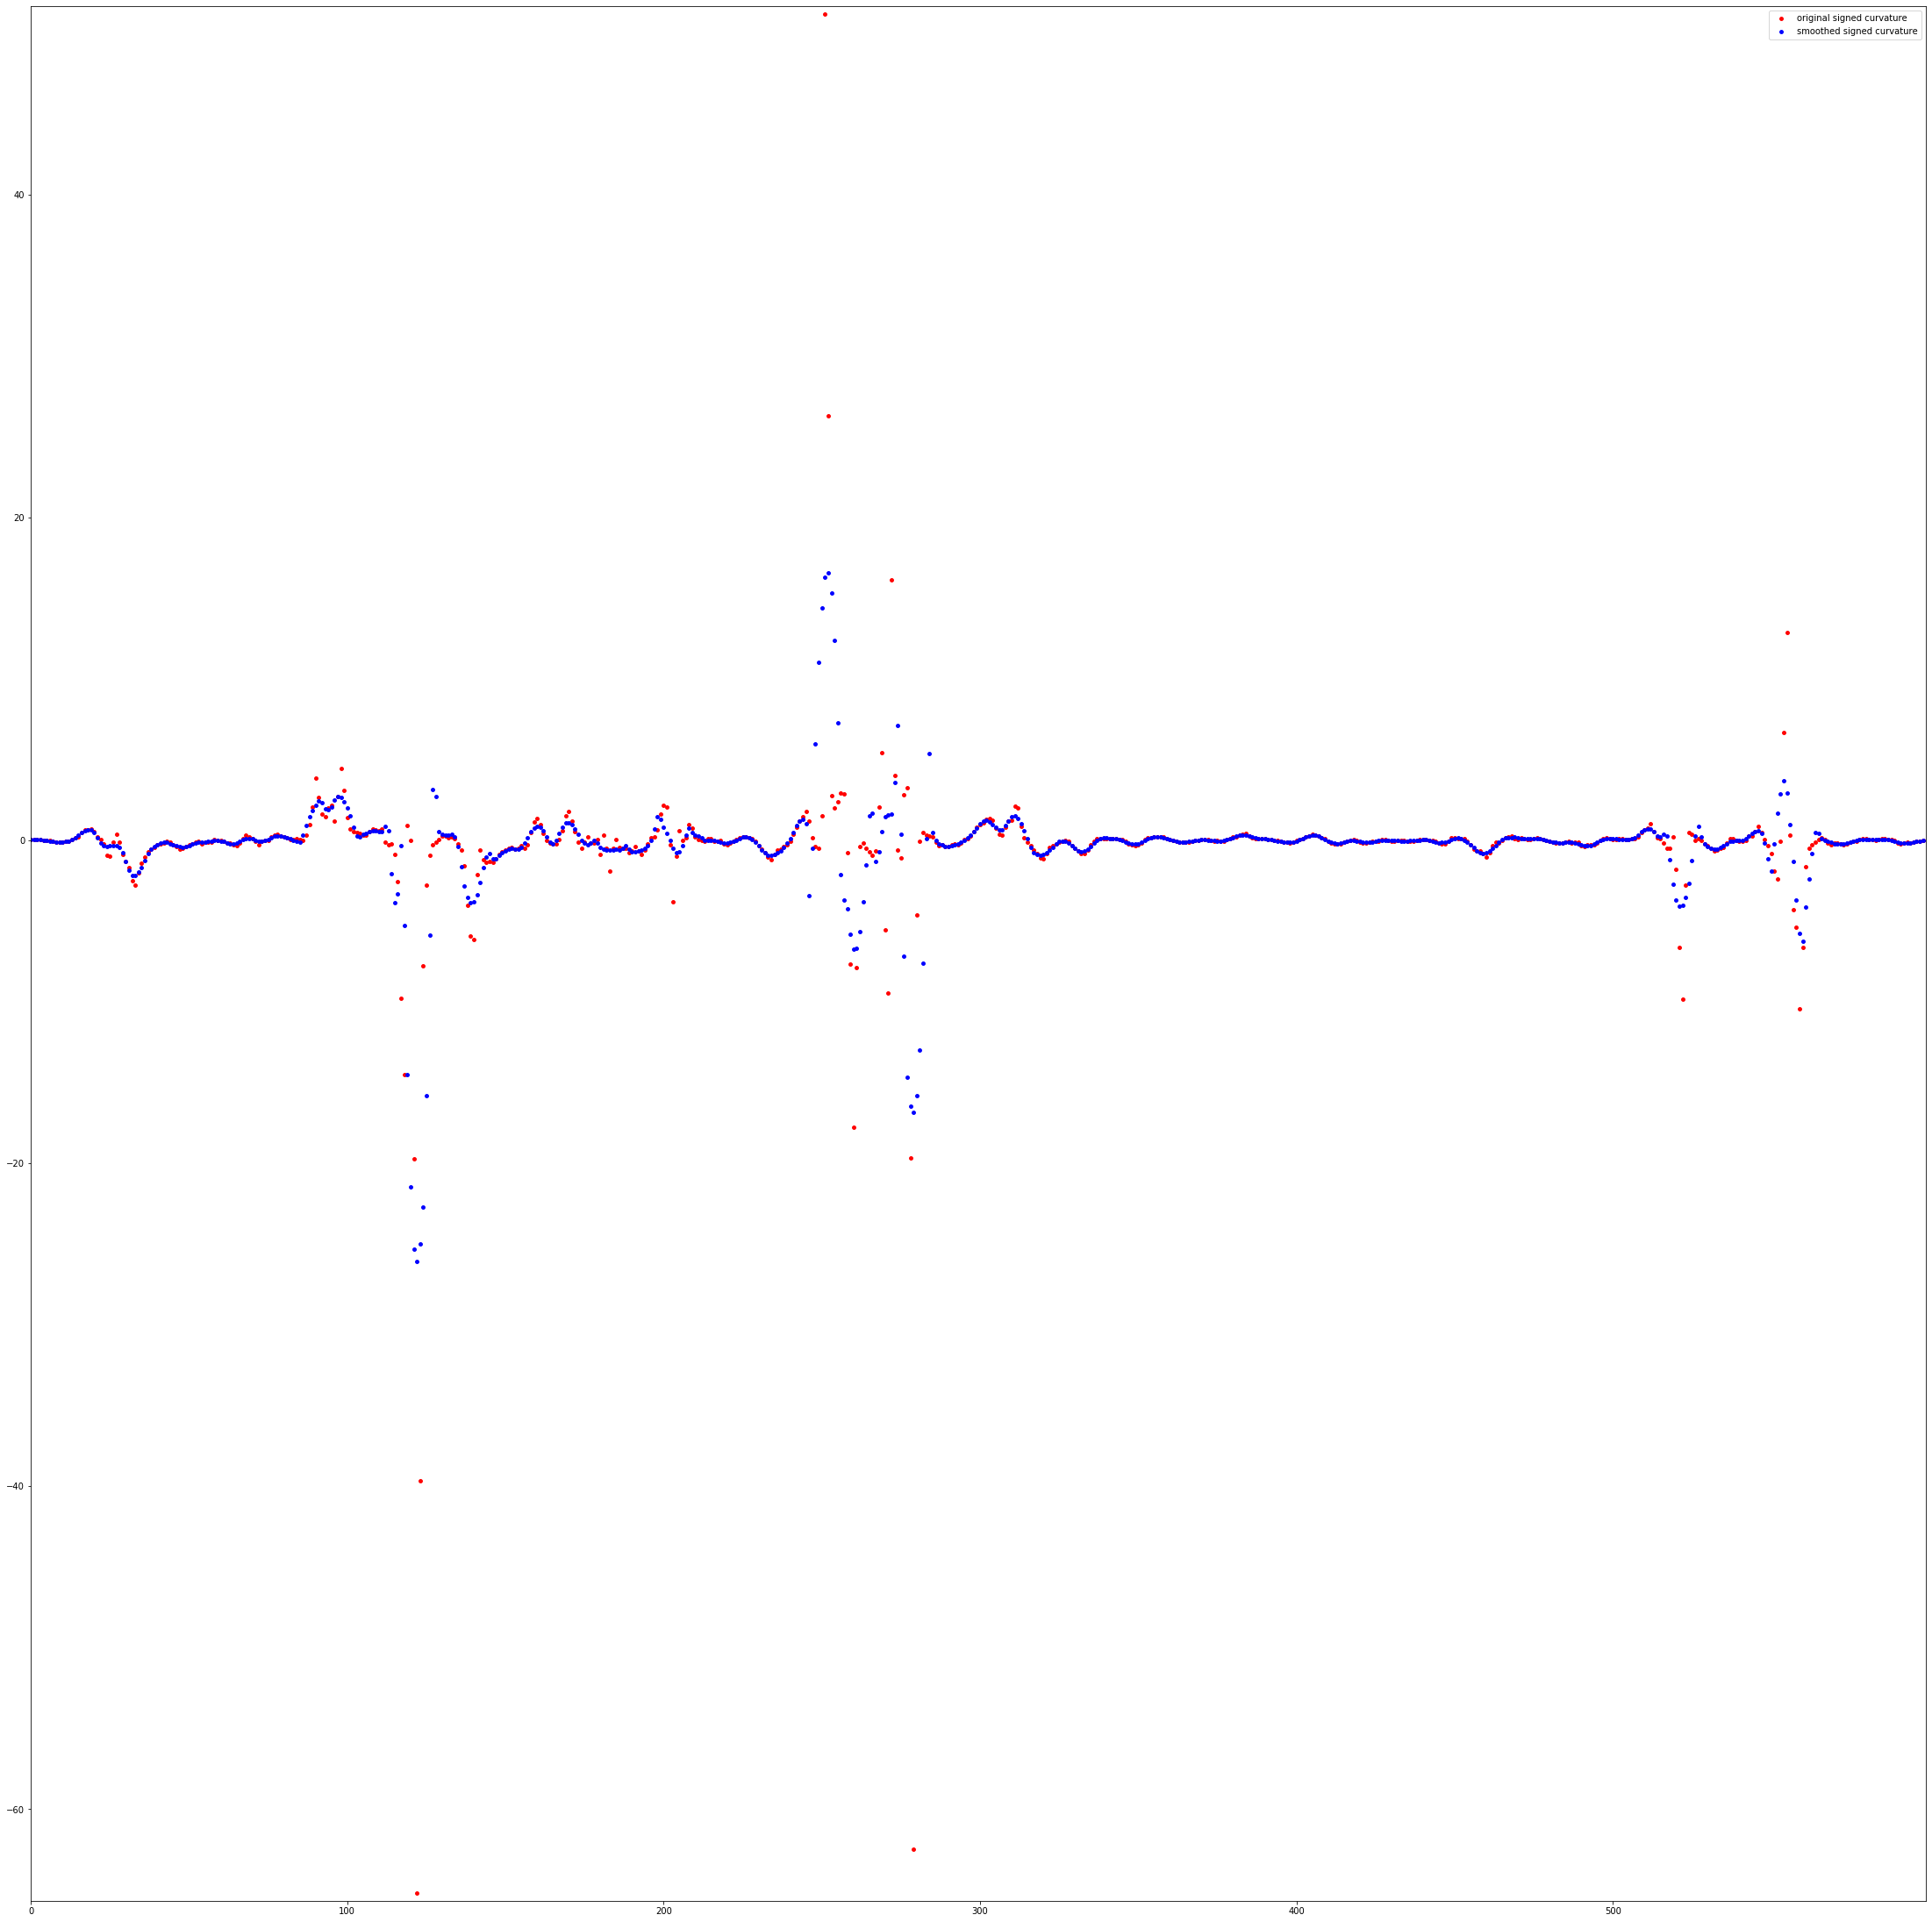

LOG: Extracting coordinates for Animal CRV_30_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_30_TEST_00...
LOG: Extracting coordinates for Animal CRV_30_TEST_01...
LOG: Extracting coordinates for Animal CRV_30_TEST_02...
LOG: Extracting coordinates for Animal CRV_30_TEST_03...
LOG: Extracting coordinates for Animal CRV_30_TEST_04...
LOG: Extracting coordinates for Animal CRV_30_TEST_05...
LOG: Extracting coordinates for Animal CRV_30_TEST_06...
LOG: Extracting coordinates for Animal CRV_30_TEST_07...
LOG: Extracting coordinates for Animal CRV_30_TEST_08...
LOG: Extracting coordinates for Animal CRV_30_TEST_09...
LOG: Extracting coordinates for Animal CRV_30_TEST_10...
LOG: Extracting coordinates for Animal CRV_30_TEST_11...
LOG: Extracting coordinates for Animal CRV_30_TEST_12...
LOG: Extracting coordinates for Animal CRV_30_TEST_13...
LOG: Extracting coordinates for Animal CRV_30_TEST_14...
LOG: Extracting coordinates for Animal CRV_30_TEST_15...
LOG: Extracting coordinates f

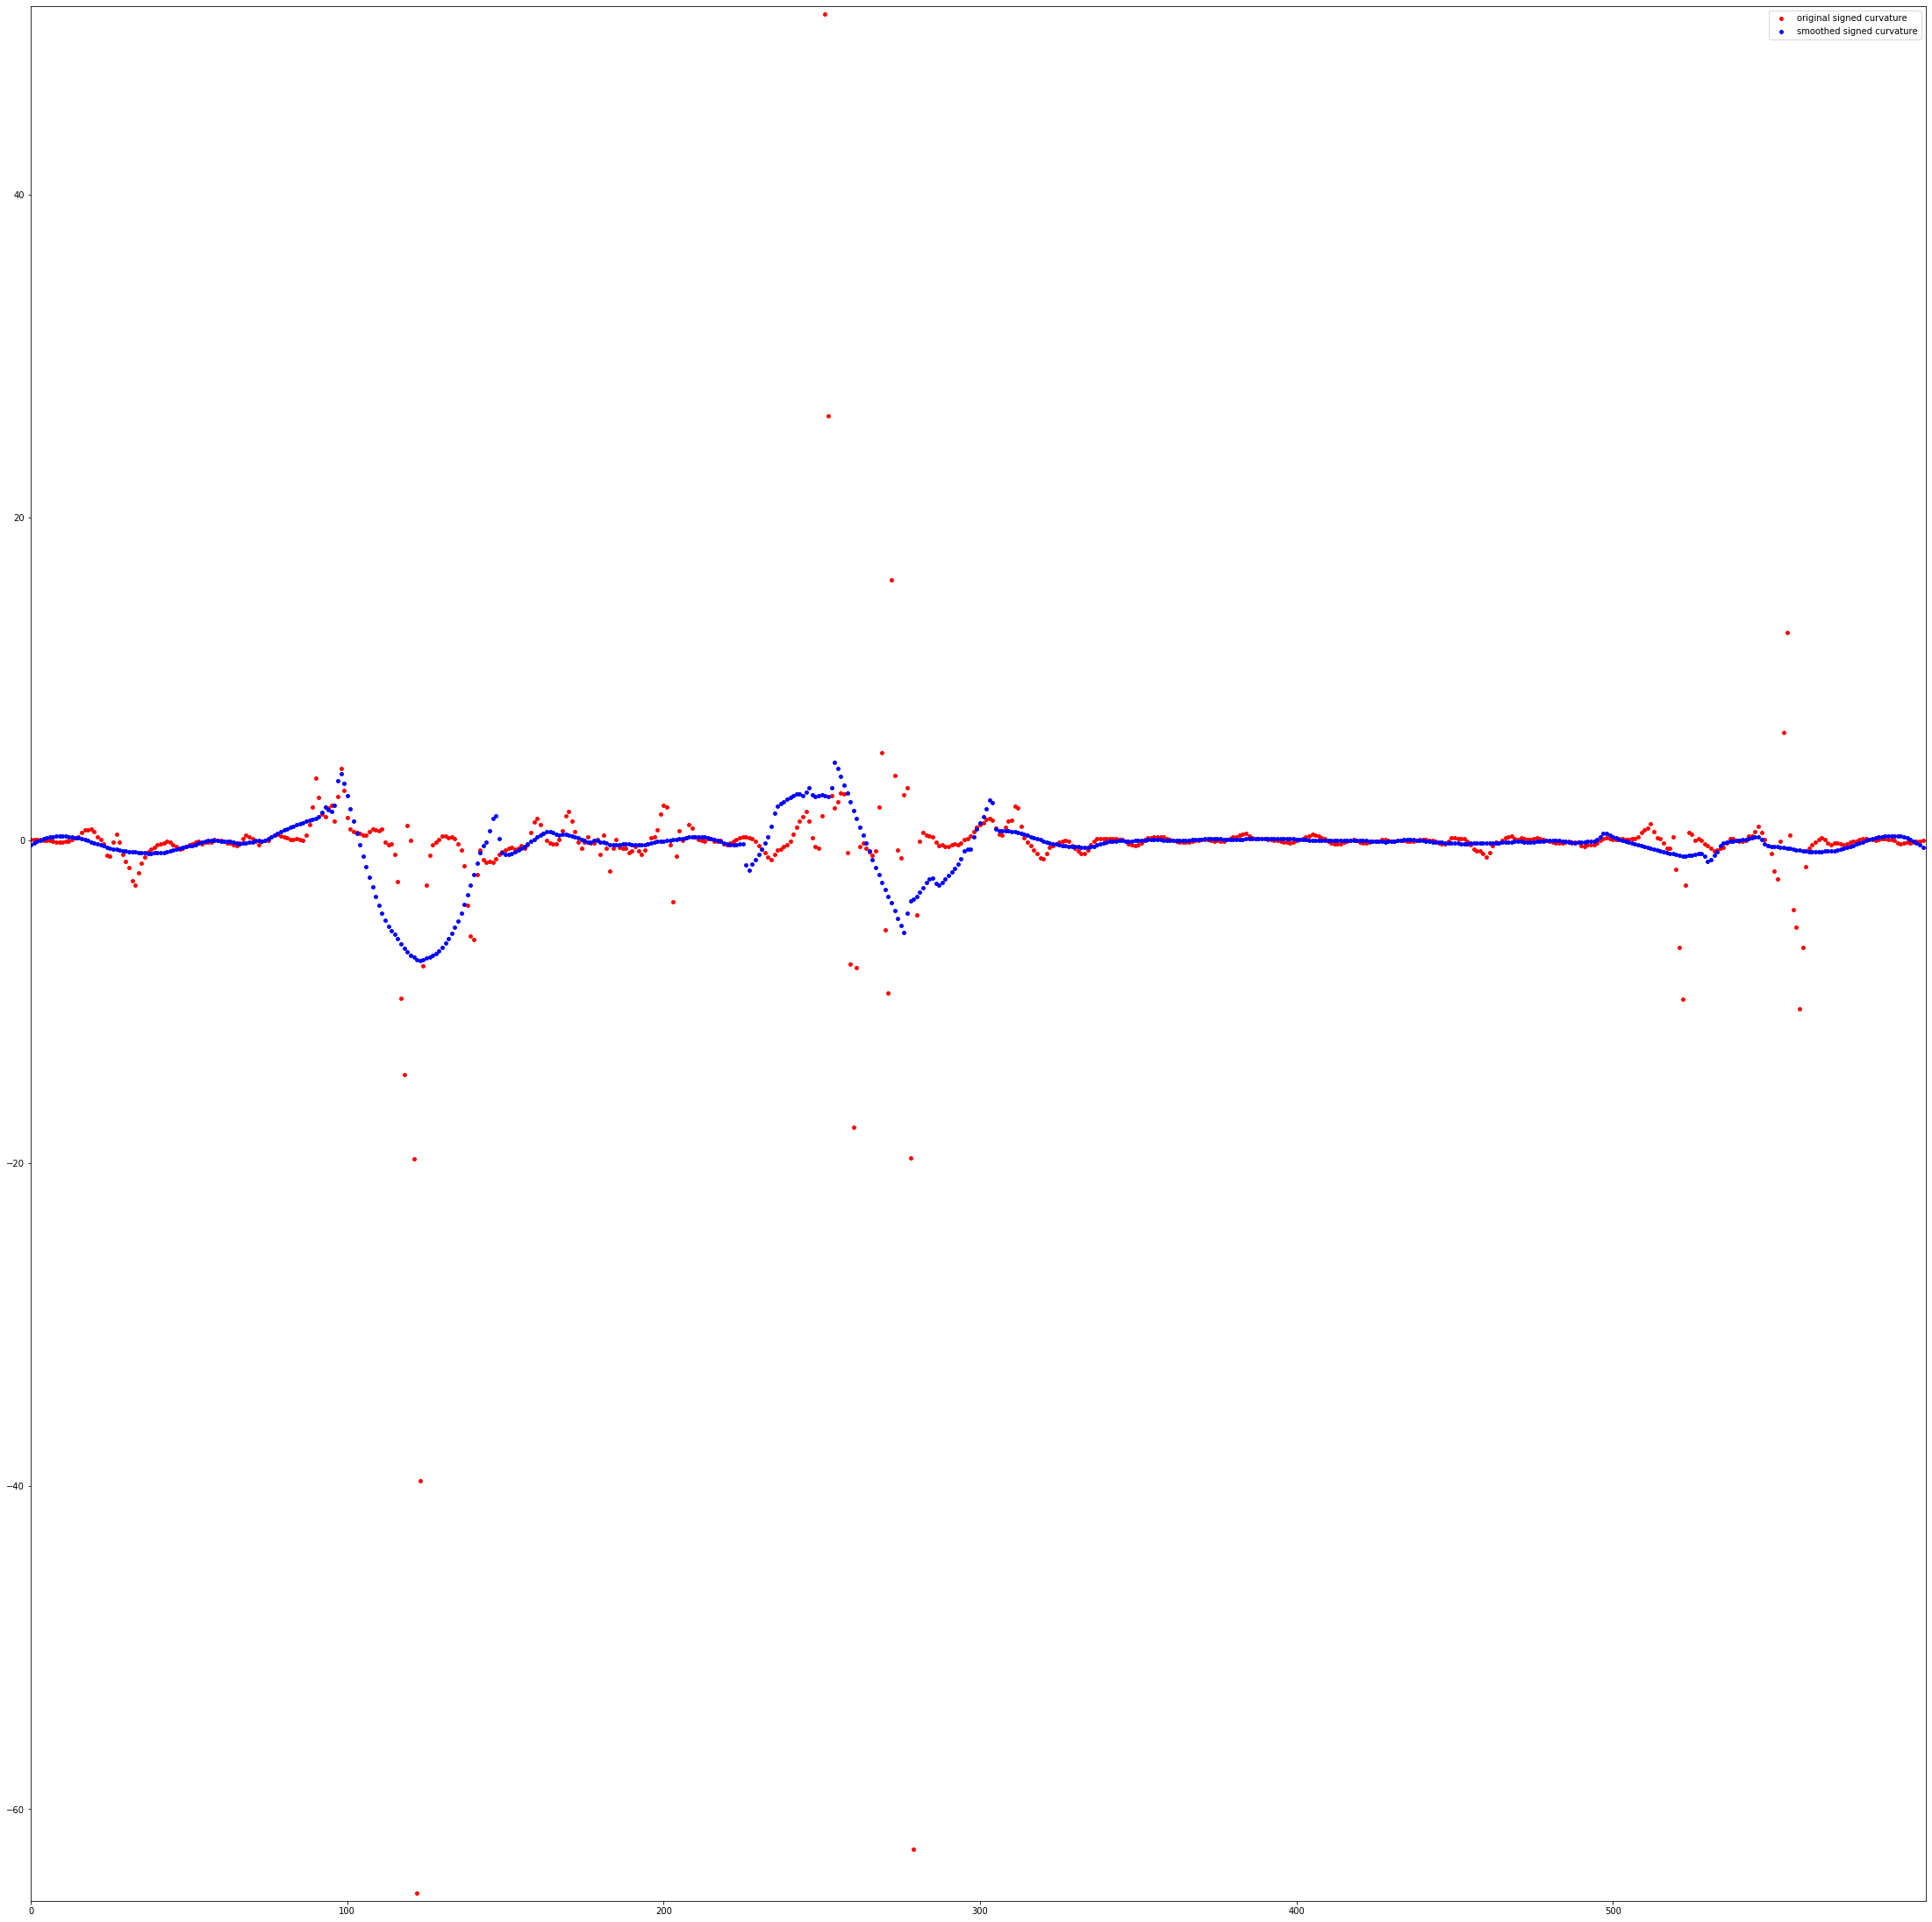

In [33]:
getCurvPlotSmooth(30, 100, zoom = range(6000))
getCurvPlotSmooth(30, 50, zoom = range(3000))
getCurvPlotSmooth(30, 10, zoom = range(600))
getCurvPlotSmooth(30, 10, 5, 3, zoom = range(600))
#performing badly for low FR

LOG: Extracting coordinates for Animal CRV_10_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_10_TEST_00...
LOG: Extracting coordinates for Animal CRV_10_TEST_01...
LOG: Extracting coordinates for Animal CRV_10_TEST_02...
LOG: Extracting coordinates for Animal CRV_10_TEST_03...
LOG: Extracting coordinates for Animal CRV_10_TEST_04...
LOG: Extracting coordinates for Animal CRV_10_TEST_05...
LOG: Extracting coordinates for Animal CRV_10_TEST_06...
LOG: Extracting coordinates for Animal CRV_10_TEST_07...
LOG: Extracting coordinates for Animal CRV_10_TEST_08...
LOG: Extracting coordinates for Animal CRV_10_TEST_09...
LOG: Extracting coordinates for Animal CRV_10_TEST_10...
LOG: Extracting coordinates for Animal CRV_10_TEST_11...
LOG: Extracting coordinates for Animal CRV_10_TEST_12...
LOG: Extracting coordinates for Animal CRV_10_TEST_13...
LOG: Extracting coordinates for Animal CRV_10_TEST_14...
LOG: Extracting coordinates for Animal CRV_10_TEST_15...
LOG: Extracting coordinates f

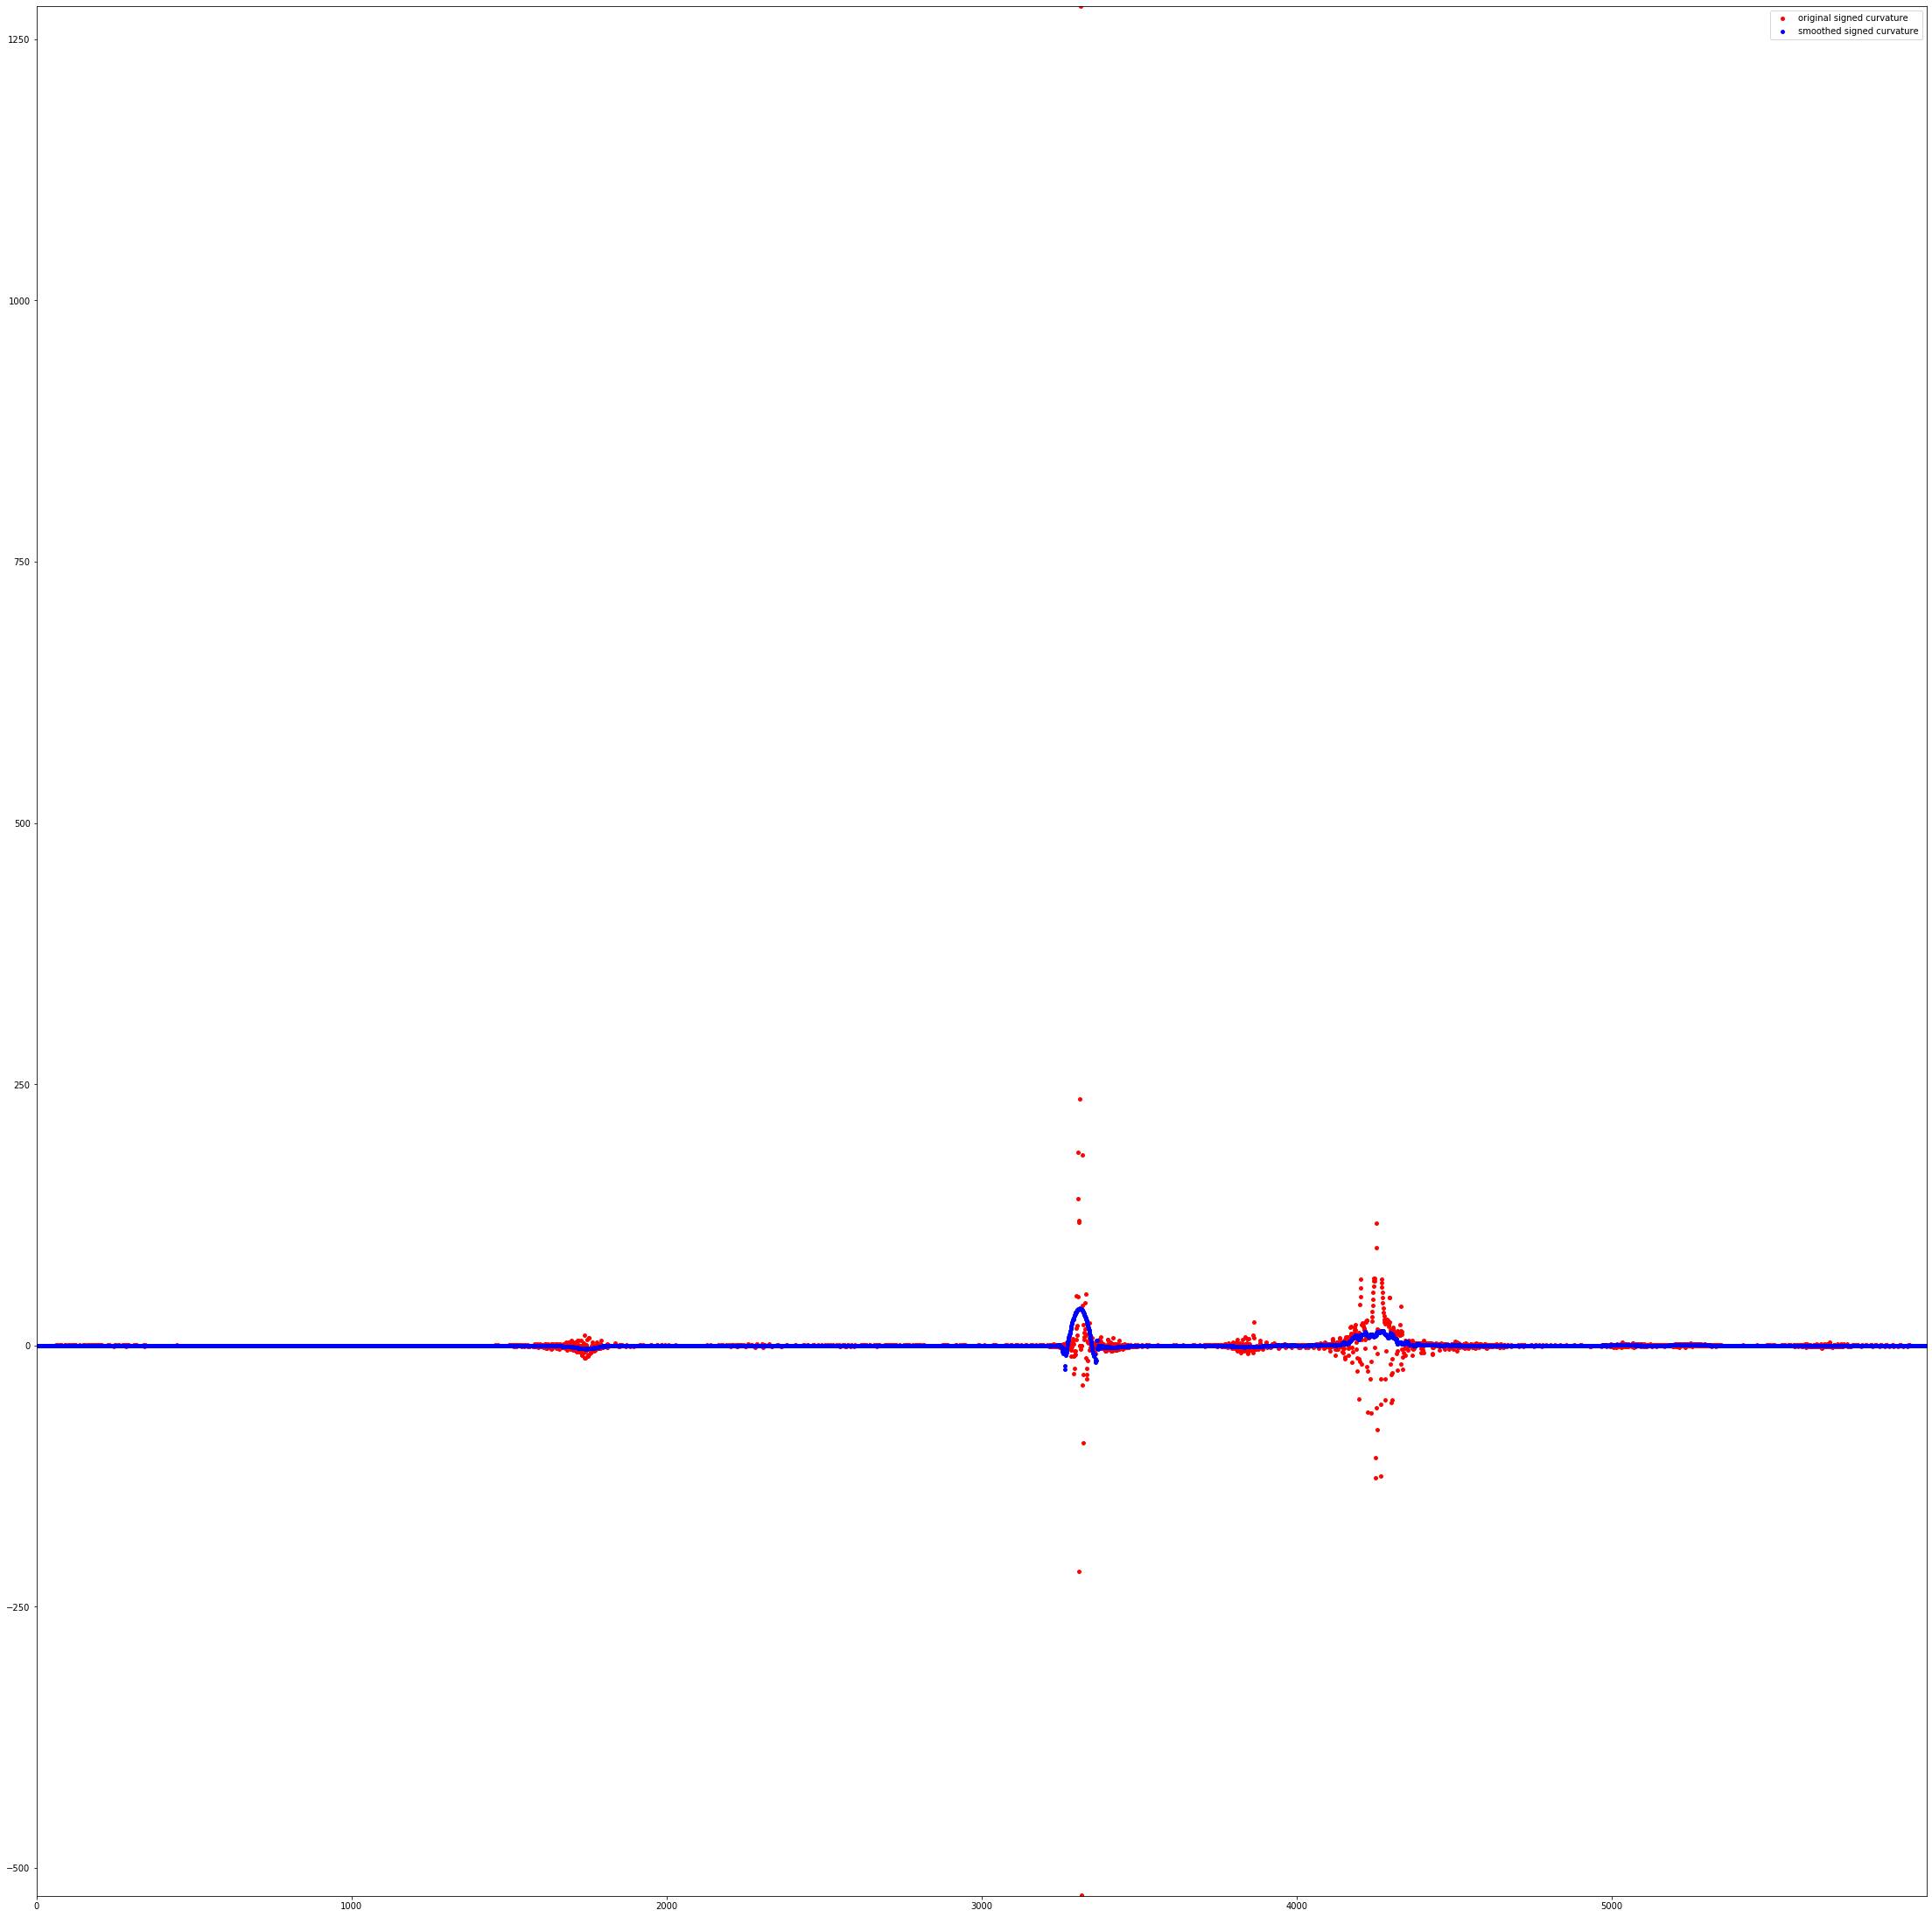

In [34]:
getCurvPlotSmooth(10, 100, zoom = range(6000))

LOG: Extracting coordinates for Animal CRV_08_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_08_TEST_00...
LOG: Extracting coordinates for Animal CRV_08_TEST_01...
LOG: Extracting coordinates for Animal CRV_08_TEST_02...
LOG: Extracting coordinates for Animal CRV_08_TEST_03...
LOG: Extracting coordinates for Animal CRV_08_TEST_04...
LOG: Extracting coordinates for Animal CRV_08_TEST_05...
LOG: Extracting coordinates for Animal CRV_08_TEST_06...
LOG: Extracting coordinates for Animal CRV_08_TEST_07...
LOG: Extracting coordinates for Animal CRV_08_TEST_08...
LOG: Extracting coordinates for Animal CRV_08_TEST_09...
LOG: Extracting coordinates for Animal CRV_08_TEST_10...
LOG: Extracting coordinates for Animal CRV_08_TEST_11...
LOG: Extracting coordinates for Animal CRV_08_TEST_12...
LOG: Extracting coordinates for Animal CRV_08_TEST_13...
LOG: Extracting coordinates for Animal CRV_08_TEST_14...
LOG: Extracting coordinates for Animal CRV_08_TEST_15...
LOG: Extracting coordinates f

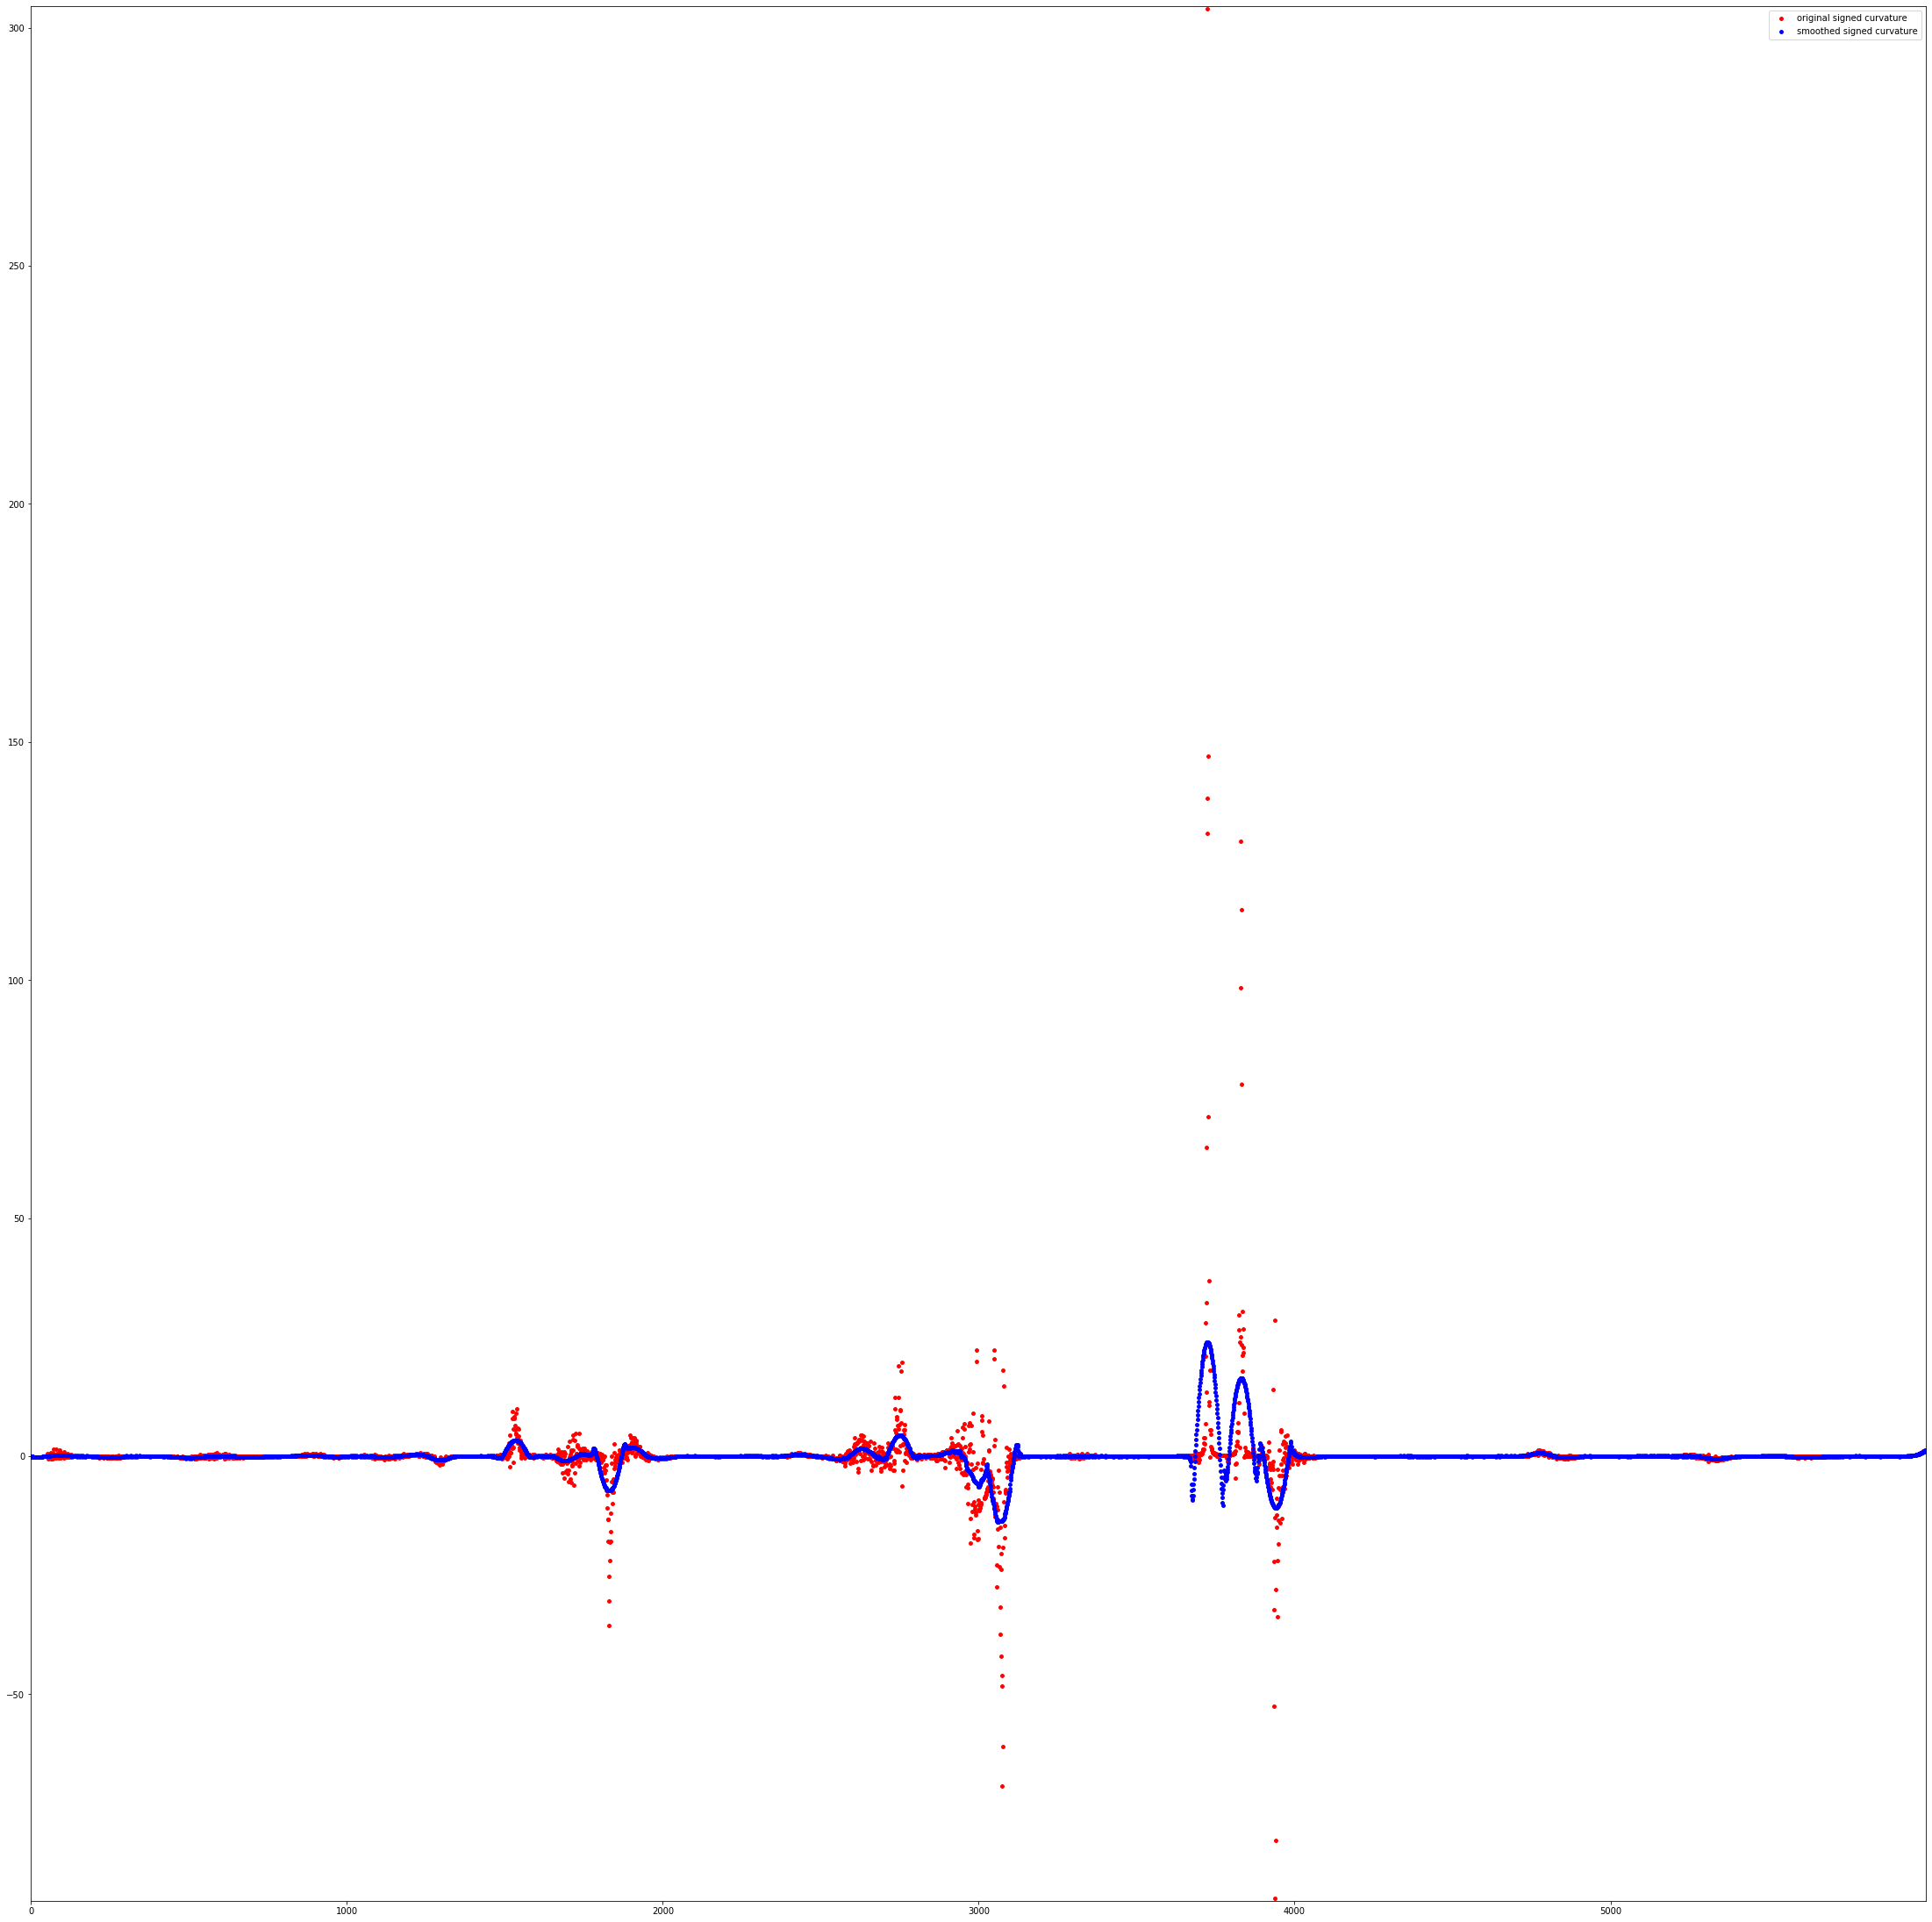

In [35]:
getCurvPlotSmooth(8, 100, zoom = range(6000))

LOG: Extracting coordinates for Animal CRV_01_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_01_TEST_00...
LOG: Extracting coordinates for Animal CRV_01_TEST_01...
LOG: Extracting coordinates for Animal CRV_01_TEST_02...
LOG: Extracting coordinates for Animal CRV_01_TEST_03...
LOG: Extracting coordinates for Animal CRV_01_TEST_04...
LOG: Extracting coordinates for Animal CRV_01_TEST_05...
LOG: Extracting coordinates for Animal CRV_01_TEST_06...
LOG: Extracting coordinates for Animal CRV_01_TEST_07...
LOG: Extracting coordinates for Animal CRV_01_TEST_08...
LOG: Extracting coordinates for Animal CRV_01_TEST_09...
LOG: Extracting coordinates for Animal CRV_01_TEST_10...
LOG: Extracting coordinates for Animal CRV_01_TEST_11...
LOG: Extracting coordinates for Animal CRV_01_TEST_12...
LOG: Extracting coordinates for Animal CRV_01_TEST_13...
LOG: Extracting coordinates for Animal CRV_01_TEST_14...
LOG: Extracting coordinates for Animal CRV_01_TEST_15...
LOG: Extracting coordinates f

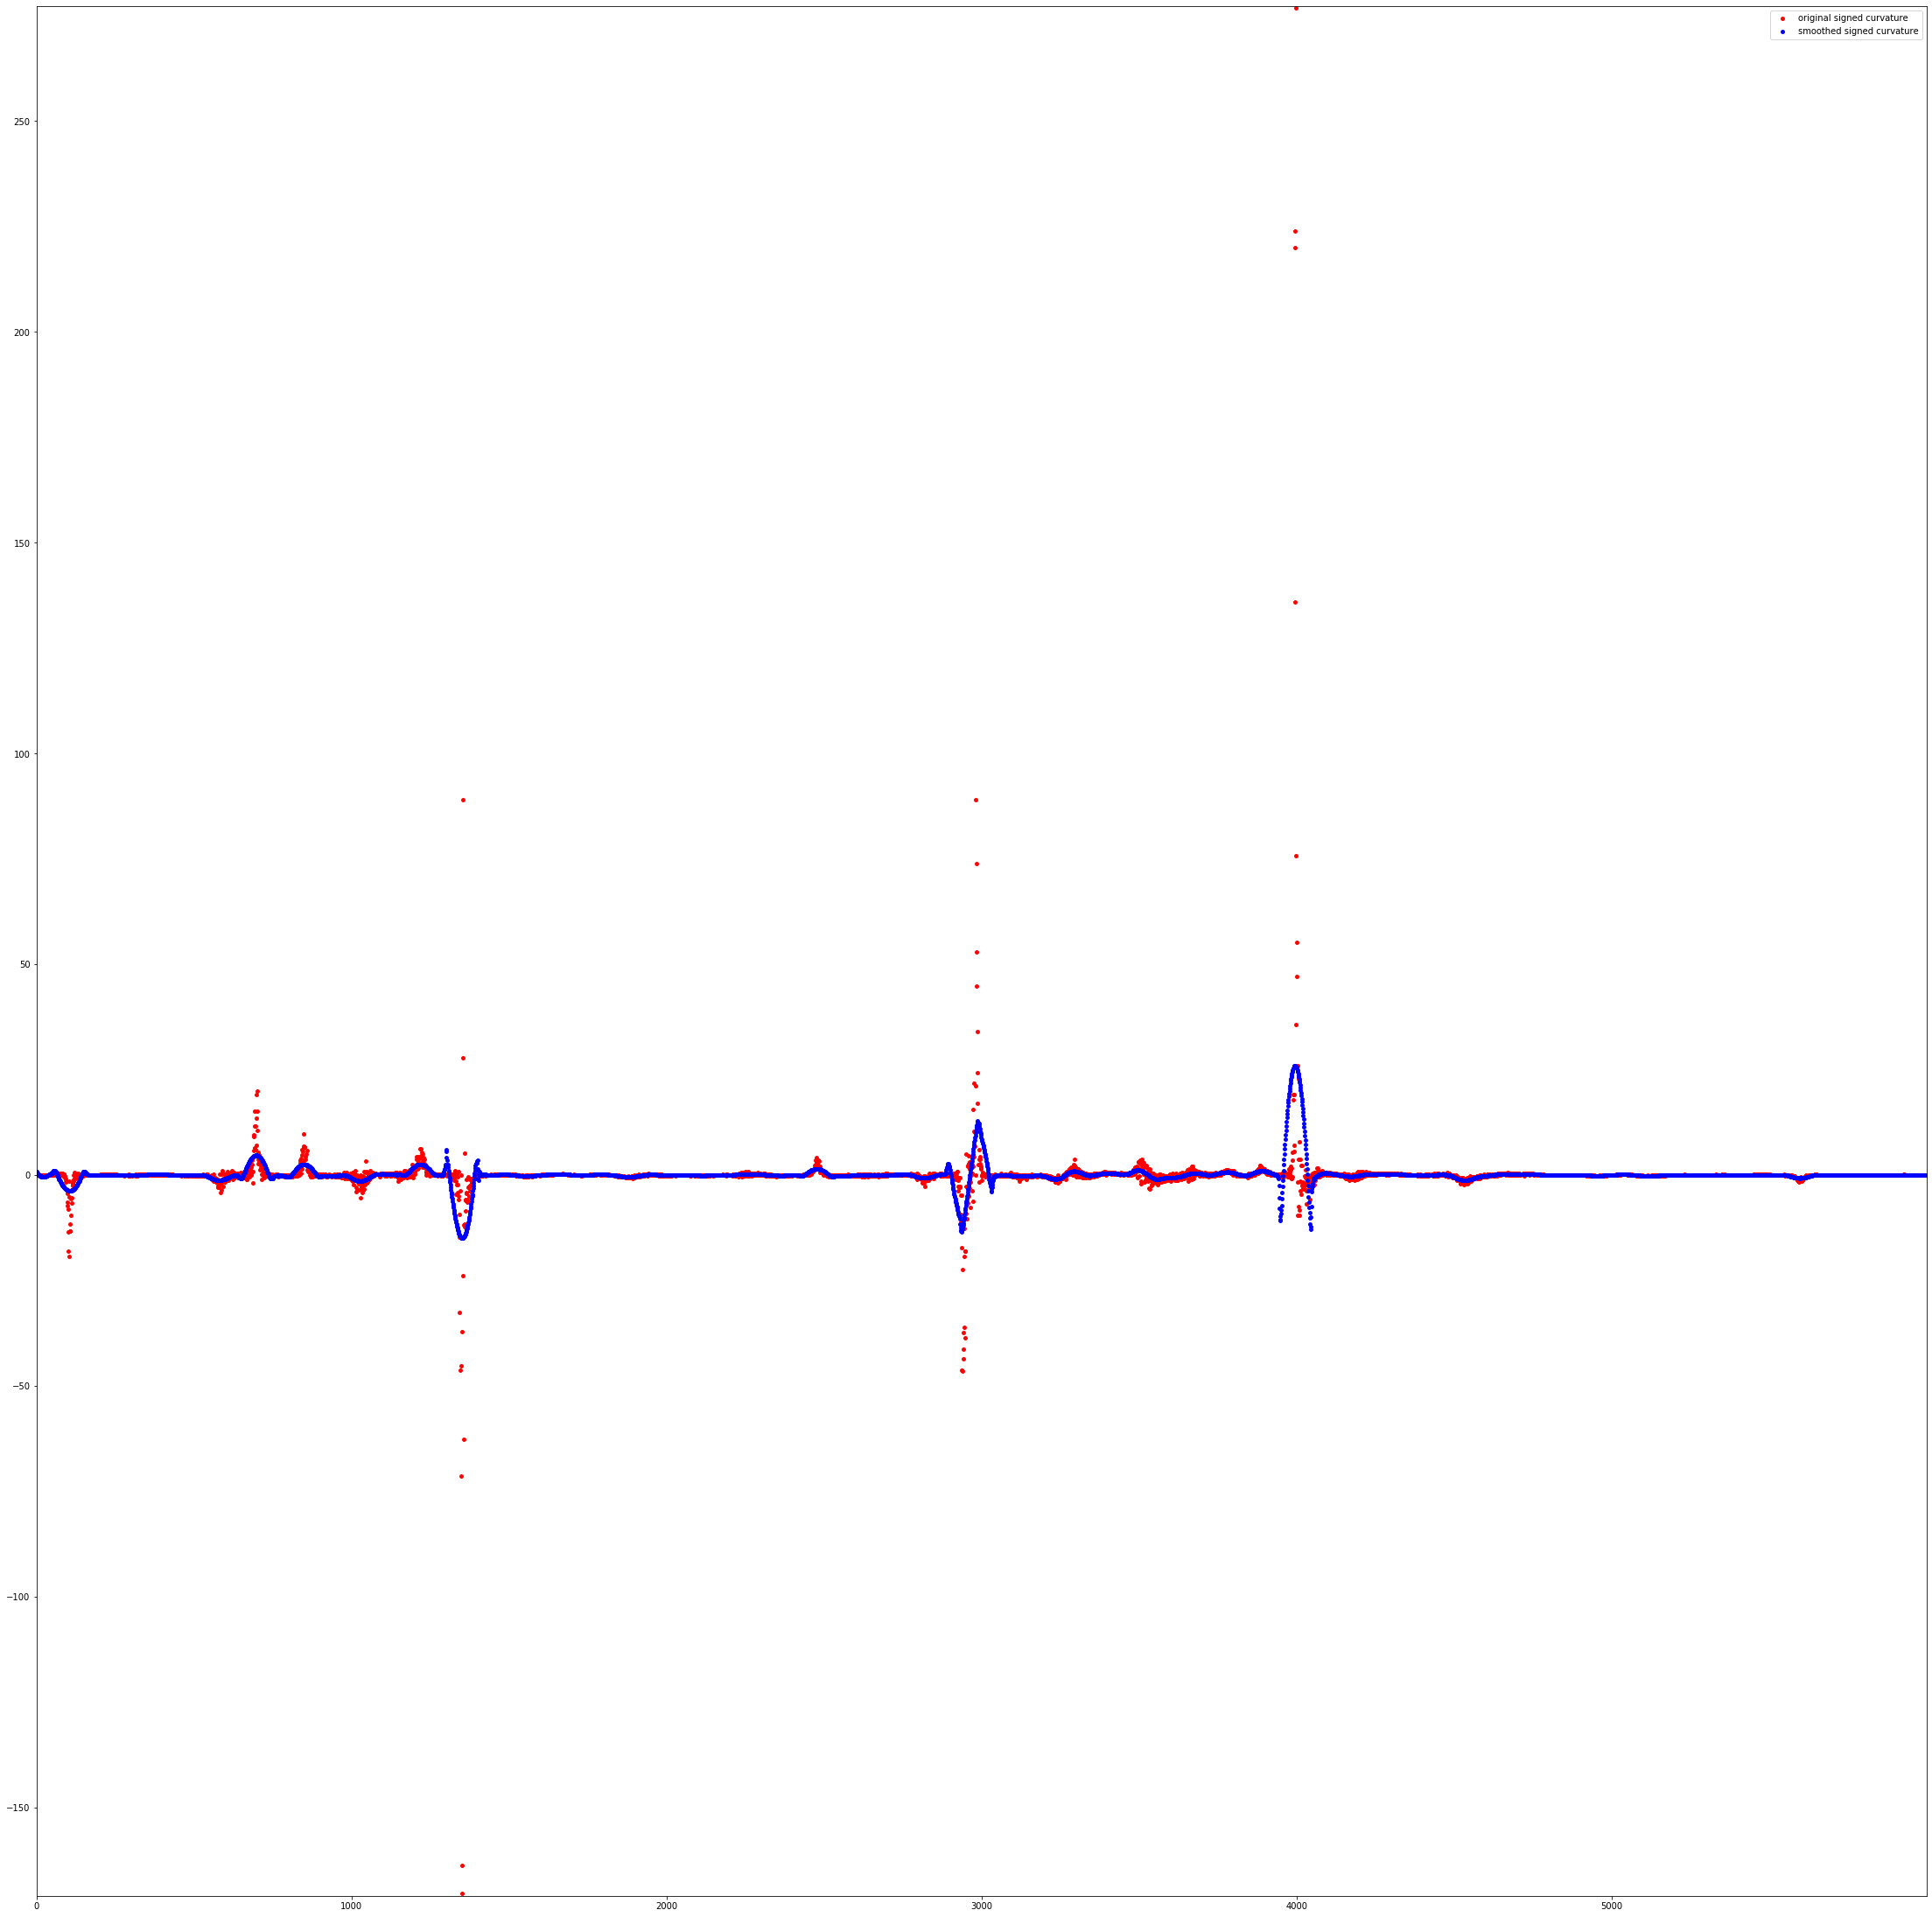

In [36]:
getCurvPlotSmooth(1, 100, zoom = range(6000))

LOG: Extracting coordinates for Animal CRV_34_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_34_TEST_00...
LOG: Extracting coordinates for Animal CRV_34_TEST_01...
LOG: Extracting coordinates for Animal CRV_34_TEST_02...
LOG: Extracting coordinates for Animal CRV_34_TEST_03...
LOG: Extracting coordinates for Animal CRV_34_TEST_04...
LOG: Extracting coordinates for Animal CRV_34_TEST_05...
LOG: Extracting coordinates for Animal CRV_34_TEST_06...
LOG: Extracting coordinates for Animal CRV_34_TEST_07...
LOG: Extracting coordinates for Animal CRV_34_TEST_08...
LOG: Extracting coordinates for Animal CRV_34_TEST_09...
LOG: Extracting coordinates for Animal CRV_34_TEST_10...
LOG: Extracting coordinates for Animal CRV_34_TEST_11...
LOG: Extracting coordinates for Animal CRV_34_TEST_12...
LOG: Extracting coordinates for Animal CRV_34_TEST_13...
LOG: Extracting coordinates for Animal CRV_34_TEST_14...
LOG: Extracting coordinates for Animal CRV_34_TEST_15...
LOG: Extracting coordinates f

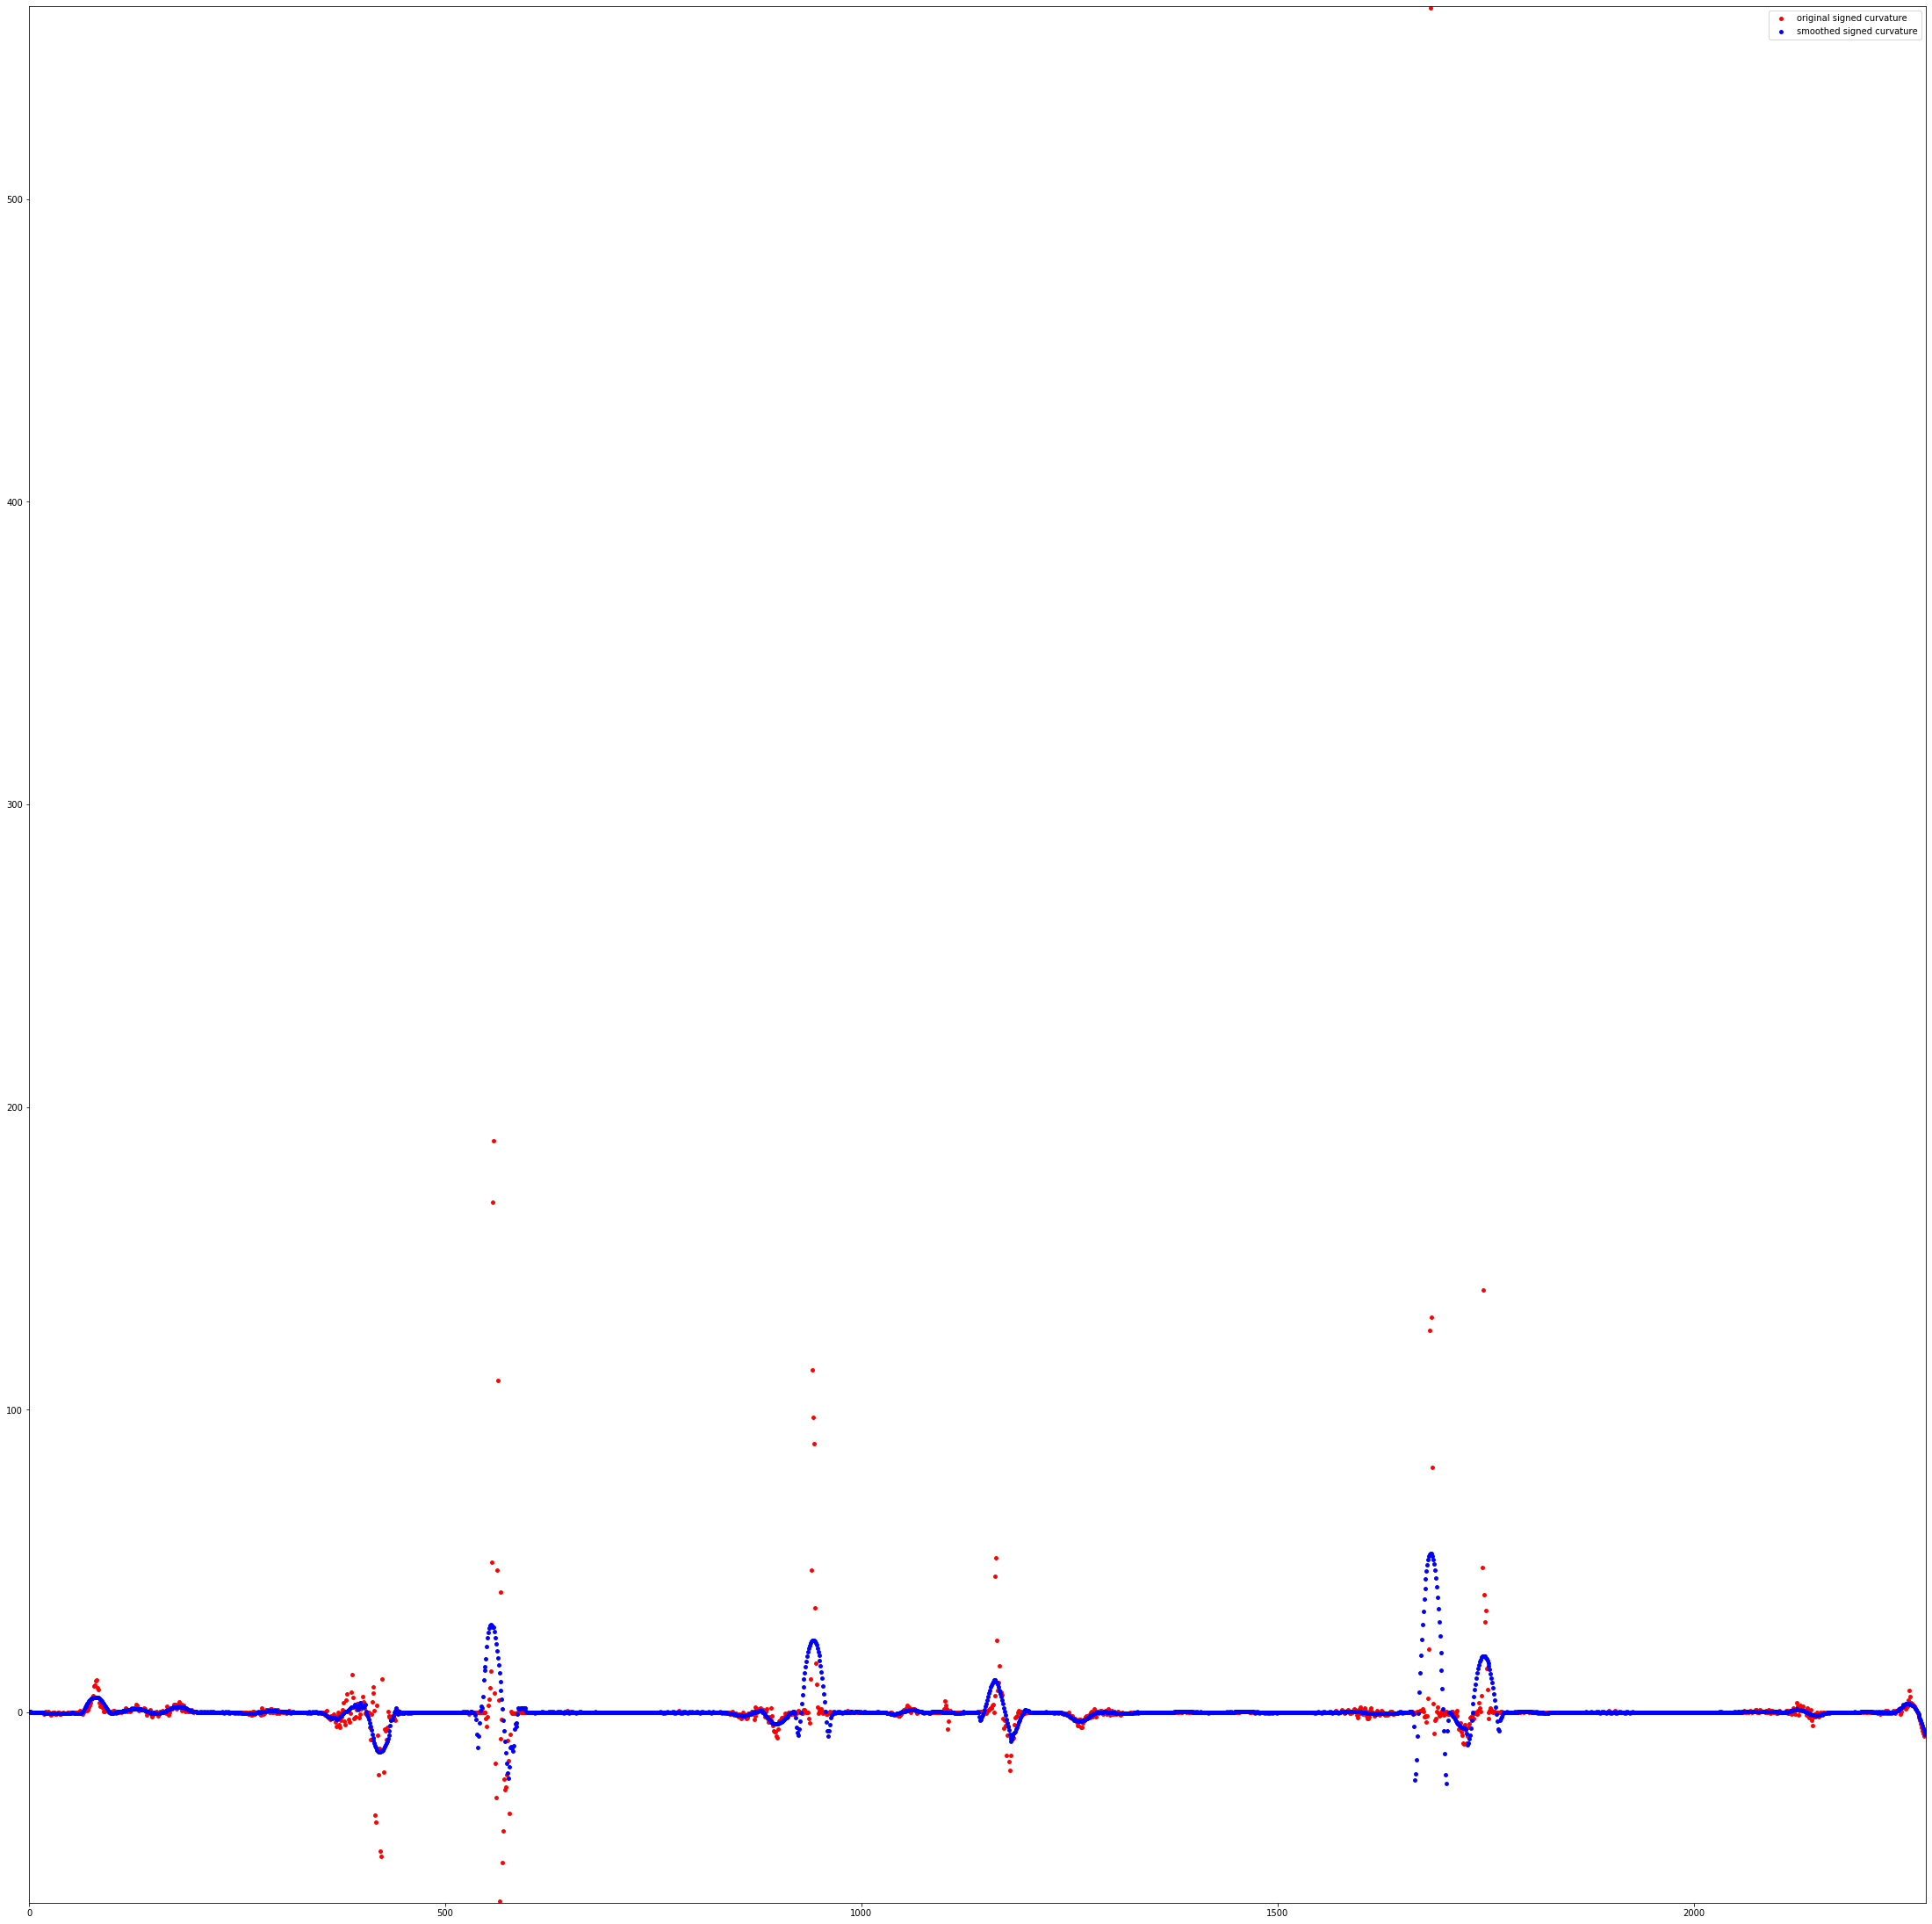

LOG: Extracting coordinates for Animal CRV_34_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_34_TEST_00...
LOG: Extracting coordinates for Animal CRV_34_TEST_01...
LOG: Extracting coordinates for Animal CRV_34_TEST_02...
LOG: Extracting coordinates for Animal CRV_34_TEST_03...
LOG: Extracting coordinates for Animal CRV_34_TEST_04...
LOG: Extracting coordinates for Animal CRV_34_TEST_05...
LOG: Extracting coordinates for Animal CRV_34_TEST_06...
LOG: Extracting coordinates for Animal CRV_34_TEST_07...
LOG: Extracting coordinates for Animal CRV_34_TEST_08...
LOG: Extracting coordinates for Animal CRV_34_TEST_09...
LOG: Extracting coordinates for Animal CRV_34_TEST_10...
LOG: Extracting coordinates for Animal CRV_34_TEST_11...
LOG: Extracting coordinates for Animal CRV_34_TEST_12...
LOG: Extracting coordinates for Animal CRV_34_TEST_13...
LOG: Extracting coordinates for Animal CRV_34_TEST_14...
LOG: Extracting coordinates for Animal CRV_34_TEST_15...
LOG: Extracting coordinates f

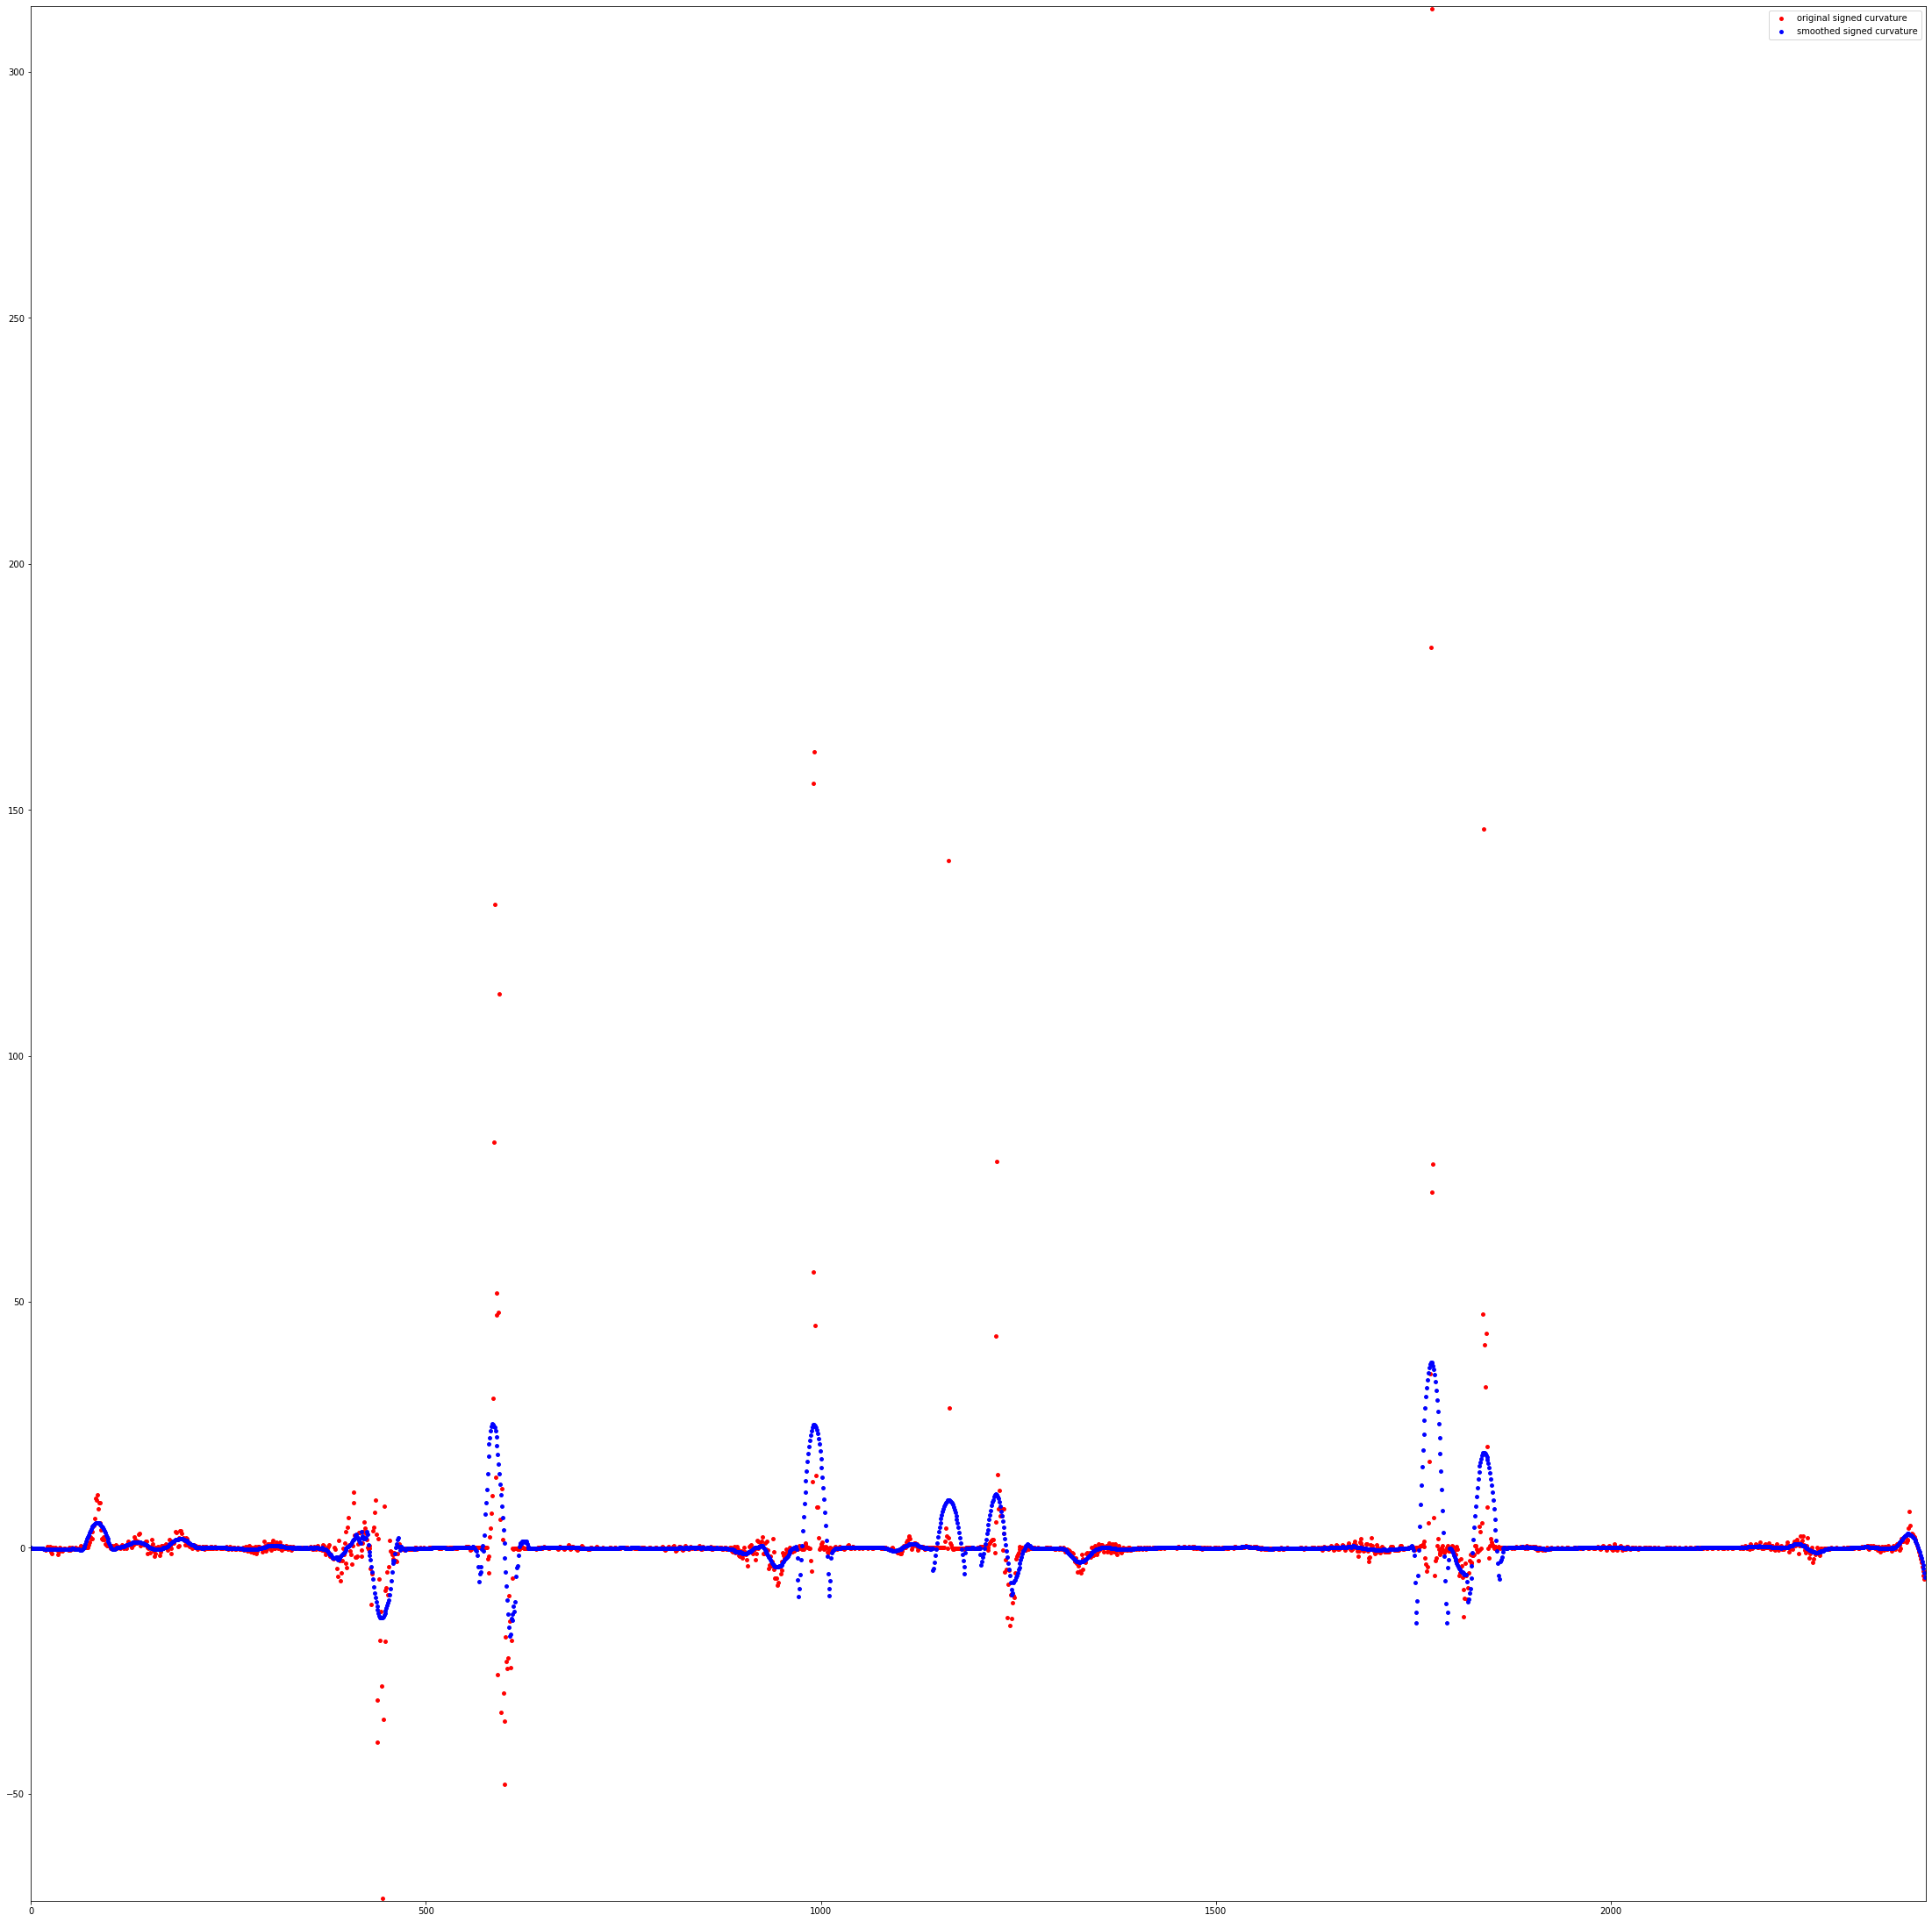

LOG: Extracting coordinates for Animal CRV_34_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_34_TEST_00...
LOG: Extracting coordinates for Animal CRV_34_TEST_01...
LOG: Extracting coordinates for Animal CRV_34_TEST_02...
LOG: Extracting coordinates for Animal CRV_34_TEST_03...
LOG: Extracting coordinates for Animal CRV_34_TEST_04...
LOG: Extracting coordinates for Animal CRV_34_TEST_05...
LOG: Extracting coordinates for Animal CRV_34_TEST_06...
LOG: Extracting coordinates for Animal CRV_34_TEST_07...
LOG: Extracting coordinates for Animal CRV_34_TEST_08...
LOG: Extracting coordinates for Animal CRV_34_TEST_09...
LOG: Extracting coordinates for Animal CRV_34_TEST_10...
LOG: Extracting coordinates for Animal CRV_34_TEST_11...
LOG: Extracting coordinates for Animal CRV_34_TEST_12...
LOG: Extracting coordinates for Animal CRV_34_TEST_13...
LOG: Extracting coordinates for Animal CRV_34_TEST_14...
LOG: Extracting coordinates for Animal CRV_34_TEST_15...
LOG: Extracting coordinates f

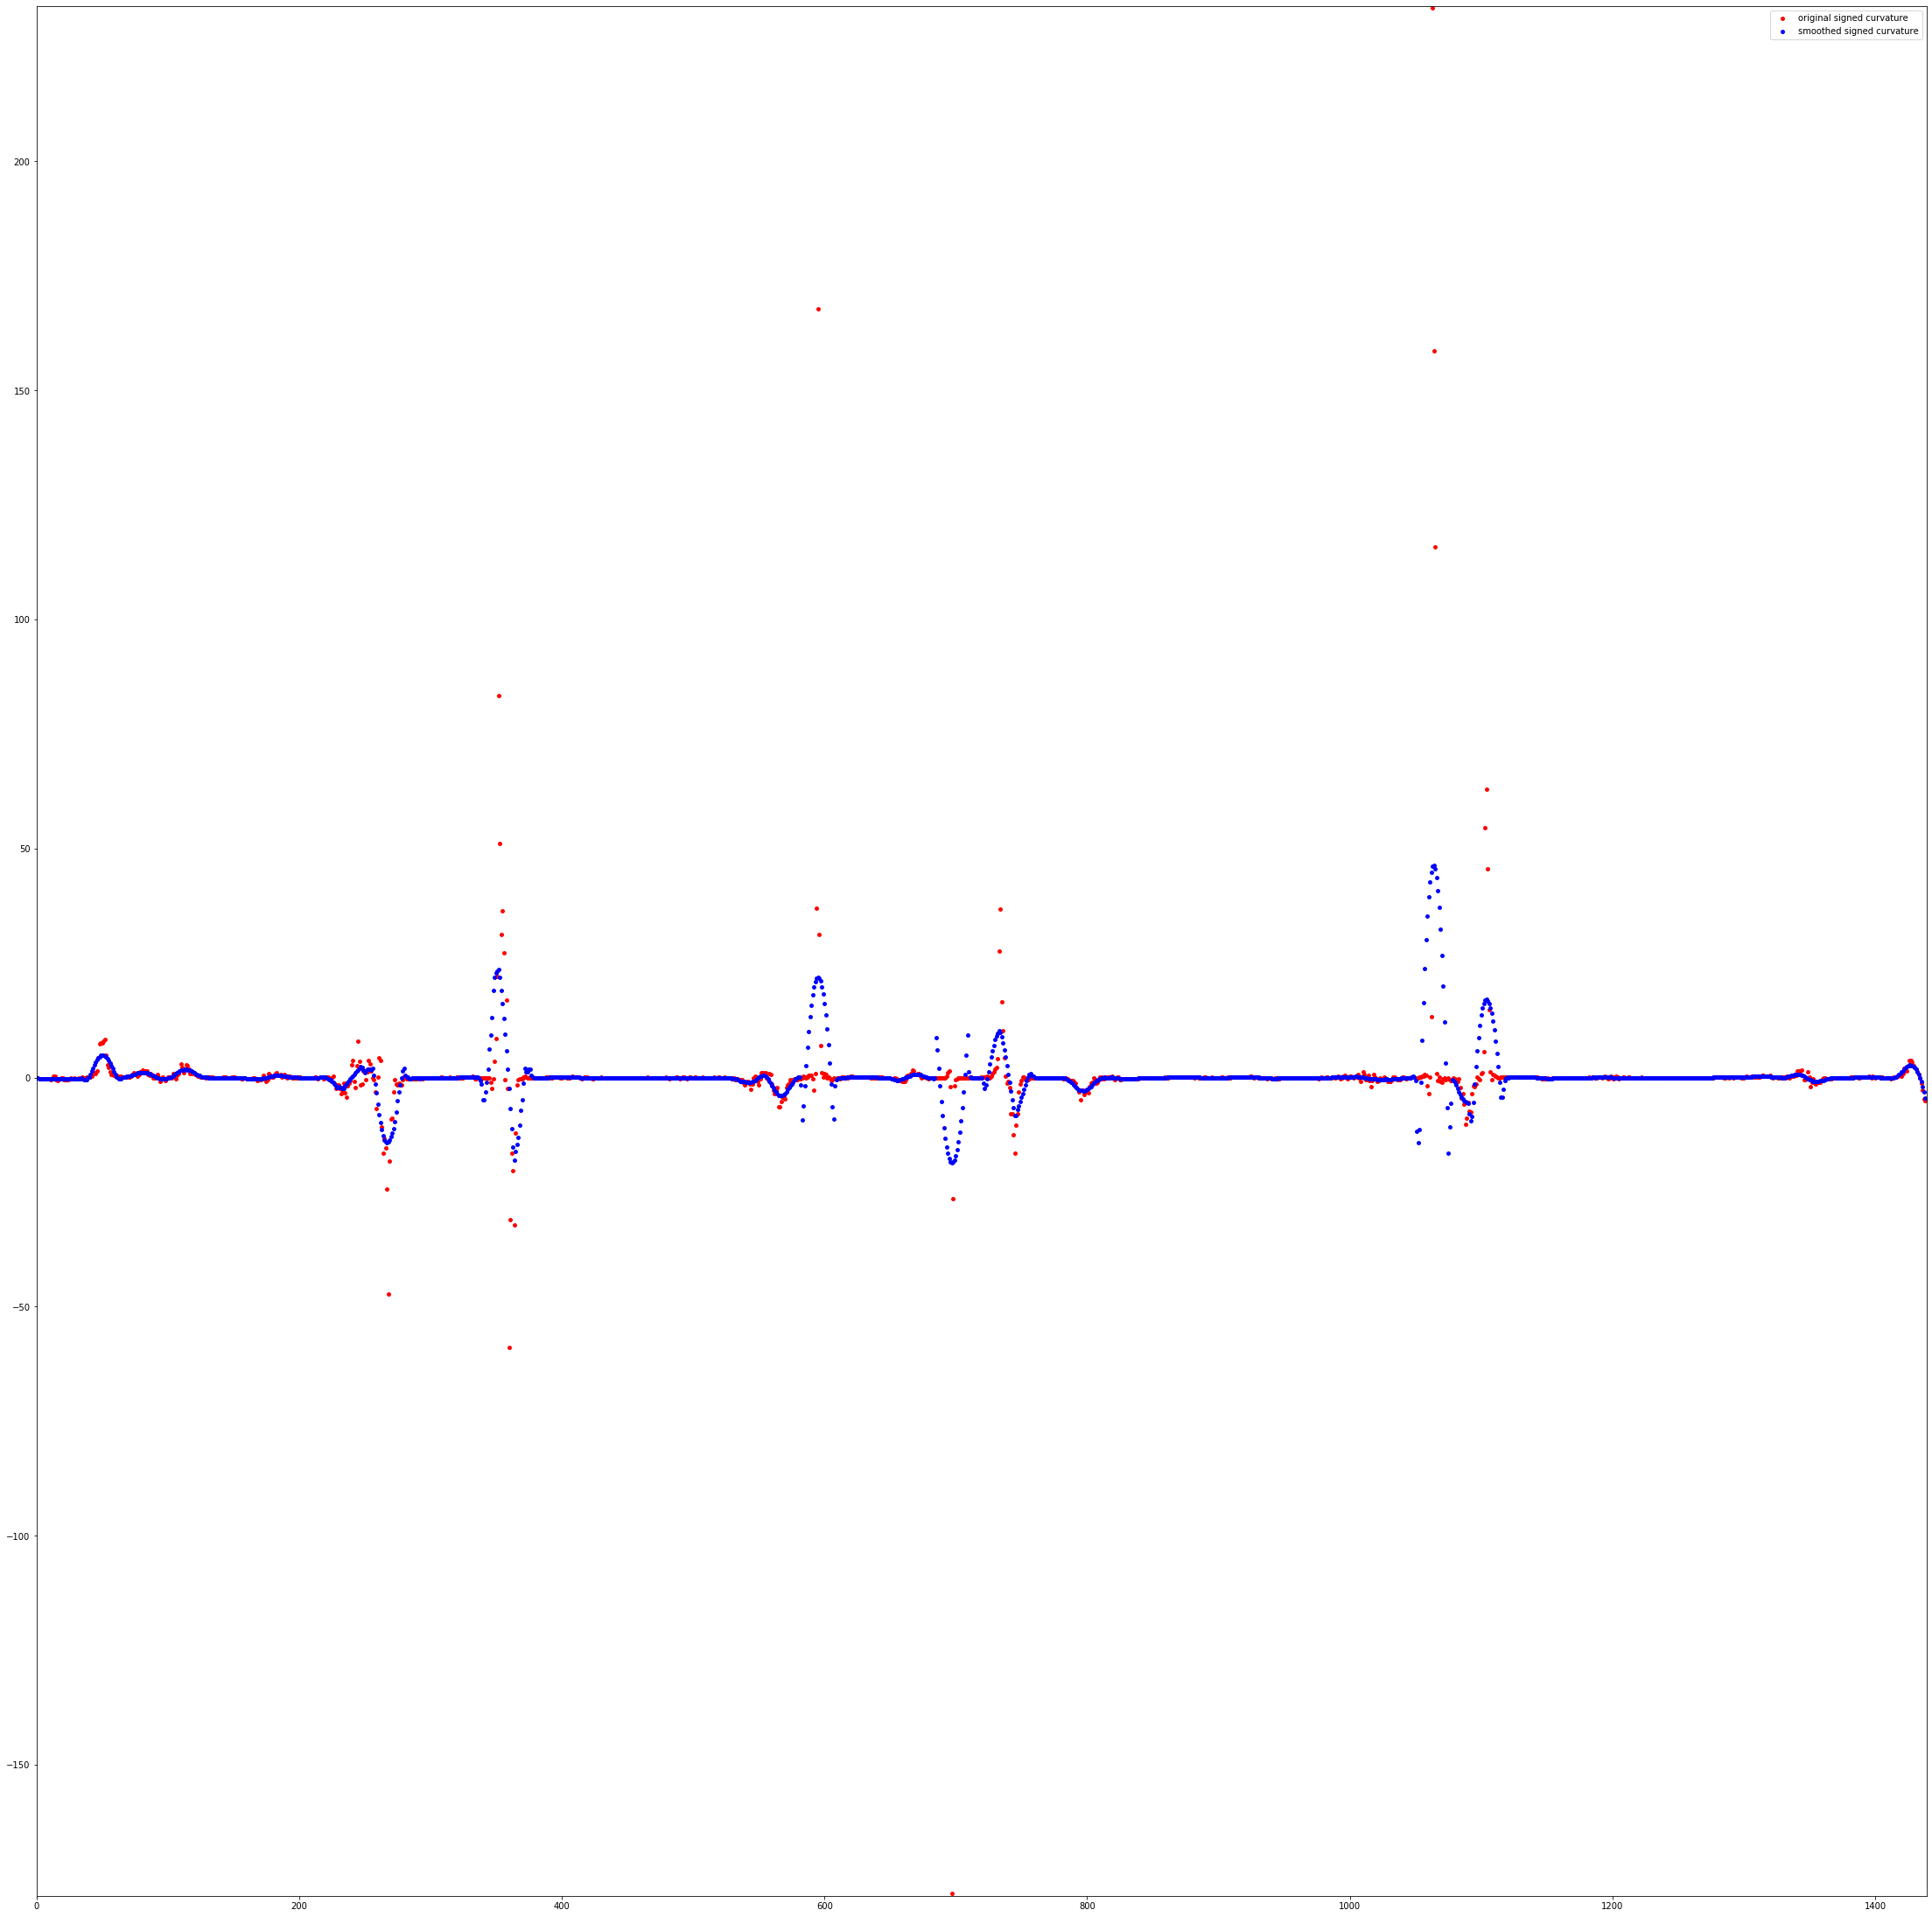

In [45]:
#check curves with strange FR vs BDD plots

#curve 34 has a lot of scatter

getCurvPlotSmooth(34, 38, zoom = range(38*60))
getCurvPlotSmooth(34, 40, zoom = range(40*60))
#40 has smaller BDD with 24 than 38 with 24
getCurvPlotSmooth(34, 24, zoom = range(1440))


In [38]:
def norm(data):
    """
    Given data, find the mean and standard deviation.
    :Parameters:
     data : list of data values
    :Returns:
     mean, stds
    """
    #remove outliers <1.5 IQR from calculation
    data_array = np.array(data, dtype=np.float)
    
    Q1,Q3 = np.percentile(data_array, [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    data_array_no_high_outliers = data_array[data_array < upper_range]
    data_array_no_outliers = data_array_no_high_outliers[data_array_no_high_outliers > lower_range]
    
    mean = np.mean(data_array_no_outliers)
    std = np.std(data_array_no_outliers)
    return mean, std

In [41]:
curv = getCurv(34, 38)
smooth_curv = locomotion.trajectory.smooth(curv, 38)
smooth_curv = np.abs(smooth_curv)
norm(smooth_curv)
#(-0.012680479876774899, 0.14088623552236407)
#with abs value taken before normalizing
#(0.18598934765146385, 0.2753690097552132)

LOG: Extracting coordinates for Animal CRV_34_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_34_TEST_00...
LOG: Extracting coordinates for Animal CRV_34_TEST_01...
LOG: Extracting coordinates for Animal CRV_34_TEST_02...
LOG: Extracting coordinates for Animal CRV_34_TEST_03...
LOG: Extracting coordinates for Animal CRV_34_TEST_04...
LOG: Extracting coordinates for Animal CRV_34_TEST_05...
LOG: Extracting coordinates for Animal CRV_34_TEST_06...
LOG: Extracting coordinates for Animal CRV_34_TEST_07...
LOG: Extracting coordinates for Animal CRV_34_TEST_08...
LOG: Extracting coordinates for Animal CRV_34_TEST_09...
LOG: Extracting coordinates for Animal CRV_34_TEST_10...
LOG: Extracting coordinates for Animal CRV_34_TEST_11...
LOG: Extracting coordinates for Animal CRV_34_TEST_12...
LOG: Extracting coordinates for Animal CRV_34_TEST_13...
LOG: Extracting coordinates for Animal CRV_34_TEST_14...
LOG: Extracting coordinates for Animal CRV_34_TEST_15...
LOG: Extracting coordinates f

(0.18598934765146385, 0.2753690097552132)

In [42]:
curv = getCurv(34, 40)
smooth_curv = locomotion.trajectory.smooth(curv, 40)
smooth_curv = np.abs(smooth_curv)
norm(smooth_curv)
#(0.21856966097459782, 0.34328237160689373)

LOG: Extracting coordinates for Animal CRV_34_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_34_TEST_00...
LOG: Extracting coordinates for Animal CRV_34_TEST_01...
LOG: Extracting coordinates for Animal CRV_34_TEST_02...
LOG: Extracting coordinates for Animal CRV_34_TEST_03...
LOG: Extracting coordinates for Animal CRV_34_TEST_04...
LOG: Extracting coordinates for Animal CRV_34_TEST_05...
LOG: Extracting coordinates for Animal CRV_34_TEST_06...
LOG: Extracting coordinates for Animal CRV_34_TEST_07...
LOG: Extracting coordinates for Animal CRV_34_TEST_08...
LOG: Extracting coordinates for Animal CRV_34_TEST_09...
LOG: Extracting coordinates for Animal CRV_34_TEST_10...
LOG: Extracting coordinates for Animal CRV_34_TEST_11...
LOG: Extracting coordinates for Animal CRV_34_TEST_12...
LOG: Extracting coordinates for Animal CRV_34_TEST_13...
LOG: Extracting coordinates for Animal CRV_34_TEST_14...
LOG: Extracting coordinates for Animal CRV_34_TEST_15...
LOG: Extracting coordinates f

(0.21856966097459782, 0.34328237160689373)

In [43]:
curv = getCurv(34, 24)
smooth_curv = locomotion.trajectory.smooth(curv, 24)
smooth_curv = np.abs(smooth_curv)
norm(smooth_curv)
#(0.21987171952064005, 0.34633180283606047)
#almost the same as for FR = 40
#FR = 38 has significantly smaller mean and sd so BDD is higher

LOG: Extracting coordinates for Animal CRV_34_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_34_TEST_00...
LOG: Extracting coordinates for Animal CRV_34_TEST_01...
LOG: Extracting coordinates for Animal CRV_34_TEST_02...
LOG: Extracting coordinates for Animal CRV_34_TEST_03...
LOG: Extracting coordinates for Animal CRV_34_TEST_04...
LOG: Extracting coordinates for Animal CRV_34_TEST_05...
LOG: Extracting coordinates for Animal CRV_34_TEST_06...
LOG: Extracting coordinates for Animal CRV_34_TEST_07...
LOG: Extracting coordinates for Animal CRV_34_TEST_08...
LOG: Extracting coordinates for Animal CRV_34_TEST_09...
LOG: Extracting coordinates for Animal CRV_34_TEST_10...
LOG: Extracting coordinates for Animal CRV_34_TEST_11...
LOG: Extracting coordinates for Animal CRV_34_TEST_12...
LOG: Extracting coordinates for Animal CRV_34_TEST_13...
LOG: Extracting coordinates for Animal CRV_34_TEST_14...
LOG: Extracting coordinates for Animal CRV_34_TEST_15...
LOG: Extracting coordinates f

(0.21987171952064005, 0.34633180283606047)

In [44]:
curv = getCurv(34, 36)
smooth_curv = locomotion.trajectory.smooth(curv, 36)
smooth_curv = np.abs(smooth_curv)
norm(smooth_curv)
#(0.2112817311412794, 0.3169909975521135)
#also similar

LOG: Extracting coordinates for Animal CRV_34_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_34_TEST_00...
LOG: Extracting coordinates for Animal CRV_34_TEST_01...
LOG: Extracting coordinates for Animal CRV_34_TEST_02...
LOG: Extracting coordinates for Animal CRV_34_TEST_03...
LOG: Extracting coordinates for Animal CRV_34_TEST_04...
LOG: Extracting coordinates for Animal CRV_34_TEST_05...
LOG: Extracting coordinates for Animal CRV_34_TEST_06...
LOG: Extracting coordinates for Animal CRV_34_TEST_07...
LOG: Extracting coordinates for Animal CRV_34_TEST_08...
LOG: Extracting coordinates for Animal CRV_34_TEST_09...
LOG: Extracting coordinates for Animal CRV_34_TEST_10...
LOG: Extracting coordinates for Animal CRV_34_TEST_11...
LOG: Extracting coordinates for Animal CRV_34_TEST_12...
LOG: Extracting coordinates for Animal CRV_34_TEST_13...
LOG: Extracting coordinates for Animal CRV_34_TEST_14...
LOG: Extracting coordinates for Animal CRV_34_TEST_15...
LOG: Extracting coordinates f

(0.2112817311412794, 0.3169909975521135)

In [48]:
#relevant functions: code copied from capture_and_compare

import os
import re
import sys
import json
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sys.path.append(os.path.dirname(os.path.dirname(os.getcwd())))
import locomotion

#creating necessary folders for storing data / results
PATH_TO_DATA_DIRECTORY = os.getcwd() + "/data"
try: # Safety check to ensure that data folder exists, and makes it otherwise.
    os.mkdir(PATH_TO_DATA_DIRECTORY)
except FileExistsError:
    pass

PATH_TO_RES_DIRECTORY = os.getcwd() + "/results"
try: # Safety check to ensure that results folder exists, and makes it otherwise.
    os.mkdir(PATH_TO_RES_DIRECTORY)
except FileExistsError:
    pass


#static variables used for robustness testing
NUM_CURVES = 50 # This must match the number of curves in the data/curve_data directory.
ZFILL_LEN = int(np.ceil(np.log10(NUM_CURVES)))
NUM_SAMPLES = 50 # Number of samples being tested
SAMP_FILL = int(np.ceil(np.log10(NUM_SAMPLES)))
DEFAULT_START = 0 # Start Time in Minutes
DEFAULT_STOP = 1 # Stop Time in Minutes

########################################################################
#### Functions for getting curve data  ####
########################################################################

def genTrigFun(a_k, b_k):
    """ Generates the Fourier series function f(theta) = sum_0^k (a_k * cos(k * theta) + b_k * sin(k * theta))
        based on the given coefficient sequences.
        :Parameters:
            a_k/b_k : float list. Coefficient sequences of length k.
        :Returns:
            function f(theta), which is defined by f(theta) = sum_0^k (a_k * cos(k * theta) + b_k * sin(k * theta)).
    """

    #define the function we want to return
    def fun_theta (theta):
        #initialise the sum of all k terms
        cum_sum = 0

        #add each term of the function to the sum iteratively
        for i in range(len(a_k)):
            cum_sum += a_k[i] * np.sin(i * theta) + b_k[i] * np.cos(i * theta)
        return cum_sum

    return (fun_theta)

def changePixDensity(num, density):
    """ Converts a coordinate given in mm (num) to the corresponding coordinate in pixels, given the pixel density.
        This is used as part of cameraFunc to translate the coordinates in mm to pixels based on the camera settings.
        :Parameters:
            num : float. Coordinate value, in mm.
            density: float. Pixel Density of given file, in px/mm.
        :Returns:
            float. Corresponding coordinate value, in px.
    """
    #initialise return value
    result = 0

    #if our values aren't edge cases, return the corresponding value discretised to the given pixel density
    if not (num == 0 or density == 0 or math.isnan(num) or math.isnan(density)):
        result = math.floor(num * density)

    return result


def genVariables(low, high, n):
    """ Uniformly samples n values from given interval. Utility function for generating test variables.
        :Parameters:
            low : float. Lower bound of interval.
            high : float. Upper bound of interval.
            n : int. Number of samples.
        :Returns:
            list of n floats. The uniformly sampled values within the interval.
    """
    return list(np.random.uniform(low, high, n))

In [65]:
def PlotCurveMultiple(curve, FR_list, ORDER, c, mode = 'coords', zoom_range=None):
    

    #plots x and y coordinates of curve (curve) 
    #provide  zoom_in_for_fr2_range to specify the frame range for the extra plot
    #provide extra data to plot: original curve, and curve captured with fr and density
    
    #ORDER: order of the polynomials in Savitzky-Golai smoothing
    #c: window length (in Sav-Gol smoothing) = c * FR
    
    #get animal_obj
    curve_str = '%02d' % curve
    info_file_low = "/Users/karolinagrzeszkiewicz/robustness-tests2/locomotion/tests/robustness_tests/results/FR_test_lower/CRV_"+curve_str+".json"
    info_file_high = "/Users/karolinagrzeszkiewicz/robustness-tests2/locomotion/tests/robustness_tests/results/FR_test_higher/CRV_"+curve_str+".json"
    animals_low = animal.get_animal_objs(info_file_low)
    animals_high = animal.get_animal_objs(info_file_high)
    
    animal_dict = {}
    for FR in FR_list:
        if FR in FR_low_sequence:
            test_name = "FR_test_lower"
            idx = FR_low_sequence.index(FR)+1
            animal_dict[FR] = animals_low[idx]
        elif FR in FR_high_sequence:
            test_name = "FR_test_higher"
            idx = FR_high_sequence.index(FR)+1
            animal_dict[FR] = animals_high[idx]
    
    #animal_ctrl = animals[0]
    #animal_obj = animals[idx]
    
    #for key in animal_dict.keys:
    #    vslu = animal_dict[key]
    
    SMOOTH_RANGE_MIN = 5
    #FR = animal_obj.getFrameRate()
    
    #FUNCTIONS FROM TRAJECTORY MODIFIED FOR PLOTTING PURPOSES
    
    def smooth(X, frame_rate):
    # Smoothes the sequence X by applying Savitzky-Golay smoothing
    
        r = max(SMOOTH_RANGE_MIN, int(np.ceil(c*frame_rate)))
        SMOOTH_RANGE = r + 1 if r % 2 == 0 else r
        sX = savgol_filter(X,SMOOTH_RANGE, ORDER)
        return sX
    
    def getCurveData(animal_obj, col_names=None):

        if col_names is None:
            col_names = ['X', 'Y']
        n_dims = len(col_names)
        if n_dims < 2 or n_dims > 3:
            raise Exception("length of col_names is {}, but it should be 2 or 3.".format(n_dims))
        x = animal_obj.get_raw_vals('X') #MM
        y = animal_obj.get_raw_vals('Y') #MM
        coords = []
        for col in col_names:
            try:
                coords.append(smooth(animal_obj.get_raw_vals(col), animal_obj.get_frame_rate()))
            except KeyError:
                raise Exception("column name {} does not exist in animal dataset".format(col))
        coords = np.array(coords) # MM
        d1 = locomotion.trajectory.get_derivatives(coords, axis=1) # MM per frame
        d1 = d1 * animal_obj.get_frame_rate() # MM per second
        d2 = locomotion.trajectory.get_derivatives(d1, axis=1) # MM per second per frame
        d2 = d2 * animal_obj.get_frame_rate() # MM per second per second
        V = locomotion.trajectory.get_velocity(d1)
        C = locomotion.trajectory.get_curvature(d1, d2, V)

        start_time, end_time = animal_obj.get_baseline_times()
        animal_obj.add_raw_vals('Velocity', V)
        animal_obj.add_stats('Velocity', 'baseline', start_time, end_time)
        animal_obj.add_raw_vals('Curvature', C)
        animal_obj.add_stats('Curvature', 'baseline', start_time, end_time)
        return x, y, coords, d1, d2, V, C

    
        #get data for the original coordinates of the generated curve
    
    #read in data from the corresponding coefficients csv file
    curve_str = '%02d' % curve
    coeff_path = "/Users/karolinagrzeszkiewicz/robustness-tests/locomotion/tests/robustness_tests/data/curve_data/coefficients_"+curve_str+".csv"
    data = pd.read_csv(coeff_path)

    #coefficients - each are sequences of length k
    #a_k, b_k are used for x(theta) and c_k, d_k are used for y(theta)
    a_k = data['a_k'].values
    b_k = data['b_k'].values
    c_k = data['c_k'].values
    d_k = data['d_k'].values

    #extras
    #maximum theta value for input into the trig function
    max_theta = data['extras'][0]
    #size is the full dimensions of the camera, whereas x/y min/max/diff are the corresponding
    #dimensions for the bounding box that will contain the curve. All values currently in mm.
    size = data['extras'][1]
    x_min = data['extras'][2]
    x_max = data['extras'][3]
    x_diff = x_max - x_min
    y_min = data['extras'][4]
    y_max = data['extras'][5]
    y_diff = y_max - y_min

    #calculate total frames
    #total_frames = (time_stop - time_start) * frame_rate
    #partition the interval [0, max_theta] into total_frame steps, generating 1 theta per frame
    #to be used in the parametric function.
    thetas = max_theta * np.arange(0, 1, 1/50000)
    #50 000 instead of frames, must be large enough to get a smooth curves
    #generate trig functions for x, y coordinates. Each function's domain is theta in [0, 2pi]
    x_fun = genTrigFun(a_k, b_k)
    y_fun = genTrigFun(c_k, d_k)

    #calculate x, y coordinates (in mm) using thetas, and calculate min/max for scaling/translation
    x_og = x_fun(thetas)
    y_og = y_fun(thetas)
    lower_xlim = min(x_og)
    upper_xlim = max(x_og)
    lower_ylim = min(y_og)
    upper_ylim = max(y_og)

    #translate and scale the coordinates to fit into the generated bounding box while preserving shape
    x_enlarged = []
    y_enlarged = []
    for i in range(0, 50000):
        x_enlarged.append((x_diff / (upper_xlim - lower_xlim)) * (x_og[i] - lower_xlim) + x_min)
        y_enlarged.append((y_diff / (upper_ylim - lower_ylim)) * (y_og[i] - lower_ylim) + y_min)
        
    ratio = (len(zoom_range))/(60*FR_list[0])
    low_limit = int(((zoom_range[0])/(60*FR_list[0]))*50000)
    high_limit = int(((zoom_range[-1])/(60*FR_list[0]))*50000)
    x_enlarged = x_enlarged[low_limit:high_limit]
    y_enlarged = y_enlarged[low_limit:high_limit]
        
    #set plot size and axis
    fig=plt.figure(figsize = (30,30))
    ax=fig.add_axes([0,0,1,1])
    y_max = max(y_enlarged)
    x_max = max(x_enlarged)
    hlim = max(y_max, x_max)+5
    y_min = min(y_enlarged)
    x_min = min(x_enlarged)
    llim = min(y_min, x_min)-5
    
    x_diff = x_max - x_min
    y_diff = y_max - y_min
    diff = max(x_diff, y_diff)
    
    if mode == 'coords':
        plt.xlim([x_min - 1, x_min + diff+1])
        plt.ylim([y_min -1 , y_min + diff+1])
        ax.scatter(x_enlarged, y_enlarged, color = 'c', s = 17, label = 'original coordinates (mm)')
        
    def norm(data):
    #remove outliers <1.5 IQR from calculation
        data_array = np.array(data, dtype=np.float)

        Q1,Q3 = np.percentile(data_array, [25,75])
        IQR = Q3 - Q1
        lower_range = Q1 - (1.5 * IQR)
        upper_range = Q3 + (1.5 * IQR)
        data_array_no_high_outliers = data_array[data_array < upper_range]
        data_array_no_outliers = data_array_no_high_outliers[data_array_no_high_outliers > lower_range]

        mean = np.mean(data_array_no_outliers)
        std = np.std(data_array_no_outliers)
        return mean, std
    
    def sigm_normalize(data, mean, std):

        if std != 0:
            return list(map(lambda x: 1/(1 + math.exp(-(x-mean)/std)), data))
        return [0 for d in data]
    
    def normalize(data, mean, std):

        if std != 0:
            return list(map(lambda x: ((x-mean)/std), data))
        return [0 for d in data]
    

    #obtain relevant data frame for given curve and FR
    
    keys = list(animal_dict.keys())
    colors_c = ['b', 'g', 'r', 'c', 'm', 'y', 'b', 'g', 'r', 'y']
    colors = ['b', 'g', 'r', 'm', 'k', 'y', 'b', 'g', 'r', 'm', 'b', 'y']
    indexes = list(range(len(keys)))
    
    for key in animal_dict.keys():
        animal_obj = animal_dict[key]
    
        x, y, coords, d1, d2, V, C = getCurveData(animal_obj , col_names = ['X', 'Y'])
        FR = animal_obj.get_frame_rate()
    
        if zoom_range is None:
            zoom_range = range((FR_list[0])*60)
            zoom_in_for_fr_range = range((FR_list[0])*60)
        else:
            zoom_from = math.floor((zoom_range[0]) * (FR/keys[0]))
            zoom_to = math.floor((zoom_range[-1]+1) * (FR/keys[0]))
            zoom_in_for_fr_range = range(zoom_from, zoom_to)
        
        
        
        if mode == 'abs smoothed curvature':
            C = smooth(C, FR)
            C = np.abs(C)
            mean, std = norm(C)
            C = C[zoom_in_for_fr_range[0]:zoom_in_for_fr_range[-1]+1]
            if FR == FR_list[0]:
                plt.xlim([zoom_in_for_fr_range[0], zoom_in_for_fr_range[-1]])
                plt.ylim([0, max(C) + 1])
            x_axis = list((np.array(zoom_in_for_fr_range))*(FR_list[0]/FR))
            ax.scatter(x_axis, C, color= colors_c[FR_list.index(FR)], s = 20, label = 'abs smoothed signed curvature, FR = ' + str(FR))
        
        if mode == 'normalized curvature':
            C = smooth(C, FR)
            C = np.abs(C)
            mean, std = norm(C)
            C_normalized = normalize(C, mean, std)
            C_normalized = C_normalized[zoom_in_for_fr_range[0]:zoom_in_for_fr_range[-1]+1]
            if FR == FR_list[0]:
                plt.xlim([zoom_in_for_fr_range[0], zoom_in_for_fr_range[-1]])
                plt.ylim([0, max(C_normalized) + 1])
            x_axis = list((np.array(zoom_in_for_fr_range))*(FR_list[0]/FR))
            ax.scatter(x_axis, C_normalized, color= colors_c[FR_list.index(FR)], s = 20, label = 'Normalized Curvature, FR = ' + str(FR))
            
        if mode == 'sigmoid normalized curvature':
            C = smooth(C, FR)
            C = np.abs(C)
            mean, std = norm(C)
            C_normalized = sigm_normalize(C, mean, std)
            C_normalized = C_normalized[zoom_in_for_fr_range[0]:zoom_in_for_fr_range[-1]+1]
            if FR == FR_list[0]:
                plt.xlim([zoom_in_for_fr_range[0], zoom_in_for_fr_range[-1]])
                plt.ylim([0, max(C_normalized) + 1])
            x_axis = list((np.array(zoom_in_for_fr_range))*(FR_list[0]/FR))
            ax.scatter(x_axis, C_normalized, color= colors_c[FR_list.index(FR)], s = 20, label = 'Sigmoid Normalized Curvature, FR = ' + str(FR))
            
            

    
 
        #change the range of frames depending on which time/frame interval we want to zoom in to
        x = x[zoom_in_for_fr_range[0]:zoom_in_for_fr_range[-1]+1]
        y = y[zoom_in_for_fr_range[0]:zoom_in_for_fr_range[-1]+1]
        coordsx = coords[0]
        coordsx = coordsx[zoom_in_for_fr_range[0]:zoom_in_for_fr_range[-1]+1]
        coordsy = coords[1]
        coordsy = coordsy[zoom_in_for_fr_range[0]:zoom_in_for_fr_range[-1]+1]
        d1x = d1[0]
        d1x = d1x[zoom_in_for_fr_range[0]:zoom_in_for_fr_range[-1]+1]
        d1y = d1[1]
        d1y = d1y[zoom_in_for_fr_range[0]:zoom_in_for_fr_range[-1]+1]
        d2x = d2[0]
        d2x = d2x[zoom_in_for_fr_range[0]:zoom_in_for_fr_range[-1]+1]
        d2y = d2[1]
        d2y = d2y[zoom_in_for_fr_range[0]:zoom_in_for_fr_range[-1]+1]
        V = V[zoom_in_for_fr_range[0]:zoom_in_for_fr_range[-1]+1]
        C = C[zoom_in_for_fr_range[0]:zoom_in_for_fr_range[-1]+1]


    
        if mode == 'coords':
            ax.scatter(x, y, color = colors[2*(FR_list.index(FR))], s = 20, label = 'captured coordinates (mm), FR =' + str(FR))
            ax.scatter(coordsx, coordsy, color= colors[2*(FR_list.index(FR))+1], s = 20, label = 'smoothed coordinates (mm), FR =' + str(FR))
            ax.set_xlabel('x')
            ax.set_ylabel('y')
        elif mode == 'velocity':
            if FR == FR_list[0]:
                plt.xlim([0, len(V)])
                plt.ylim([0, max(V) + 5])
            ax.scatter(zoom_in_for_fr_range, V, color= colors_c[FR_list.index(FR)], s = 20, label = 'Velocity, FR = ' + str(FR))
        elif mode == 'curvature':
            if FR == FR_list[0]:
                plt.xlim([zoom_in_for_fr_range[0], zoom_in_for_fr_range[-1]])
                plt.ylim([0, max(C) + 5])
            x_axis = list((np.array(zoom_in_for_fr_range))*(FR_list[0]/FR))
            ax.scatter(x_axis, C, color= colors_c[FR_list.index(FR)], s = 20, label = 'Curvature, FR = ' + str(FR)) 
        elif mode == 'derivatives':
            
            ax.scatter(range(len(d1x)), d1x, color='c', s = 20, label = 'dx (mm/sec), FR = ' + str(FR))
            ax.scatter(range(len(d1y)), d1y, color='g', s = 20, label = 'dy (mm/sec), FR = ' + str(FR))
        
        
    #add labels and legend
    plt.legend(prop={'size': 50})

In [57]:
FR_high_sequence = []
for i in range(24, 120, 2):
    FR_high_sequence.append(i)
    
FR_low_sequence = []
for i in range(6, 24, 1):
    FR_low_sequence.append(i)

LOG: Extracting coordinates for Animal CRV_34_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_34_TEST_00...
LOG: Extracting coordinates for Animal CRV_34_TEST_01...
LOG: Extracting coordinates for Animal CRV_34_TEST_02...
LOG: Extracting coordinates for Animal CRV_34_TEST_03...
LOG: Extracting coordinates for Animal CRV_34_TEST_04...
LOG: Extracting coordinates for Animal CRV_34_TEST_05...
LOG: Extracting coordinates for Animal CRV_34_TEST_06...
LOG: Extracting coordinates for Animal CRV_34_TEST_07...
LOG: Extracting coordinates for Animal CRV_34_TEST_08...
LOG: Extracting coordinates for Animal CRV_34_TEST_09...
LOG: Extracting coordinates for Animal CRV_34_TEST_10...
LOG: Extracting coordinates for Animal CRV_34_TEST_11...
LOG: Extracting coordinates for Animal CRV_34_TEST_12...
LOG: Extracting coordinates for Animal CRV_34_TEST_13...
LOG: Extracting coordinates for Animal CRV_34_TEST_14...
LOG: Extracting coordinates for Animal CRV_34_TEST_15...
LOG: Extracting coordinates f

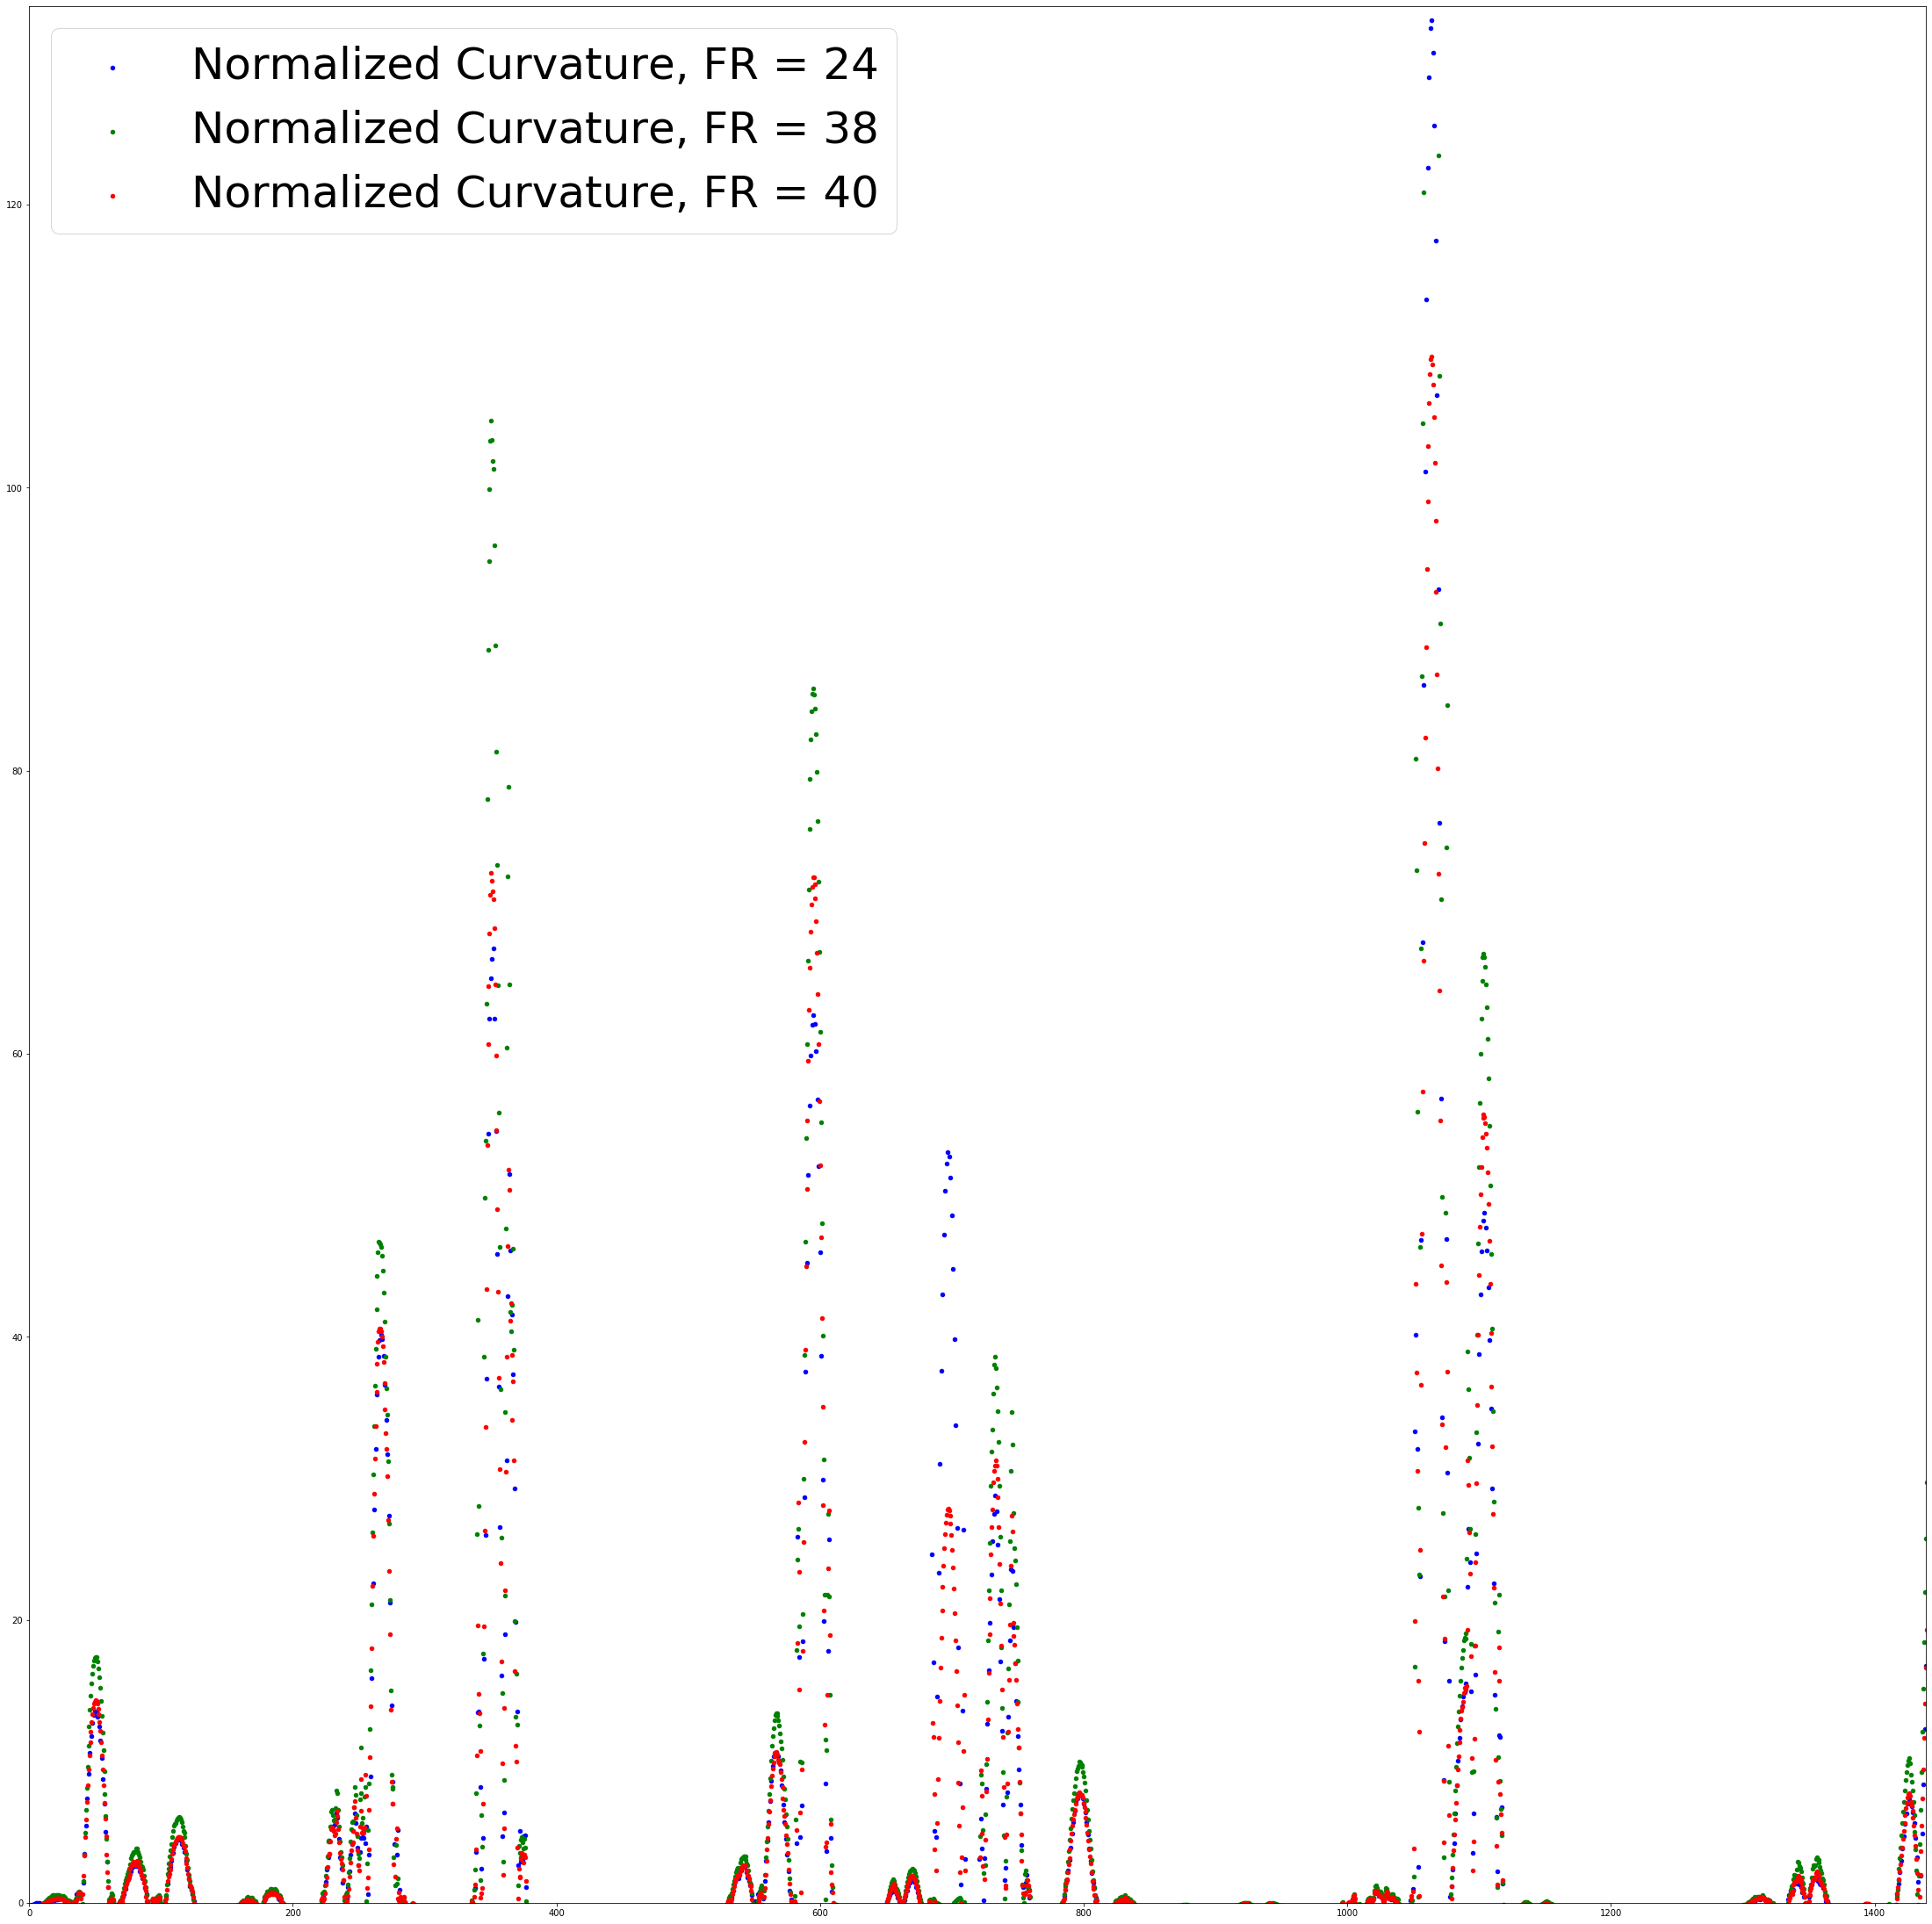

In [66]:
PlotCurveMultiple(34, [24, 38, 40], 3, 1, mode = 'normalized curvature', zoom_range= range(1440))
#consistently higher values for 38 bc sd is smaller

LOG: Extracting coordinates for Animal CRV_34_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_34_TEST_00...
LOG: Extracting coordinates for Animal CRV_34_TEST_01...
LOG: Extracting coordinates for Animal CRV_34_TEST_02...
LOG: Extracting coordinates for Animal CRV_34_TEST_03...
LOG: Extracting coordinates for Animal CRV_34_TEST_04...
LOG: Extracting coordinates for Animal CRV_34_TEST_05...
LOG: Extracting coordinates for Animal CRV_34_TEST_06...
LOG: Extracting coordinates for Animal CRV_34_TEST_07...
LOG: Extracting coordinates for Animal CRV_34_TEST_08...
LOG: Extracting coordinates for Animal CRV_34_TEST_09...
LOG: Extracting coordinates for Animal CRV_34_TEST_10...
LOG: Extracting coordinates for Animal CRV_34_TEST_11...
LOG: Extracting coordinates for Animal CRV_34_TEST_12...
LOG: Extracting coordinates for Animal CRV_34_TEST_13...
LOG: Extracting coordinates for Animal CRV_34_TEST_14...
LOG: Extracting coordinates for Animal CRV_34_TEST_15...
LOG: Extracting coordinates f

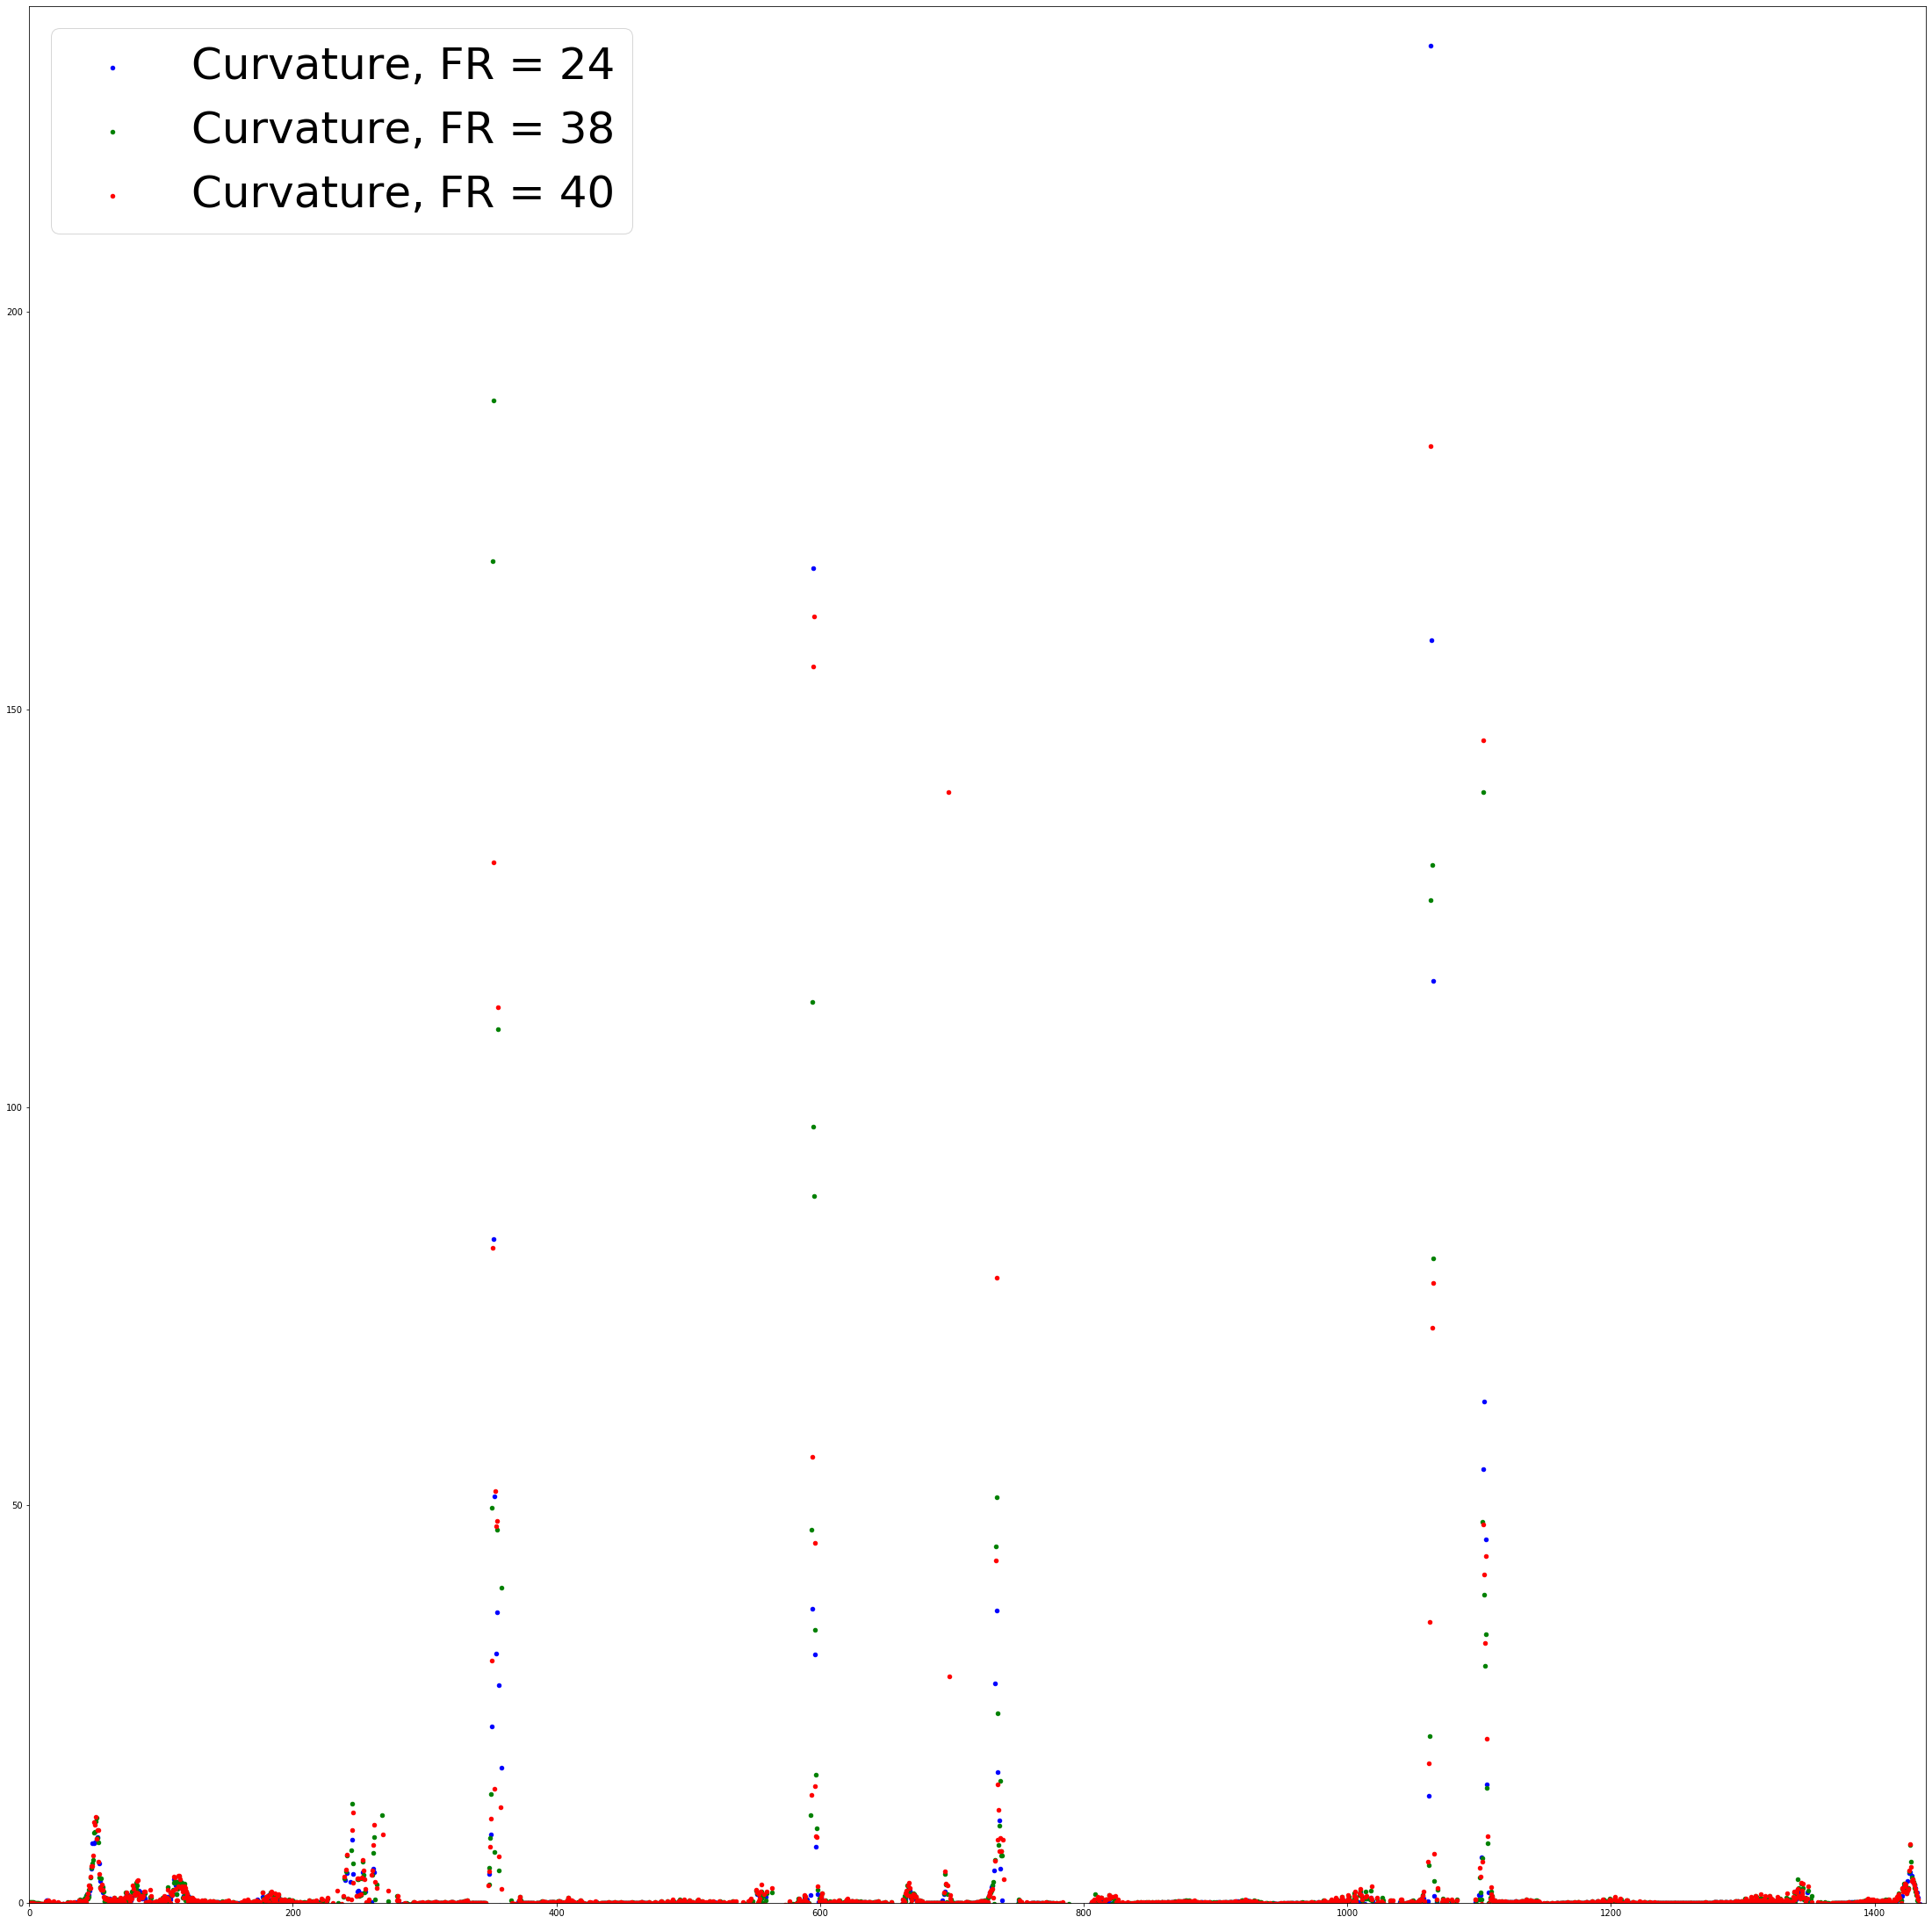

In [60]:
PlotCurveMultiple(34, [24, 38, 40], 3, 1, mode = 'curvature', zoom_range= range(1440))

LOG: Extracting coordinates for Animal CRV_34_TEST_CTRL...
LOG: Extracting coordinates for Animal CRV_34_TEST_00...
LOG: Extracting coordinates for Animal CRV_34_TEST_01...
LOG: Extracting coordinates for Animal CRV_34_TEST_02...
LOG: Extracting coordinates for Animal CRV_34_TEST_03...
LOG: Extracting coordinates for Animal CRV_34_TEST_04...
LOG: Extracting coordinates for Animal CRV_34_TEST_05...
LOG: Extracting coordinates for Animal CRV_34_TEST_06...
LOG: Extracting coordinates for Animal CRV_34_TEST_07...
LOG: Extracting coordinates for Animal CRV_34_TEST_08...
LOG: Extracting coordinates for Animal CRV_34_TEST_09...
LOG: Extracting coordinates for Animal CRV_34_TEST_10...
LOG: Extracting coordinates for Animal CRV_34_TEST_11...
LOG: Extracting coordinates for Animal CRV_34_TEST_12...
LOG: Extracting coordinates for Animal CRV_34_TEST_13...
LOG: Extracting coordinates for Animal CRV_34_TEST_14...
LOG: Extracting coordinates for Animal CRV_34_TEST_15...
LOG: Extracting coordinates f

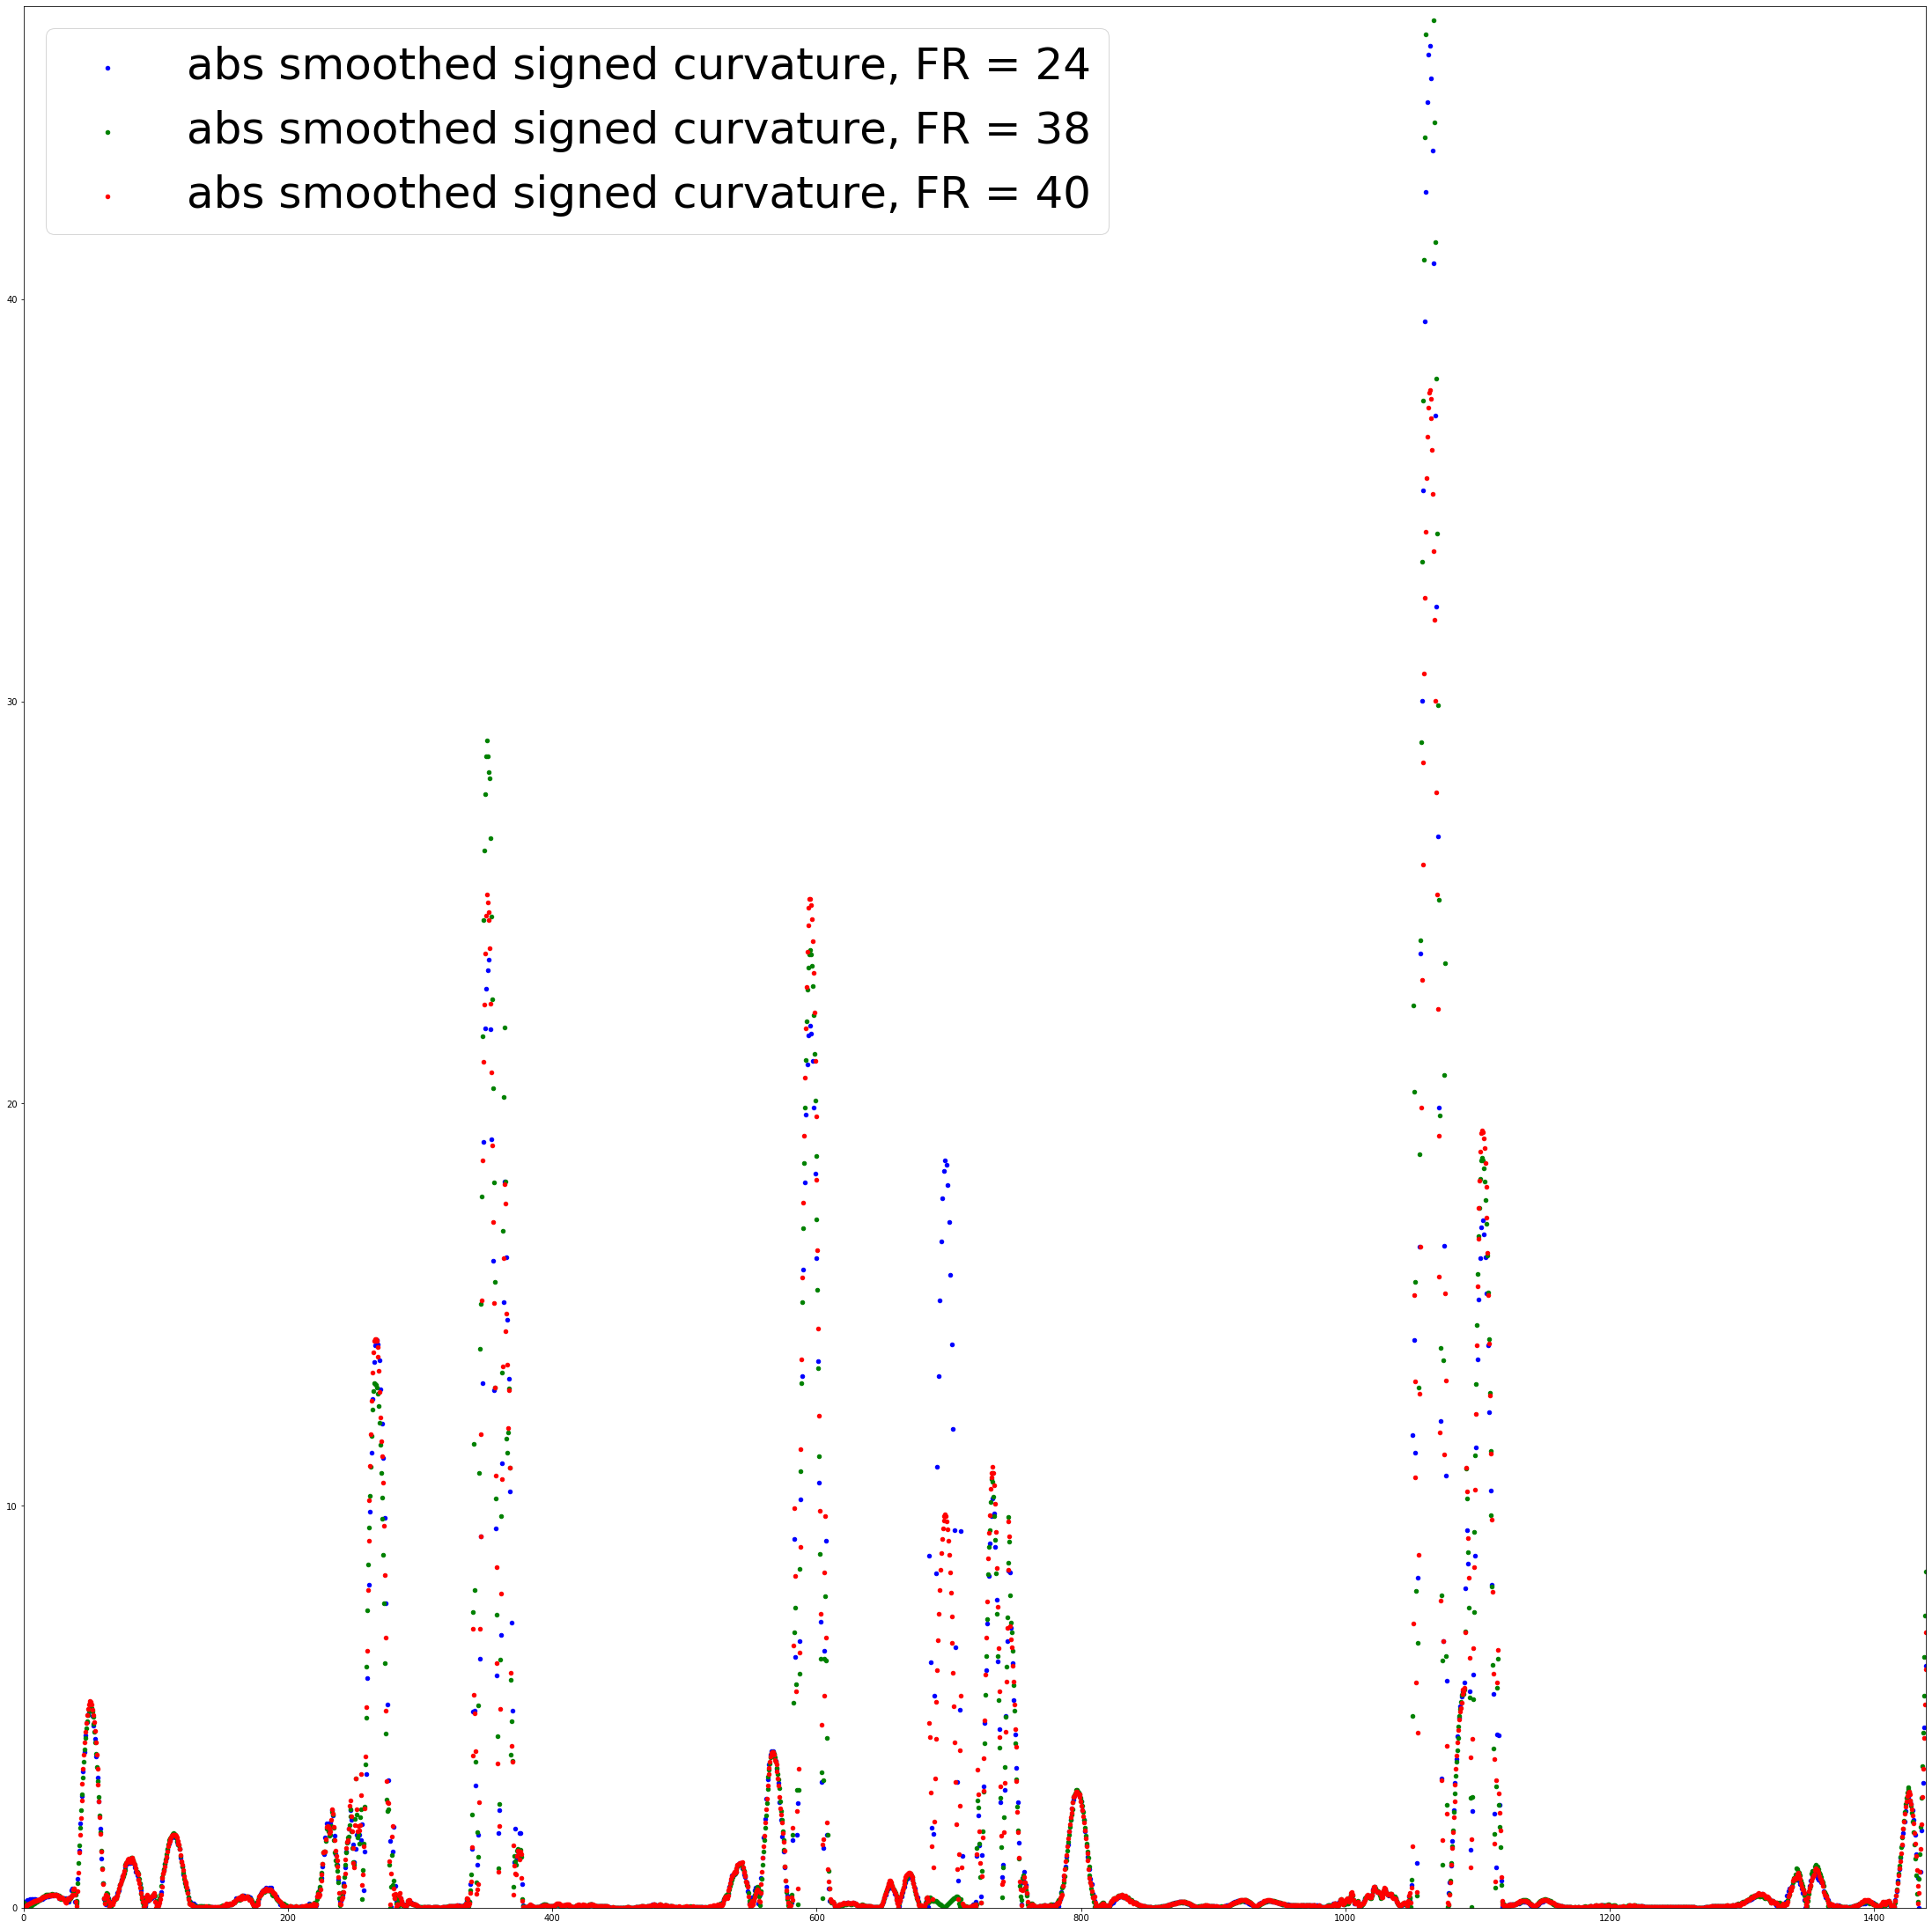

In [67]:
PlotCurveMultiple(34, [24, 38, 40], 3, 1, mode = 'abs smoothed curvature', zoom_range= range(1440))

In [ ]:
#curve 34 is a curve that turns a lot comparing to other curves so this difference 
#is due to randomness which affects more curves that turn more

#it's because of these high spikes (in this case they are not outliers because there are so many of them)